<center> <img src="https://miro.medium.com/v2/resize:fit:1200/1*lbDXL0IuitCRz4mpZ7MmfQ.png" width=55% > </center>

<br><br>

<center>
    <font size="6">Final Lab (Part 2): Image Classification using Convolutional Neural Networks </font>
</center>
<center>
    <font size="4">Computer Vision 1 University of Amsterdam</font>
</center>
<center>
    <font size="4">Due 23:59PM, October 18, 2024 (Amsterdam time)</font>
</center>
<center>
    <font size="4"><b>TA's:  Yue, Konrad & Thies</b></font>
</center>

<br><br>

***

<br><br>

<center>

Student1 ID:  \
Student1 Name:

Student2 ID: \
Student2 Name:

Student3 ID: \
Student3 Name:

Student4 ID: 15050025\
Student4 Name: Christina Isaicu

</center>

### **Coding Guidelines**

Your code must be handed in this Jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Final Lab: Image Classification Assignment. Please also fill out your names and IDs above.

For full credit, make sure your notebook follows these guidelines:

- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Understand the problem as much as you can. When answering a question, provide evidence (qualitative and/or quantitative results, references to papers, figures, etc.) to support your arguments. Not everything might be explicitly asked for, so think about what might strengthen your arguments to make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Add a number, a title, and, if applicable, the name and unit of variables in a table, and name and unit of axes and legends in a figure.

**Late submissions are not allowed.** Assignments submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance to avoid last-minute system failure issues.

**Environment:** Since this is a project-based assignment, you are free to use any feature descriptor and machine learning tools (e.g., K-means, SVM). You should use Python for your implementation. You are free to use any Python library for this assignment, but make sure to provide a conda environment file!

**Plagiarism Note:** Keep in mind that plagiarism (submitted materials which are not your work) is a serious offense and any misconduct will be addressed according to university regulations. This includes using generative tools such as ChatGPT.

**Ensure that you save all results/answers to the questions (even if you reuse some code).**

### **Report Preparation**

Your tasks include the following:

1. **Report Preparation:** For both parts of the final project, students are expected to prepare a report. The report should include all details on implementation approaches, analysis of results for different settings, and visualizations illustrating experiments and performance of your implementation. Grading will be based on the report, so it should be as self-contained as possible. If the report contains faulty results or ambiguities, TAs can refer to your code for clarification.

2. **Explanation of Results:** Do not just provide numbers without explanation. Discuss different settings to show your understanding of the material and processes involved.

3. **Quantitative Evaluation:** For quantitative evaluation, you are expected to provide the results based on performance (accuracy, learning loss and learning curves).

4. **Aim:** Understand the basic Image Classification pipeline using Convolutional Neural Nets (CNN's).

5. **Working on Assignments:** Students should work in assigned groups for **two** weeks. Any questions can be discussed on ED.

    - **Submission:** Submit your source code and report together in a zip file (`ID1_ID2_ID3_part2.zip`). The report should be a maximum of 10 pages (single-column, including tables and figures, excluding references and appendix). Express thoughts concisely. Tables and figures must be accompanied by a description. Number them and, if applicable, name variables in tables, and label axes in figures.

6. **Hyperparameter Search:** In your experiments, remember to perform a hyperparameter search to find the optimal settings for your model(s). Clearly document the search process, the parameters you explored, and how they influenced the performance of your model.

8. **Format and Testing:** The report should be in **PDF format**, and the code in **.ipynb format**. Test that all functionality works as expected in the notebook.

### **Overview**

- [Section 1: Image Classification on CIFAR-100 (0 points)](#section-1)
- [Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)](#section-2)
- [Section 3: TwoLayerNet Architecture (2 points)](#section-3)
- [Section 4: ConvNet Architecture (2 points)](#section-4)
- [Section 5: Preparation of Training (7 points)](#section-5)
- [Section 6: Training the Networks (5 points)](#section-6)
- [Section 7: Setting Up the Hyperparameters (14 points)](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10 (14 points)](#section-9)
- [Section 10: Bonus Challenge (optional)](#section-10)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this lab is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). You will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

You will train and test your classification system using the entire CIFAR-100 dataset. Ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from PIL import Image
from torchinfo import summary
from torch.utils.data import DataLoader, Dataset, random_split
from tqdm import tqdm
from sklearn import metrics

import json
import os
import random

In [2]:
def set_seed(seed):
    '''
    Set the seed for reproducibility.

    Args:
        seed (int): Seed value.
    '''
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)

In [3]:
# Define the transformations

transform = transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True, num_workers=8)
test_data_loader = DataLoader(test_set, shuffle=False, num_workers=8)

print("Data loaders for CIFAR-100 are ready for use.")



Files already downloaded and verified
Files already downloaded and verified
Data loaders for CIFAR-100 are ready for use.


In [4]:
# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip',
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, you will implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses. Your implementation should provide a clear and organized overview of the dataset's diversity.

You add the figure(s) to appendix of your report and refer to it in the main text.

100%|██████████| 20/20 [00:06<00:00,  3.01it/s]


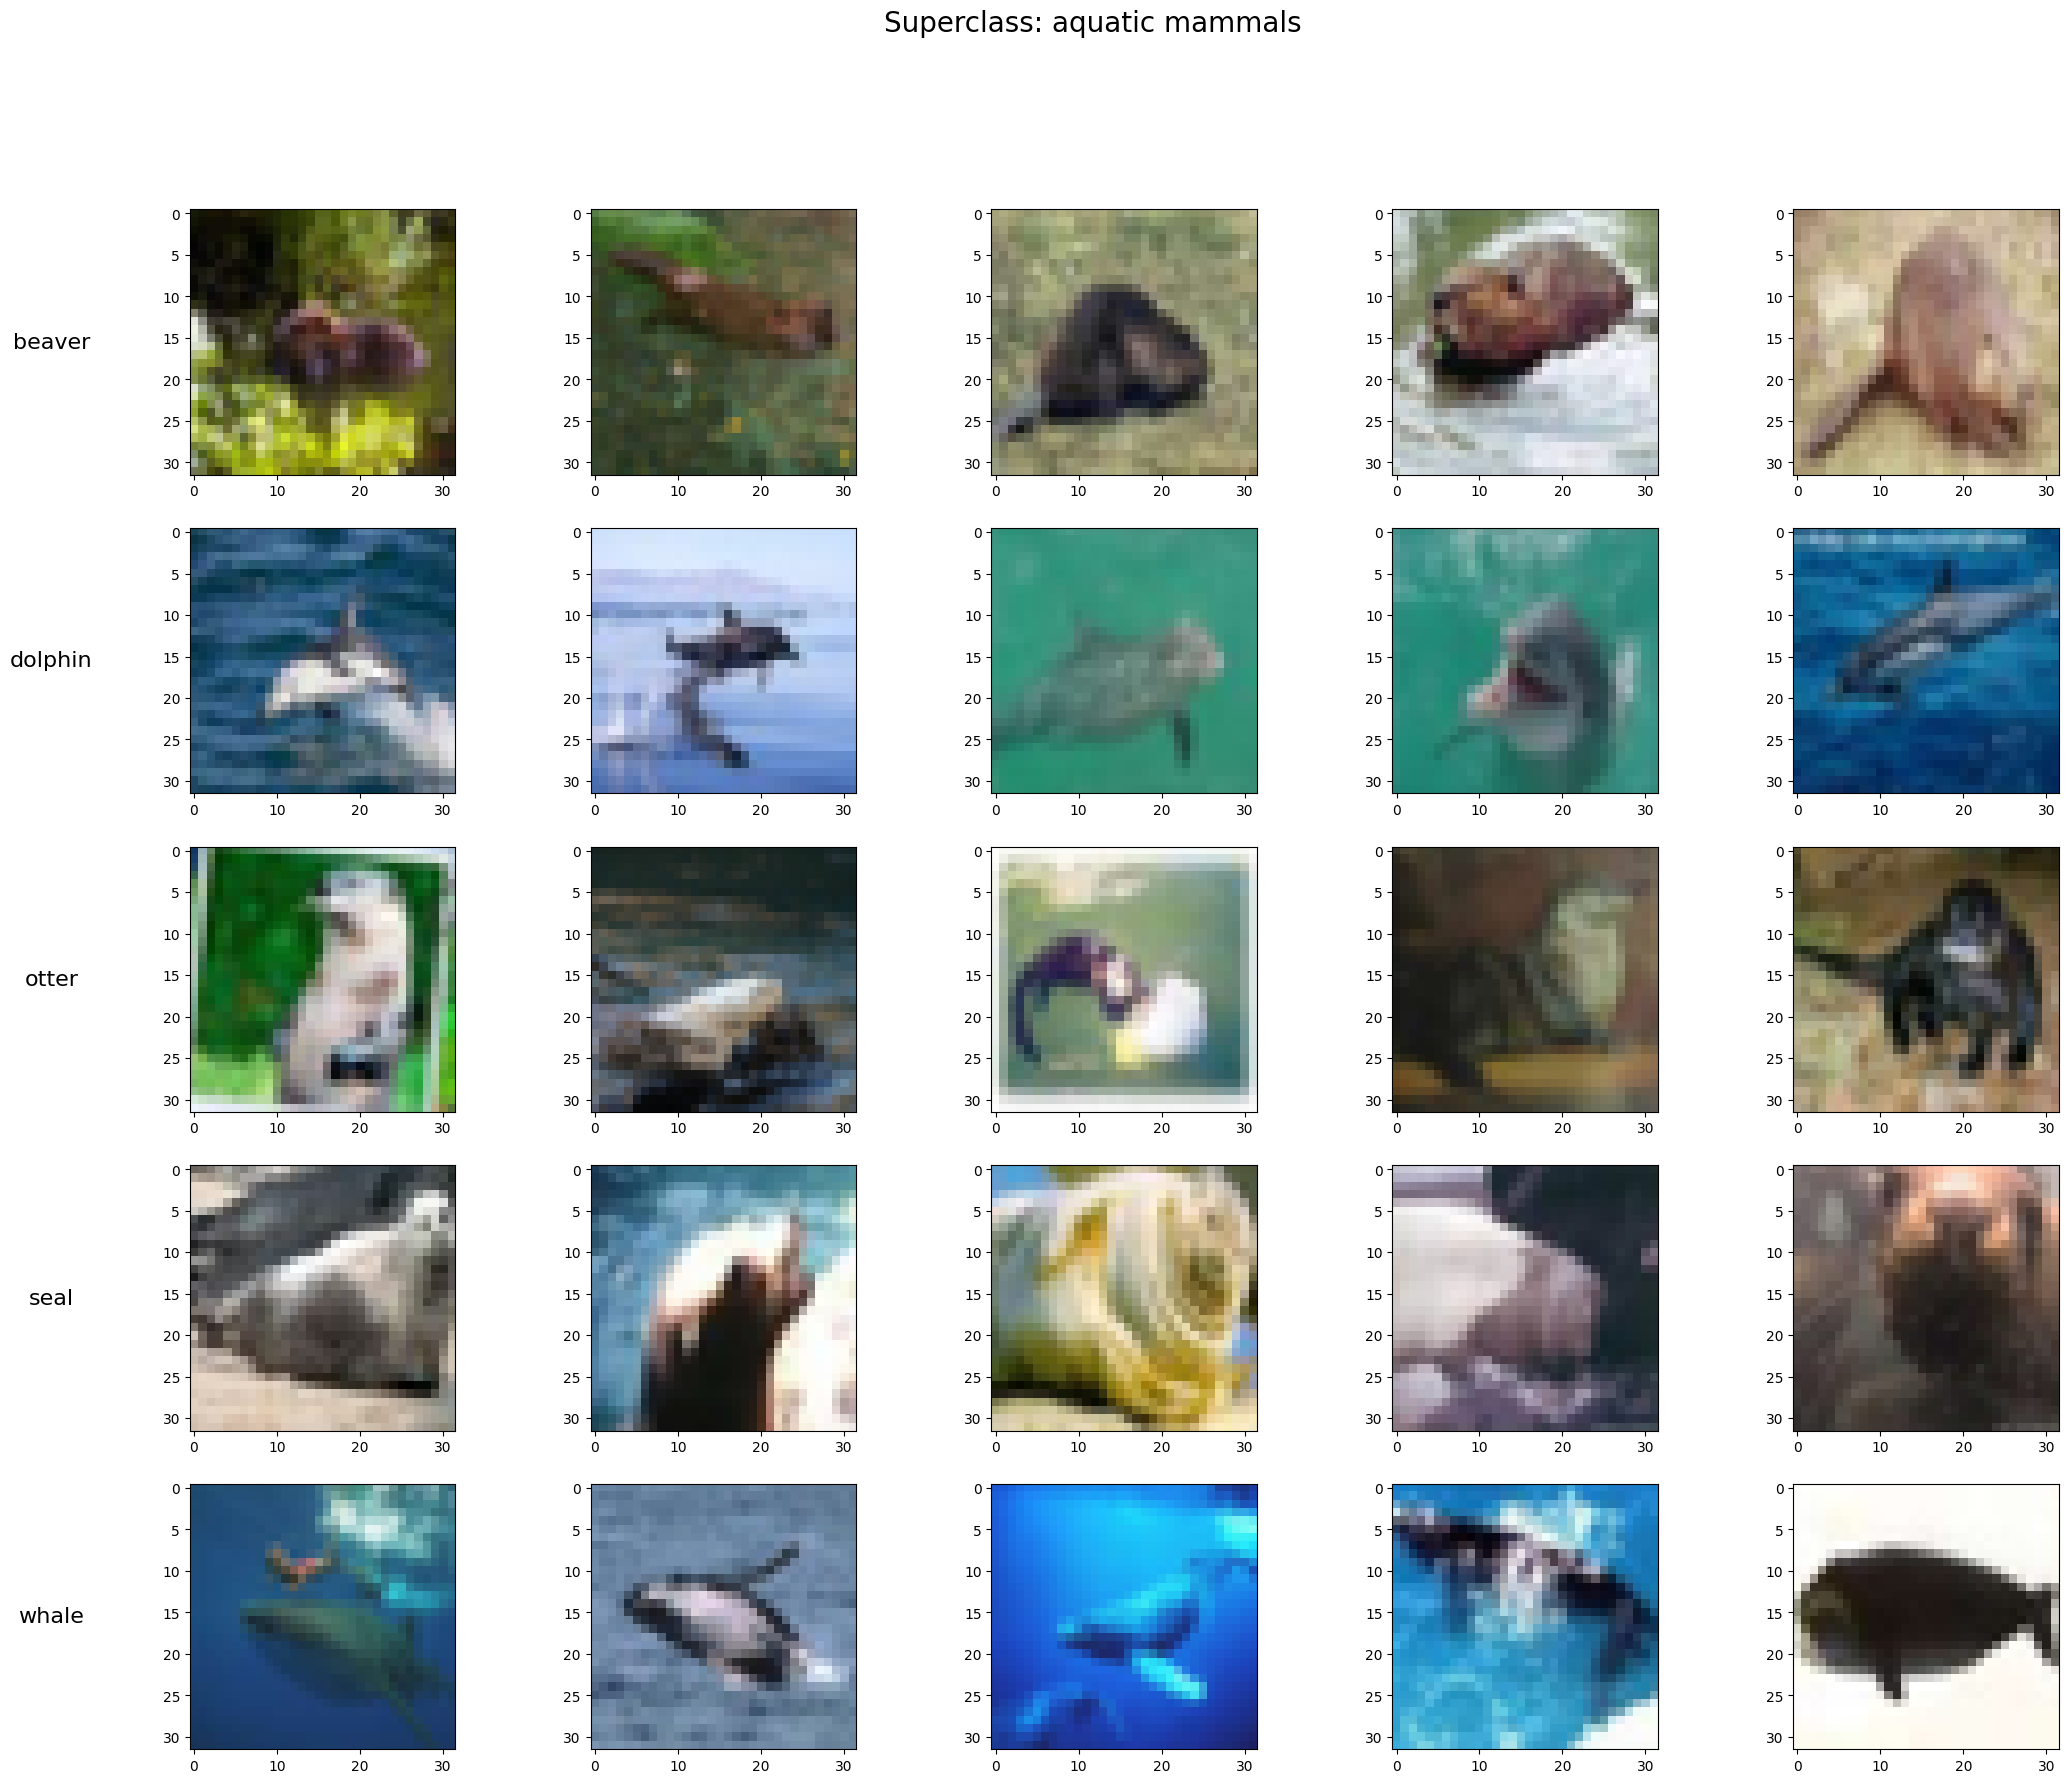

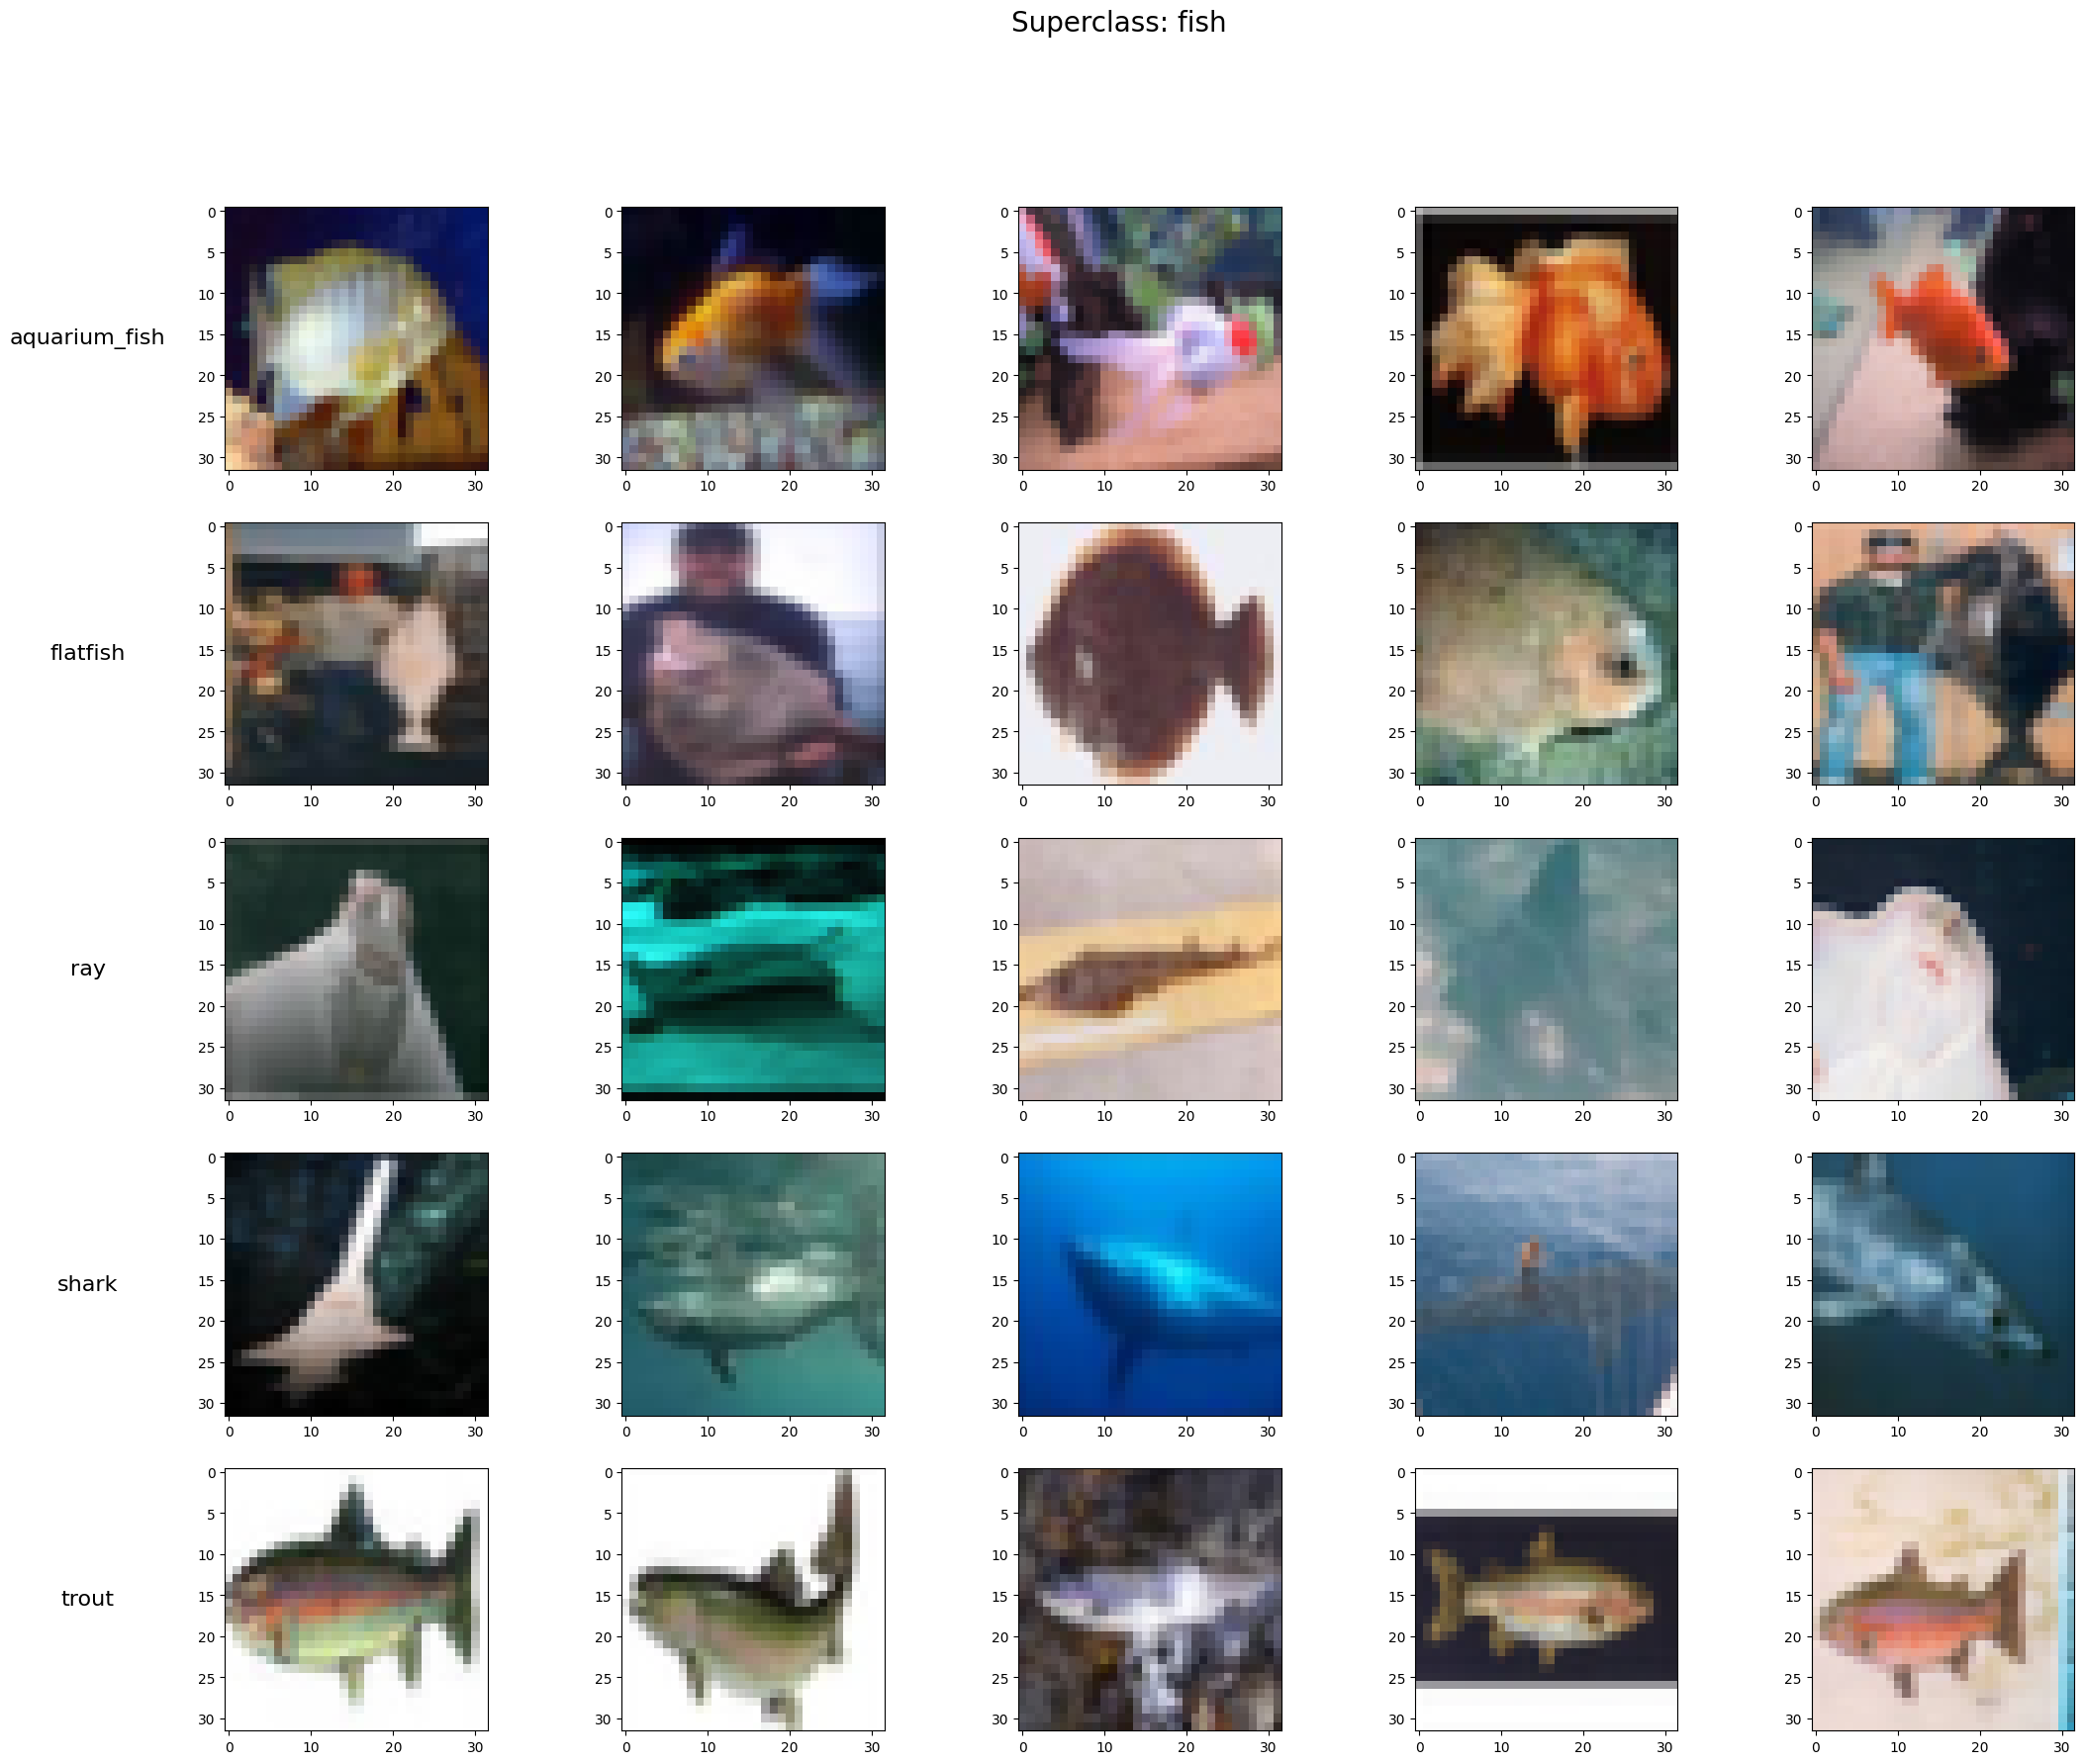

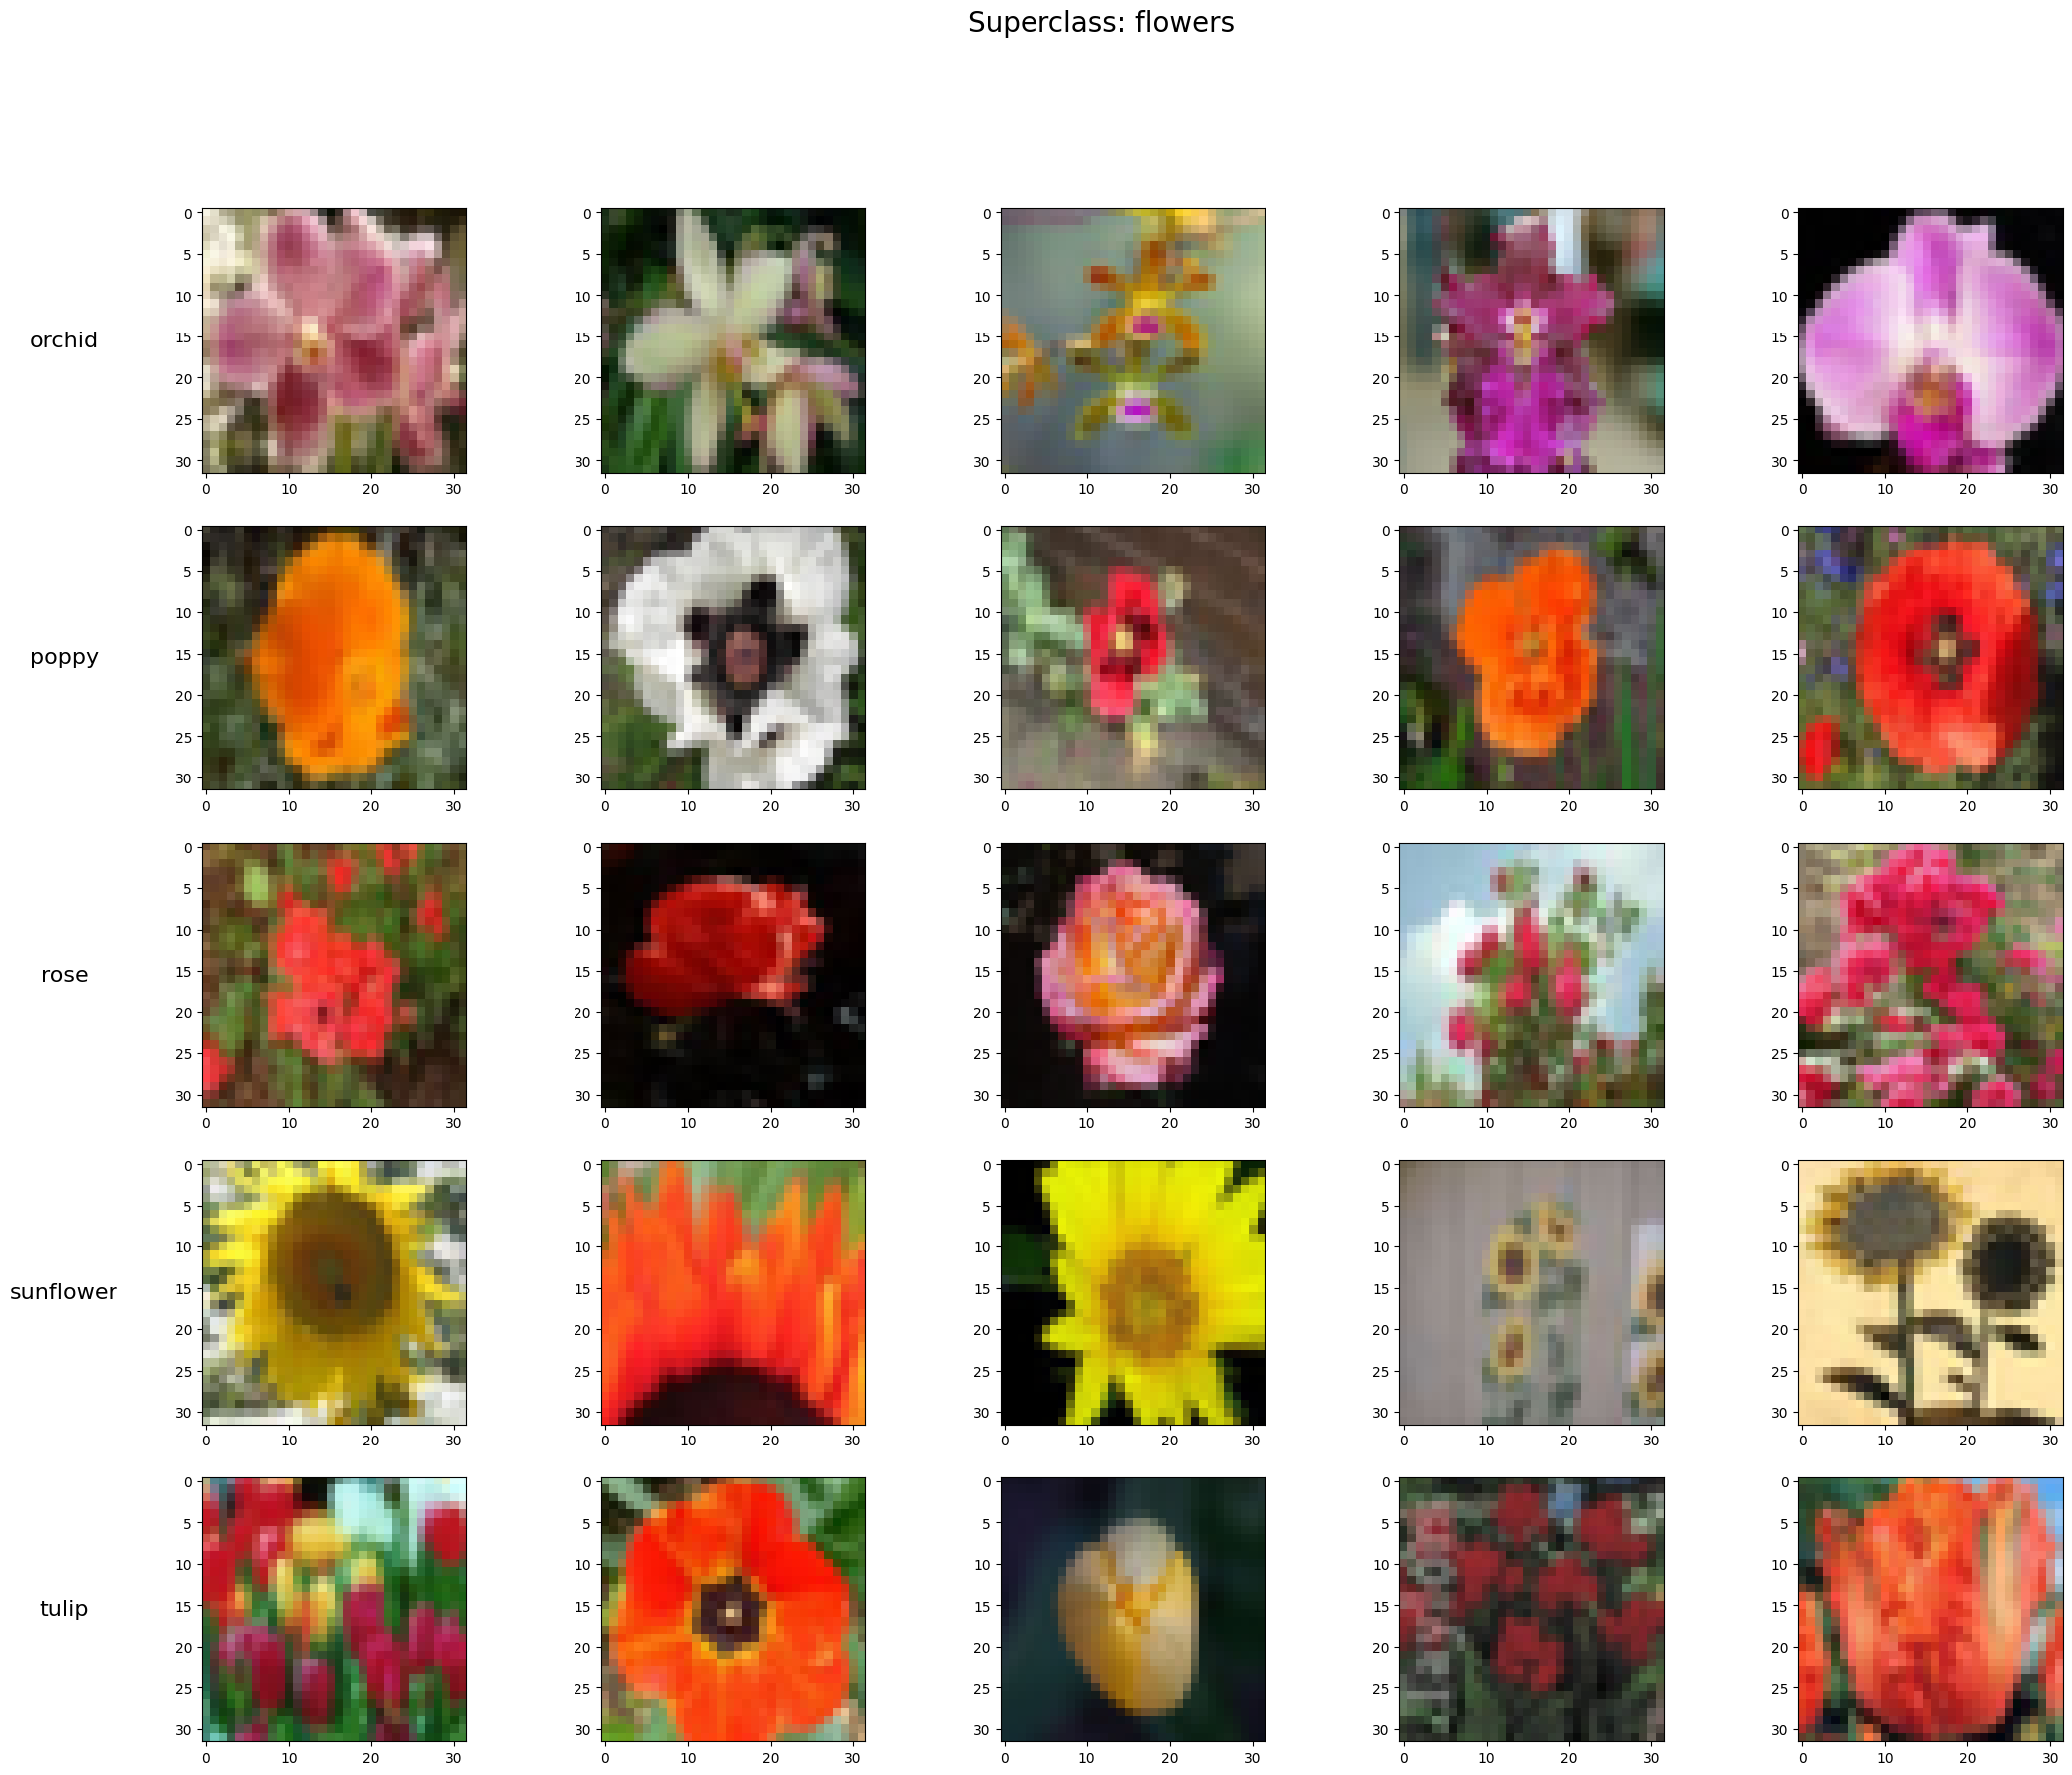

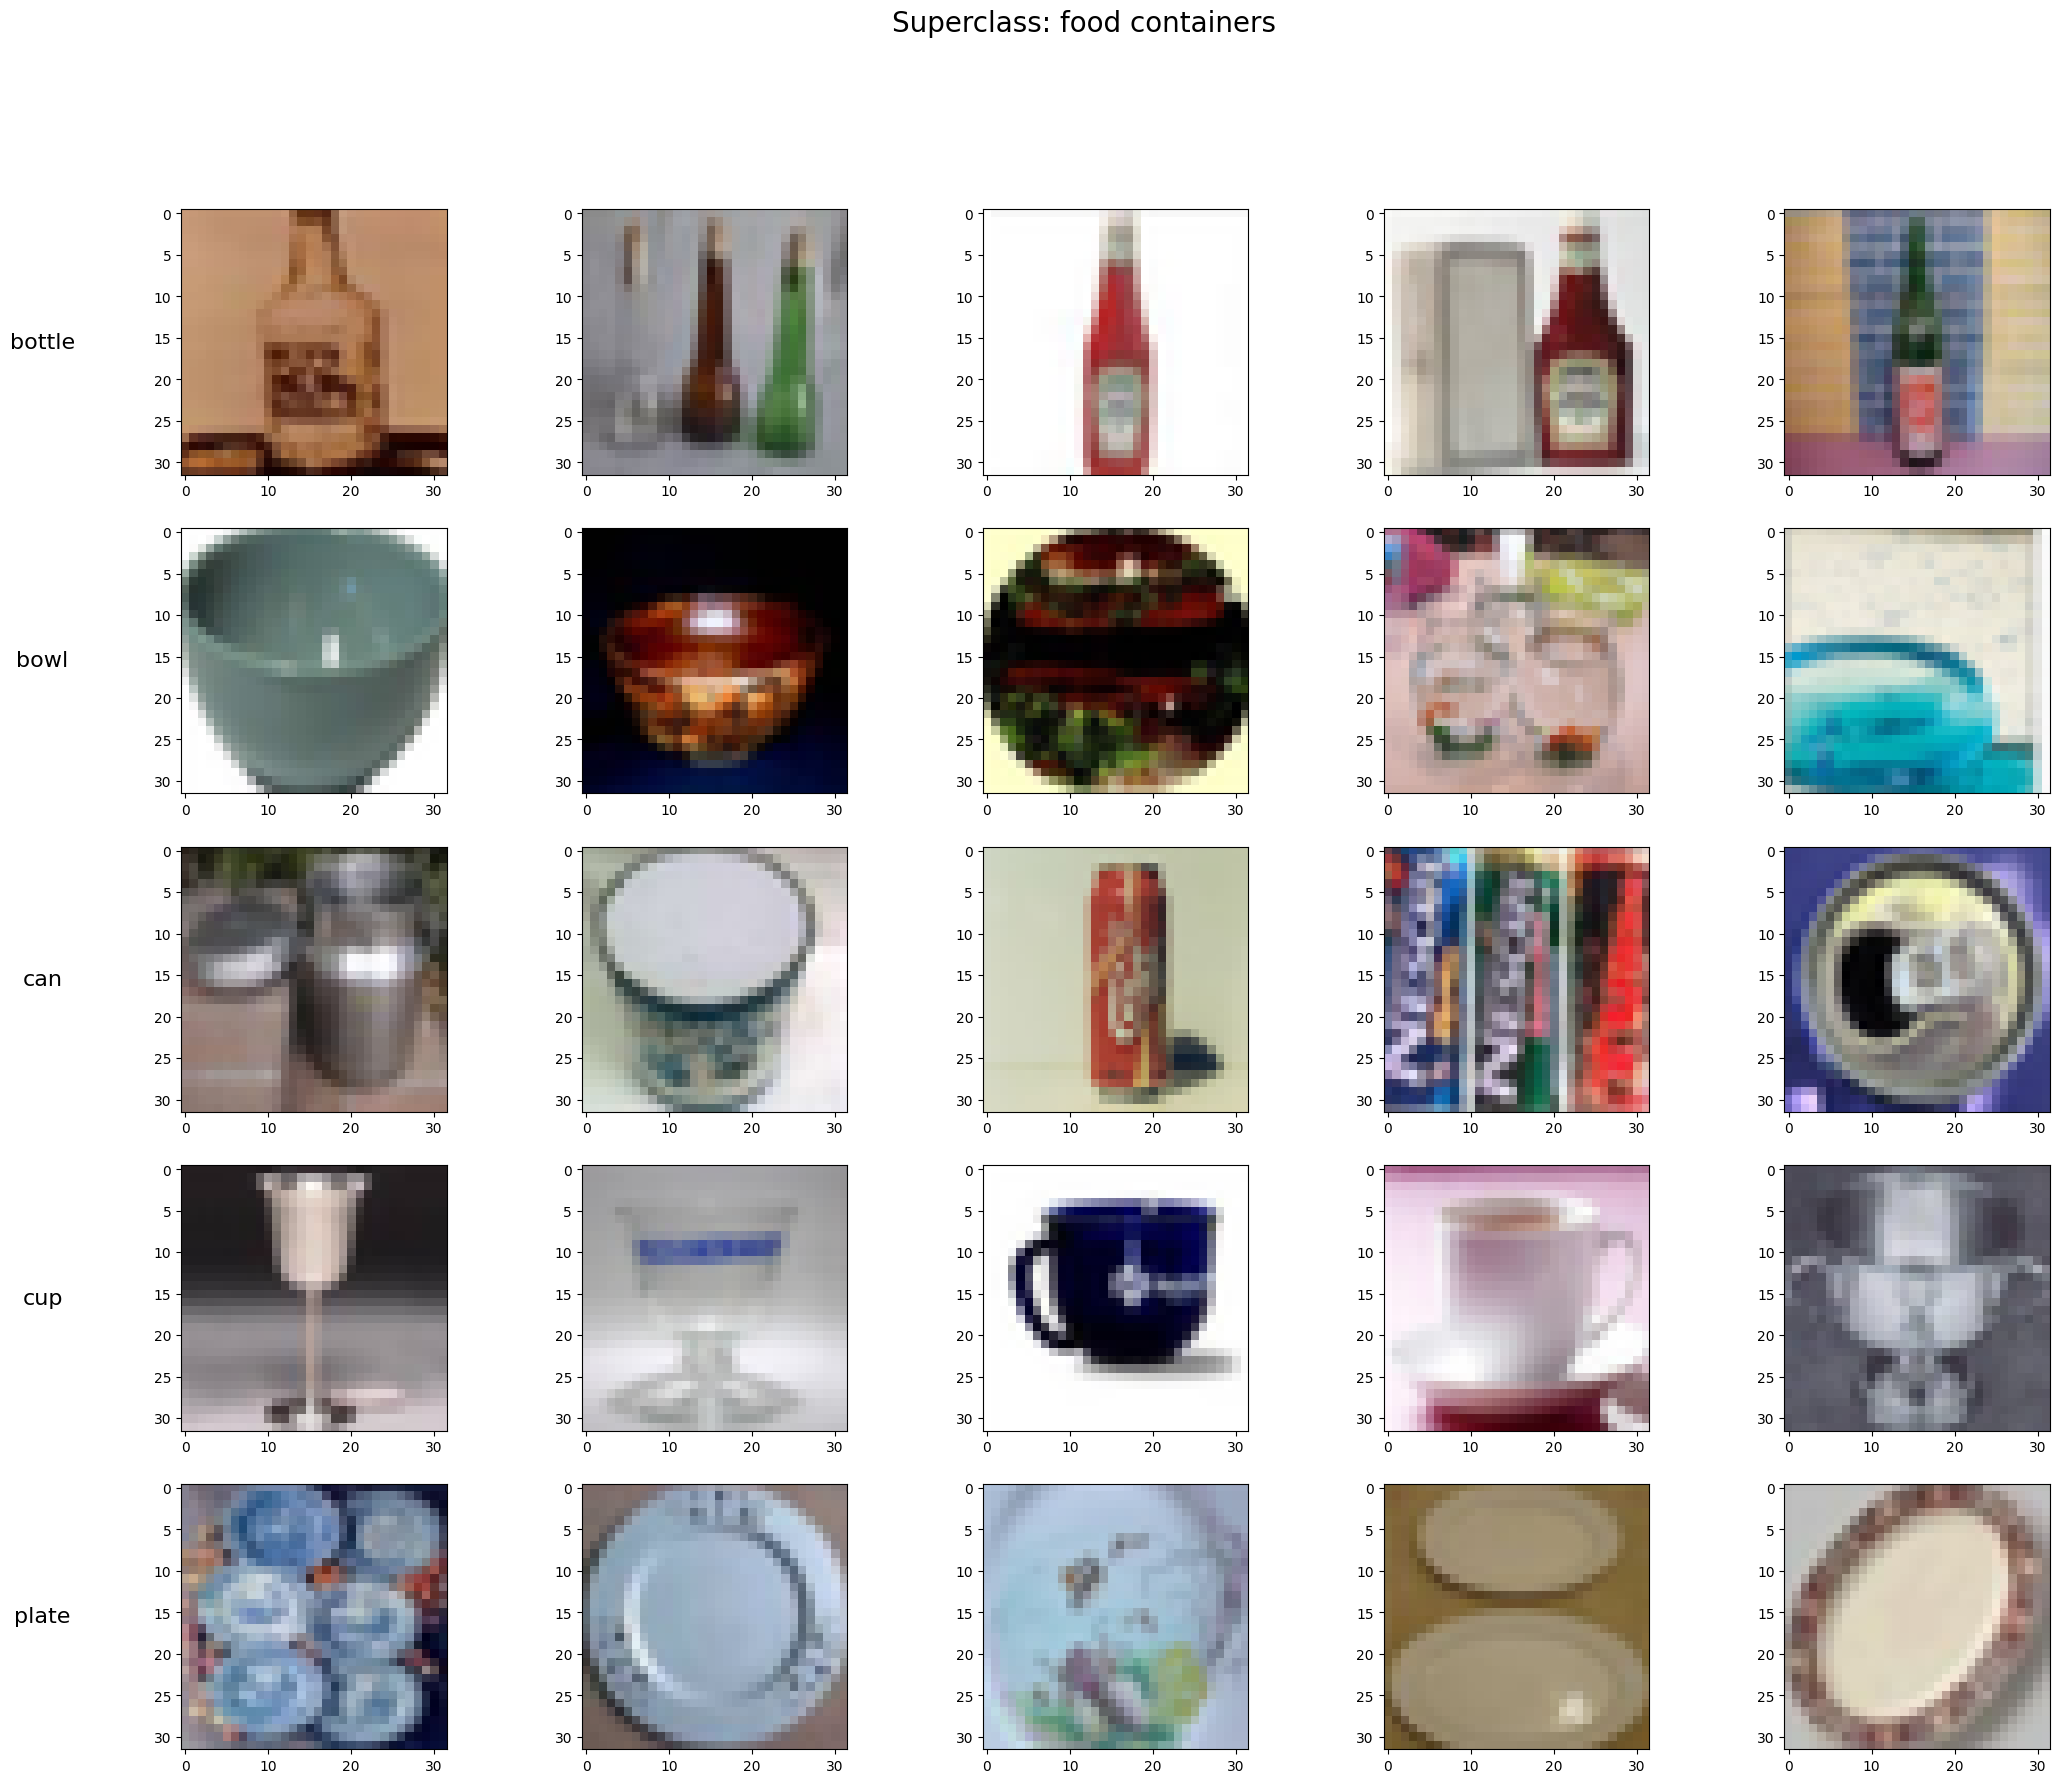

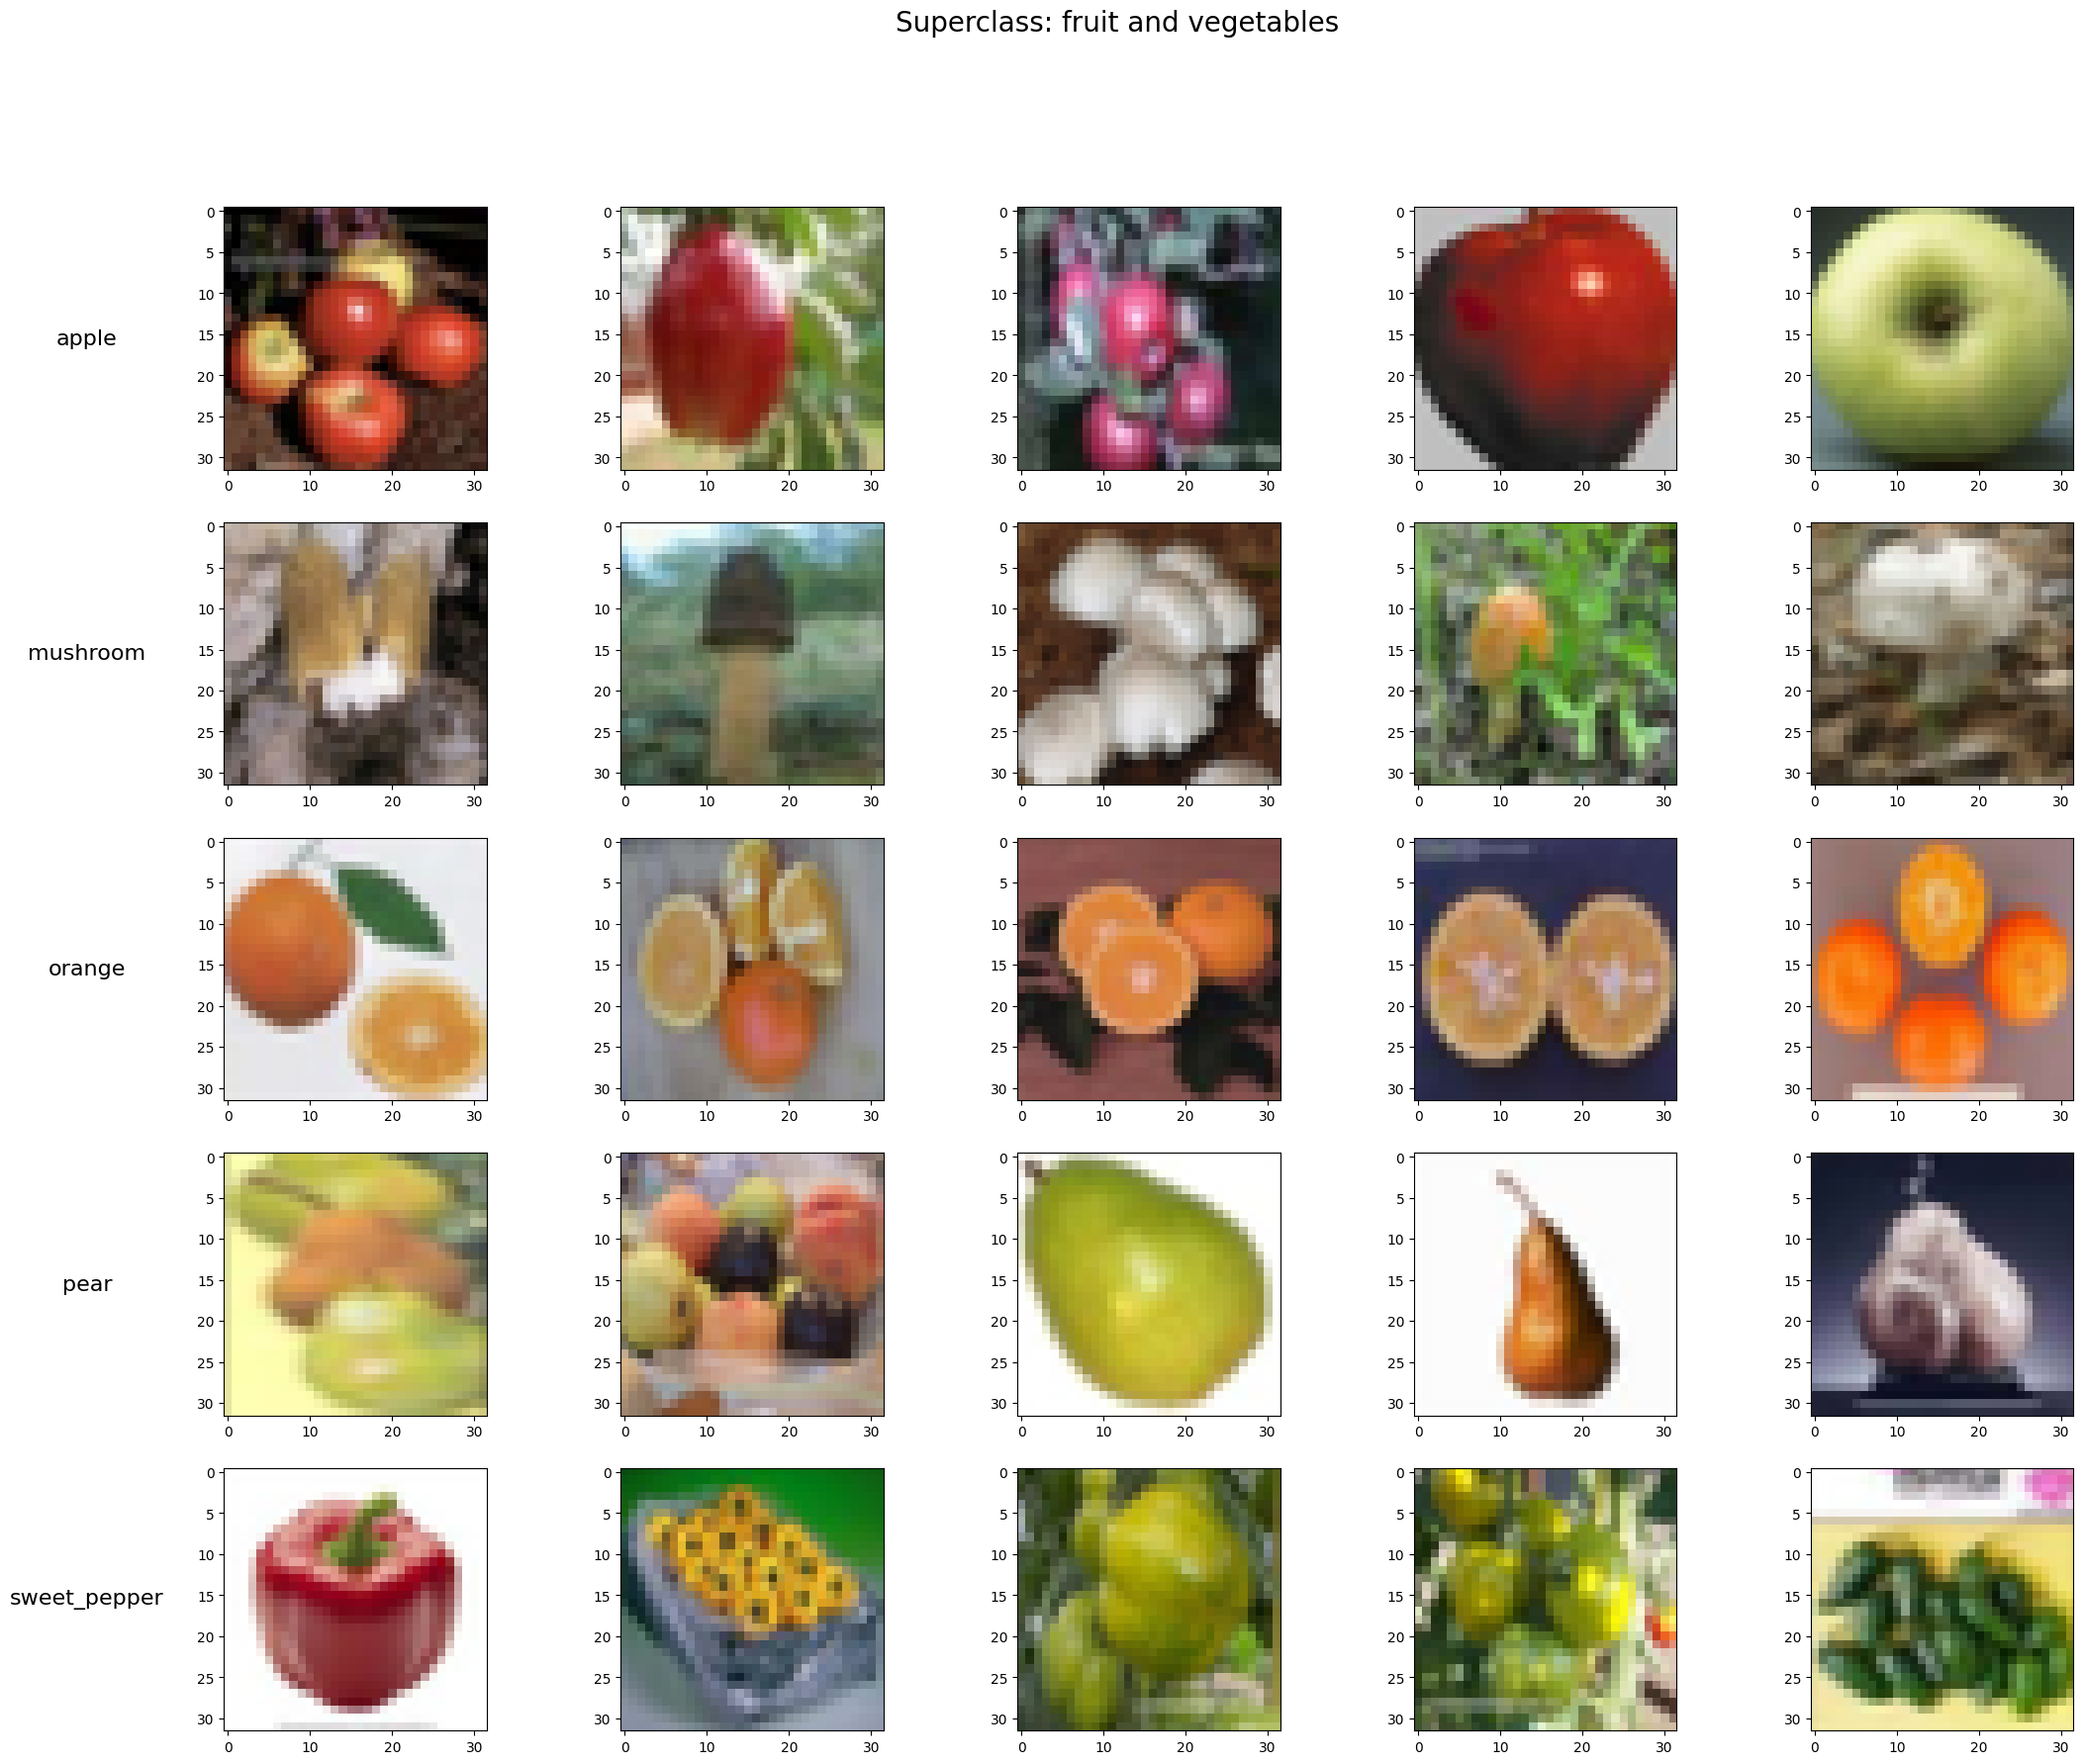

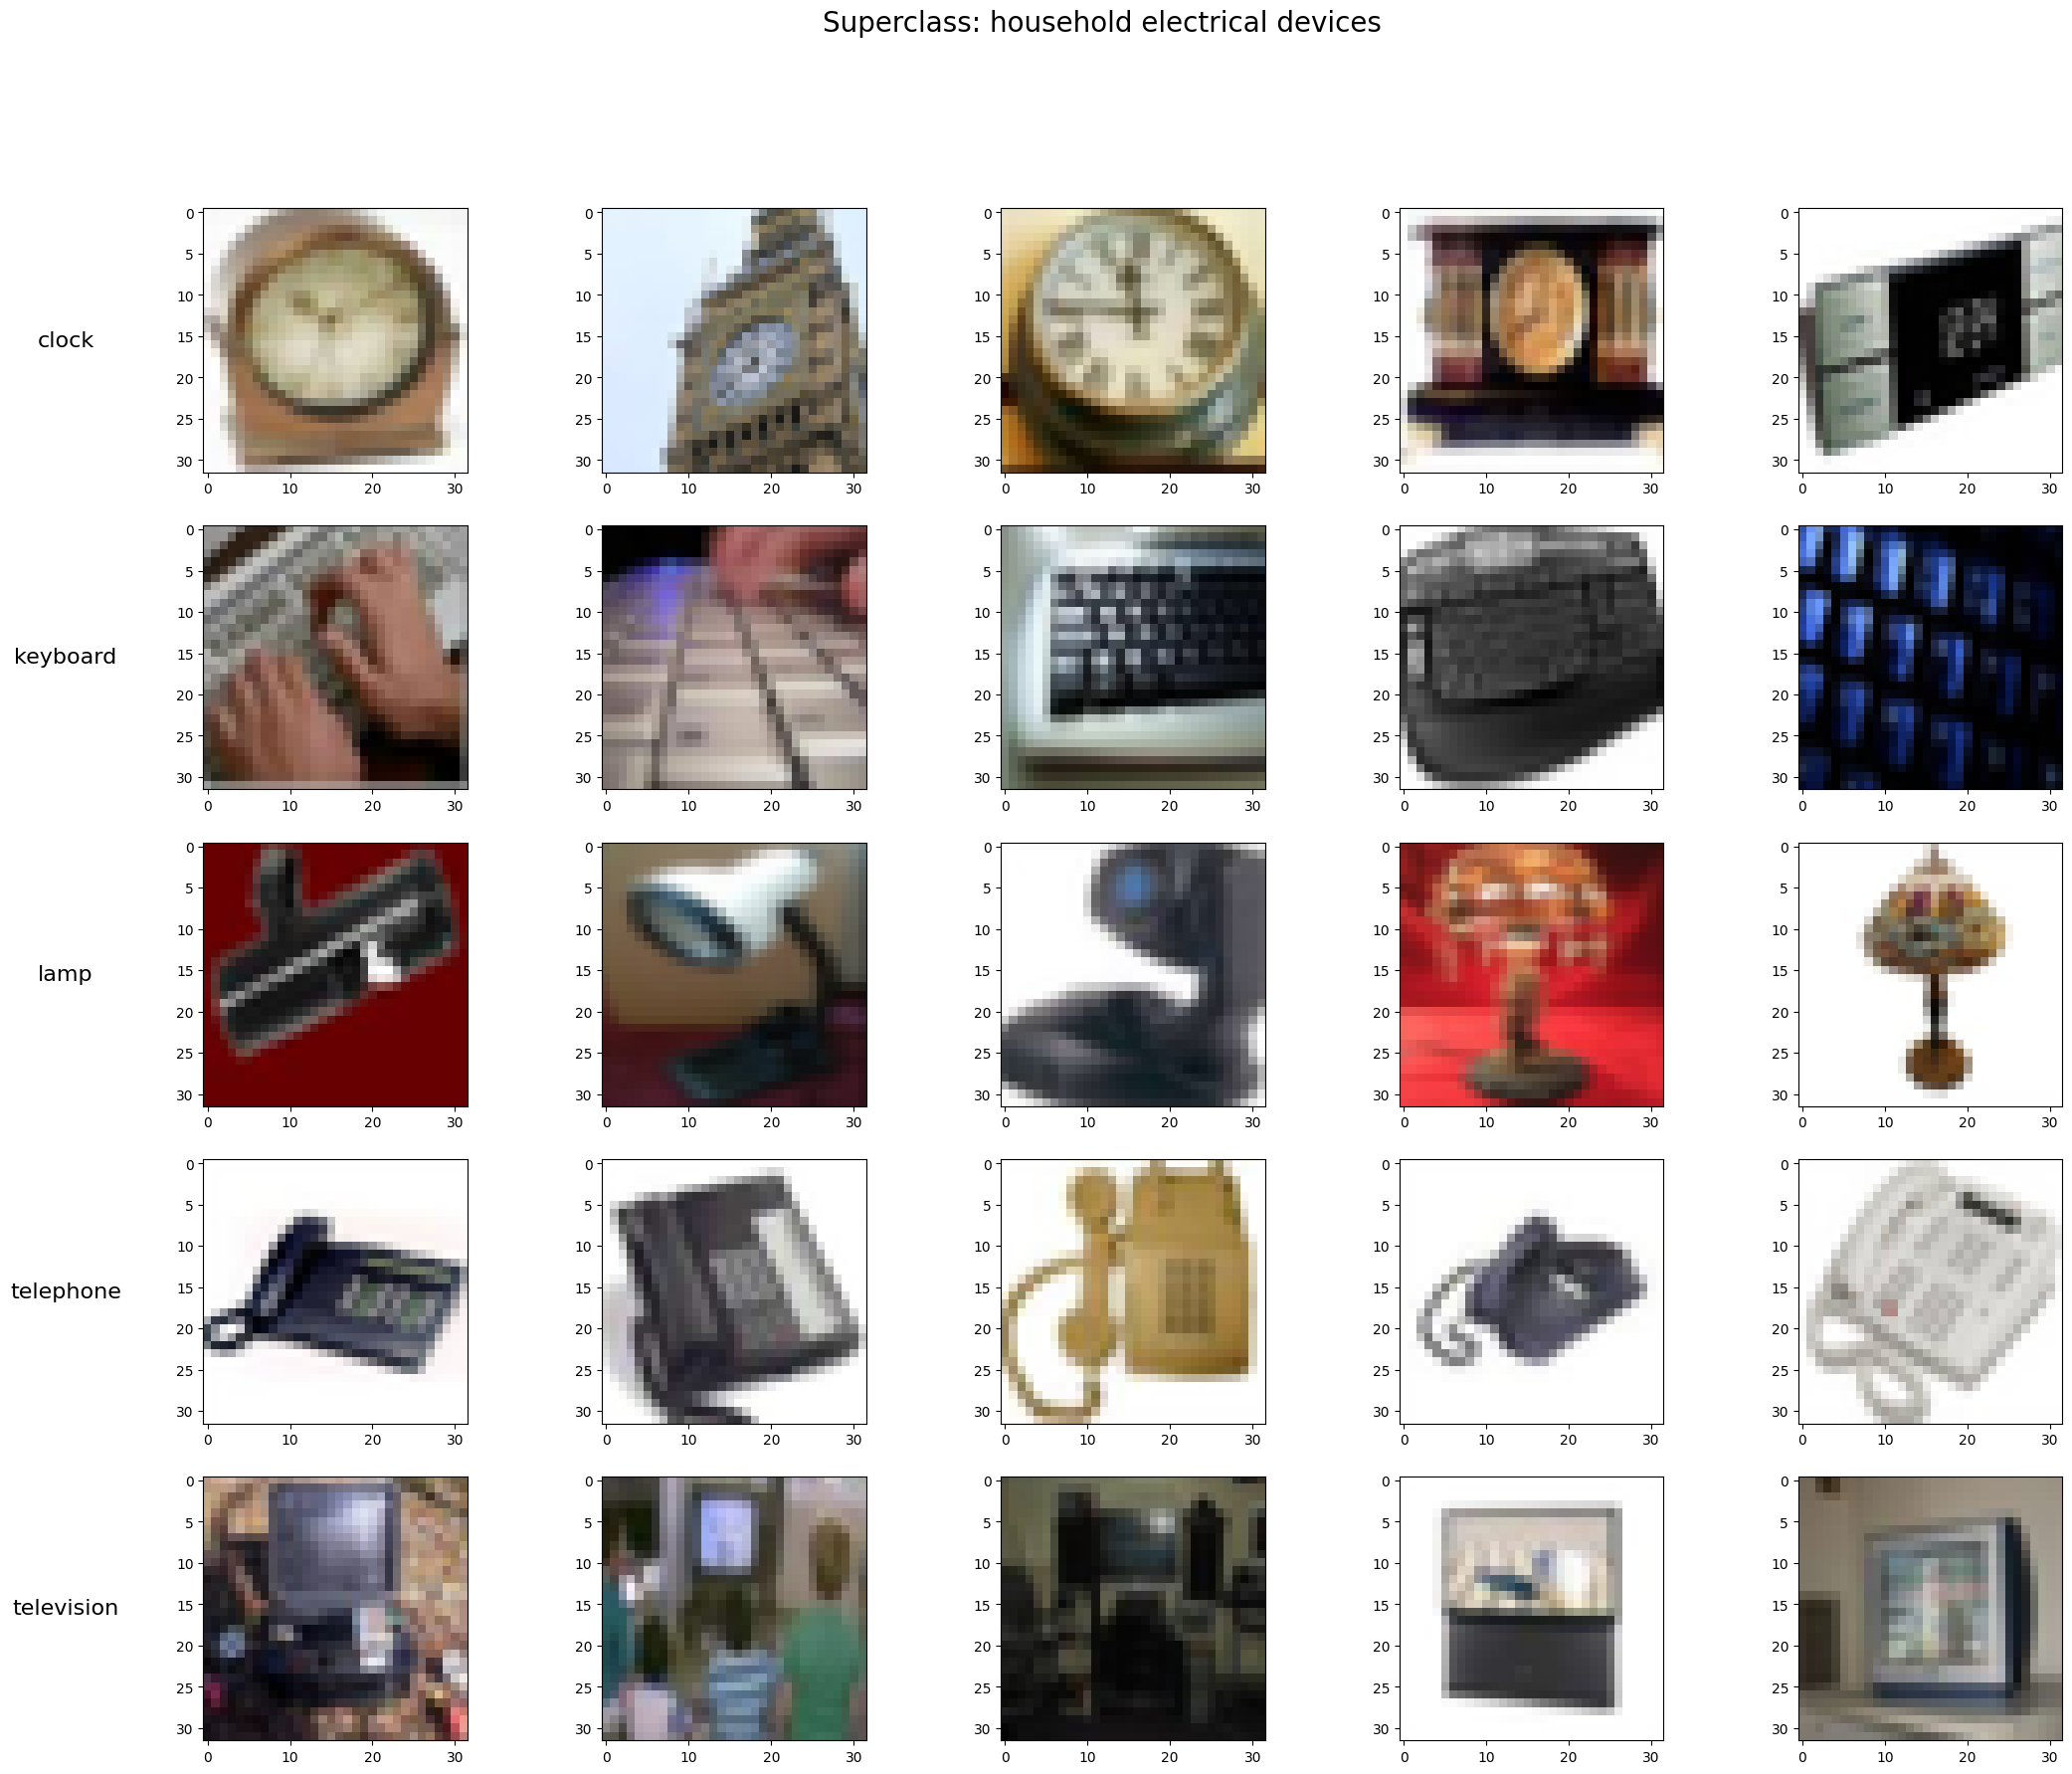

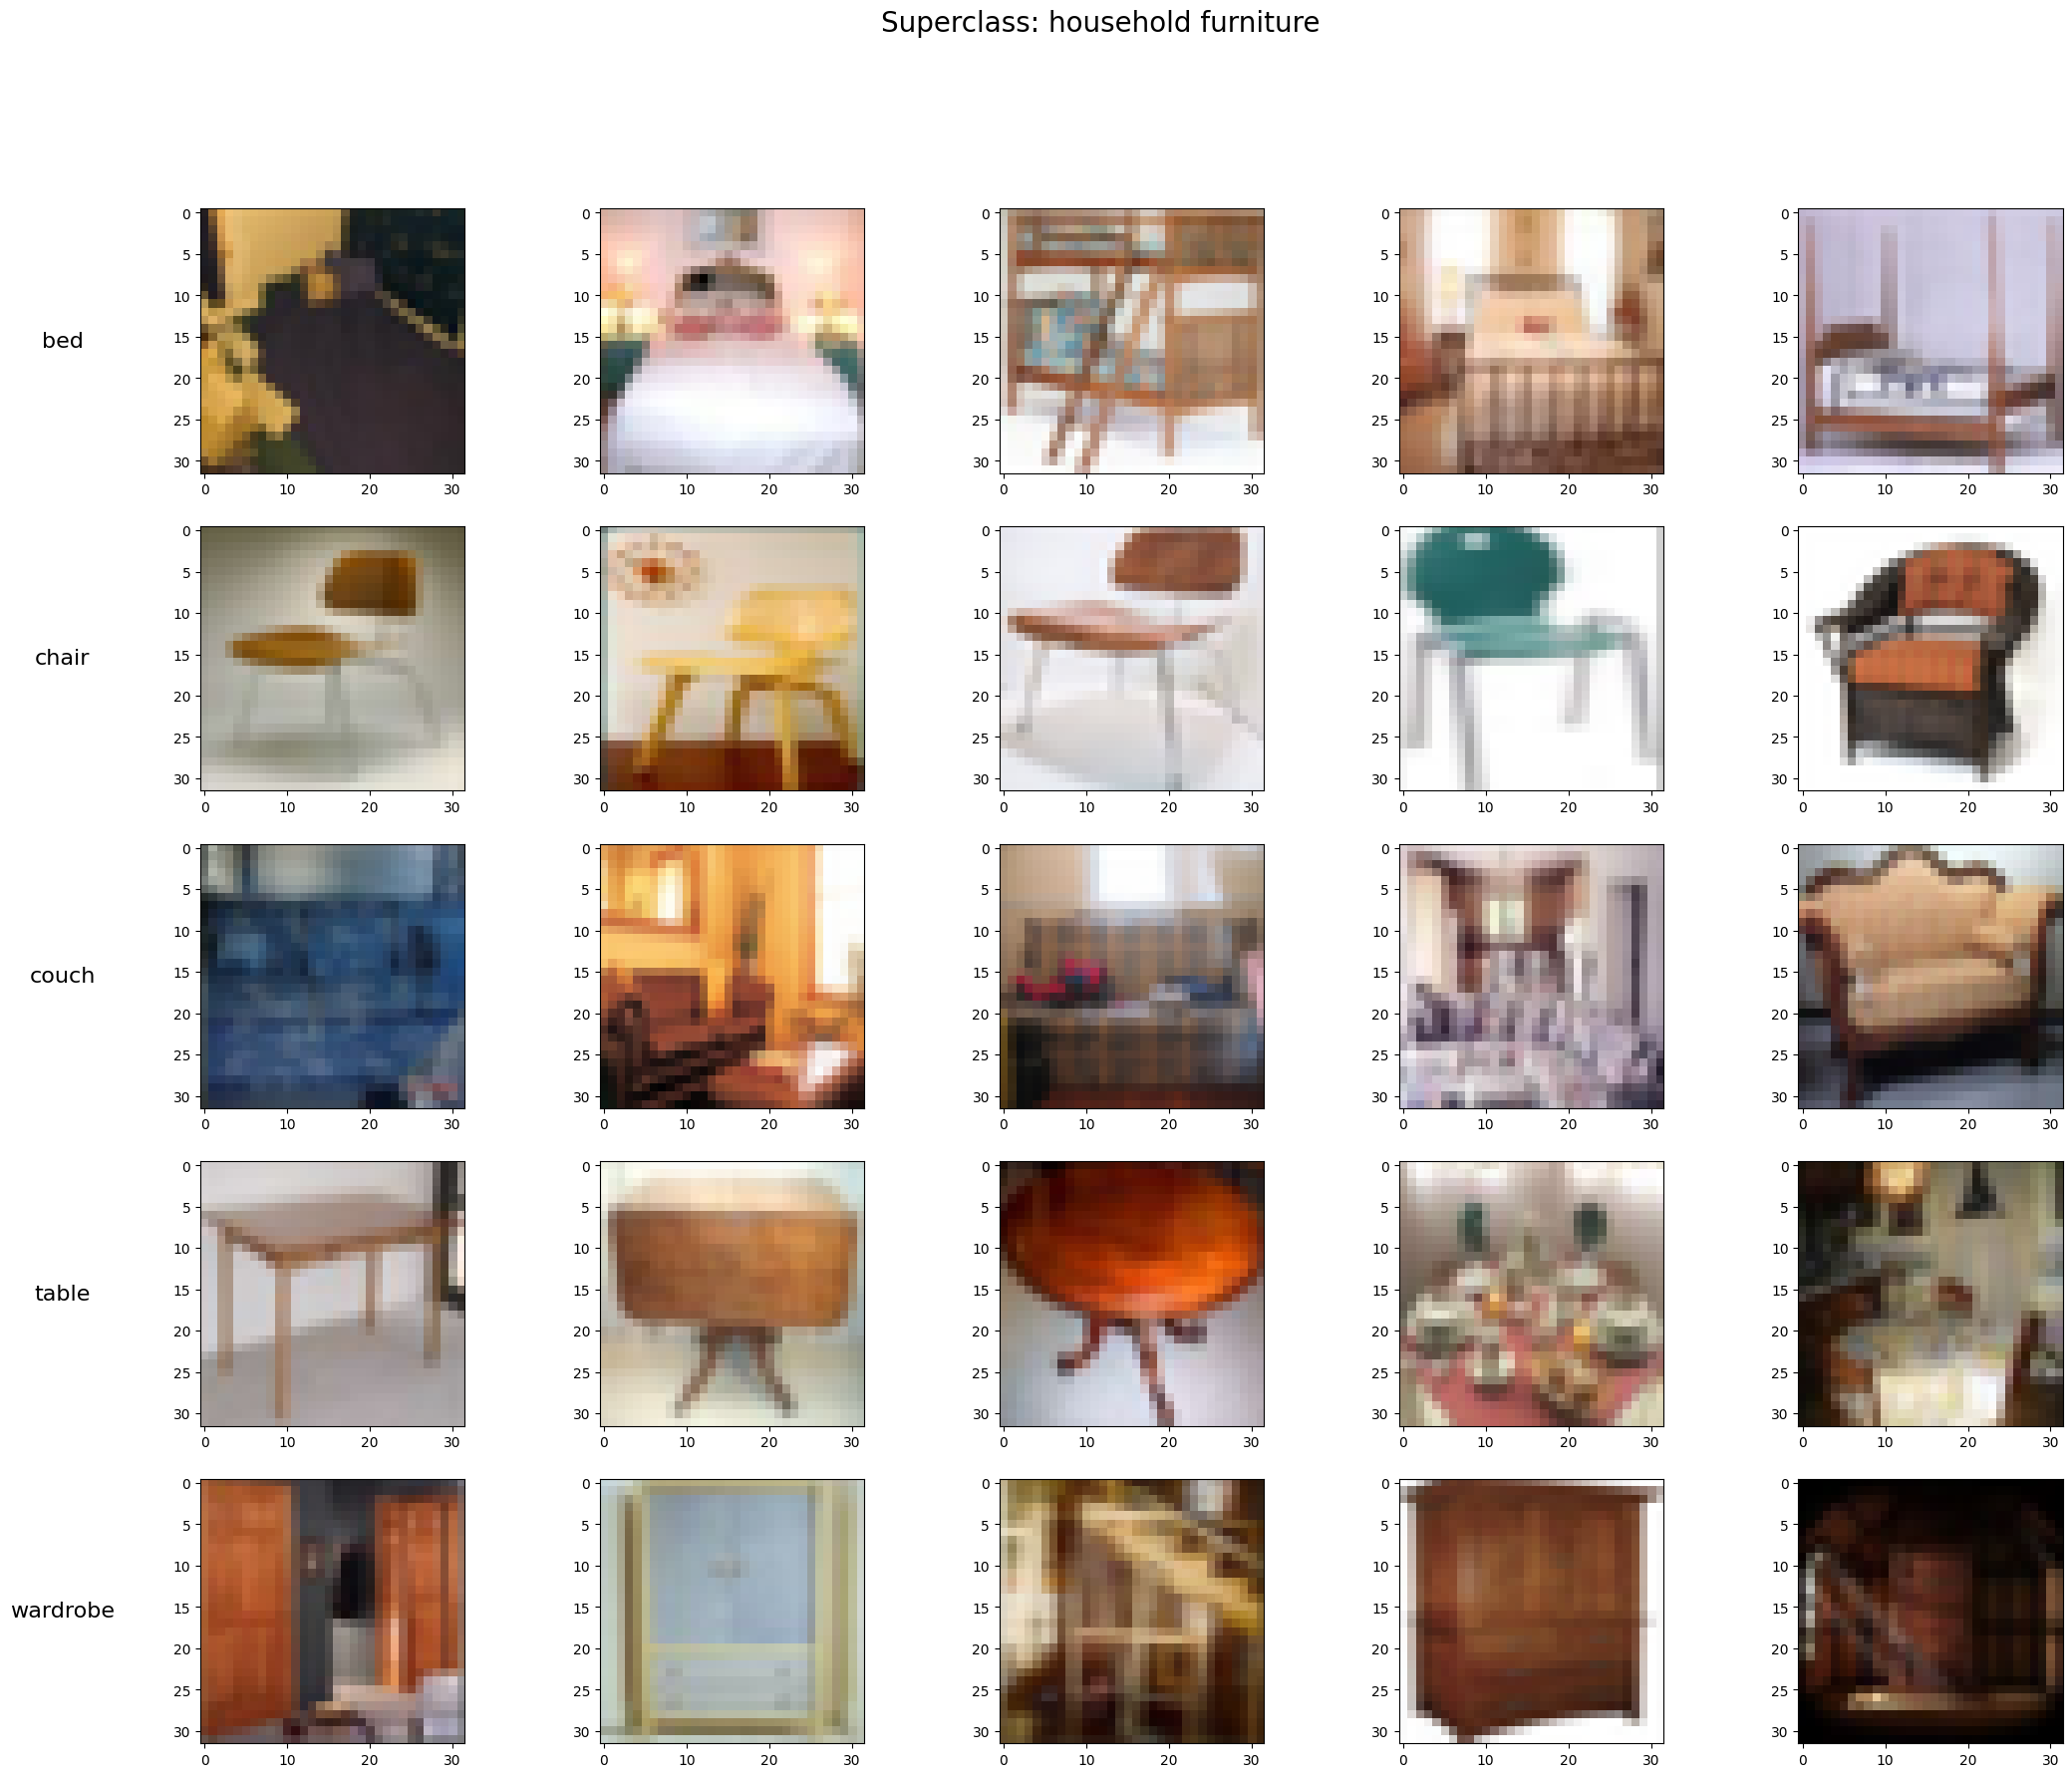

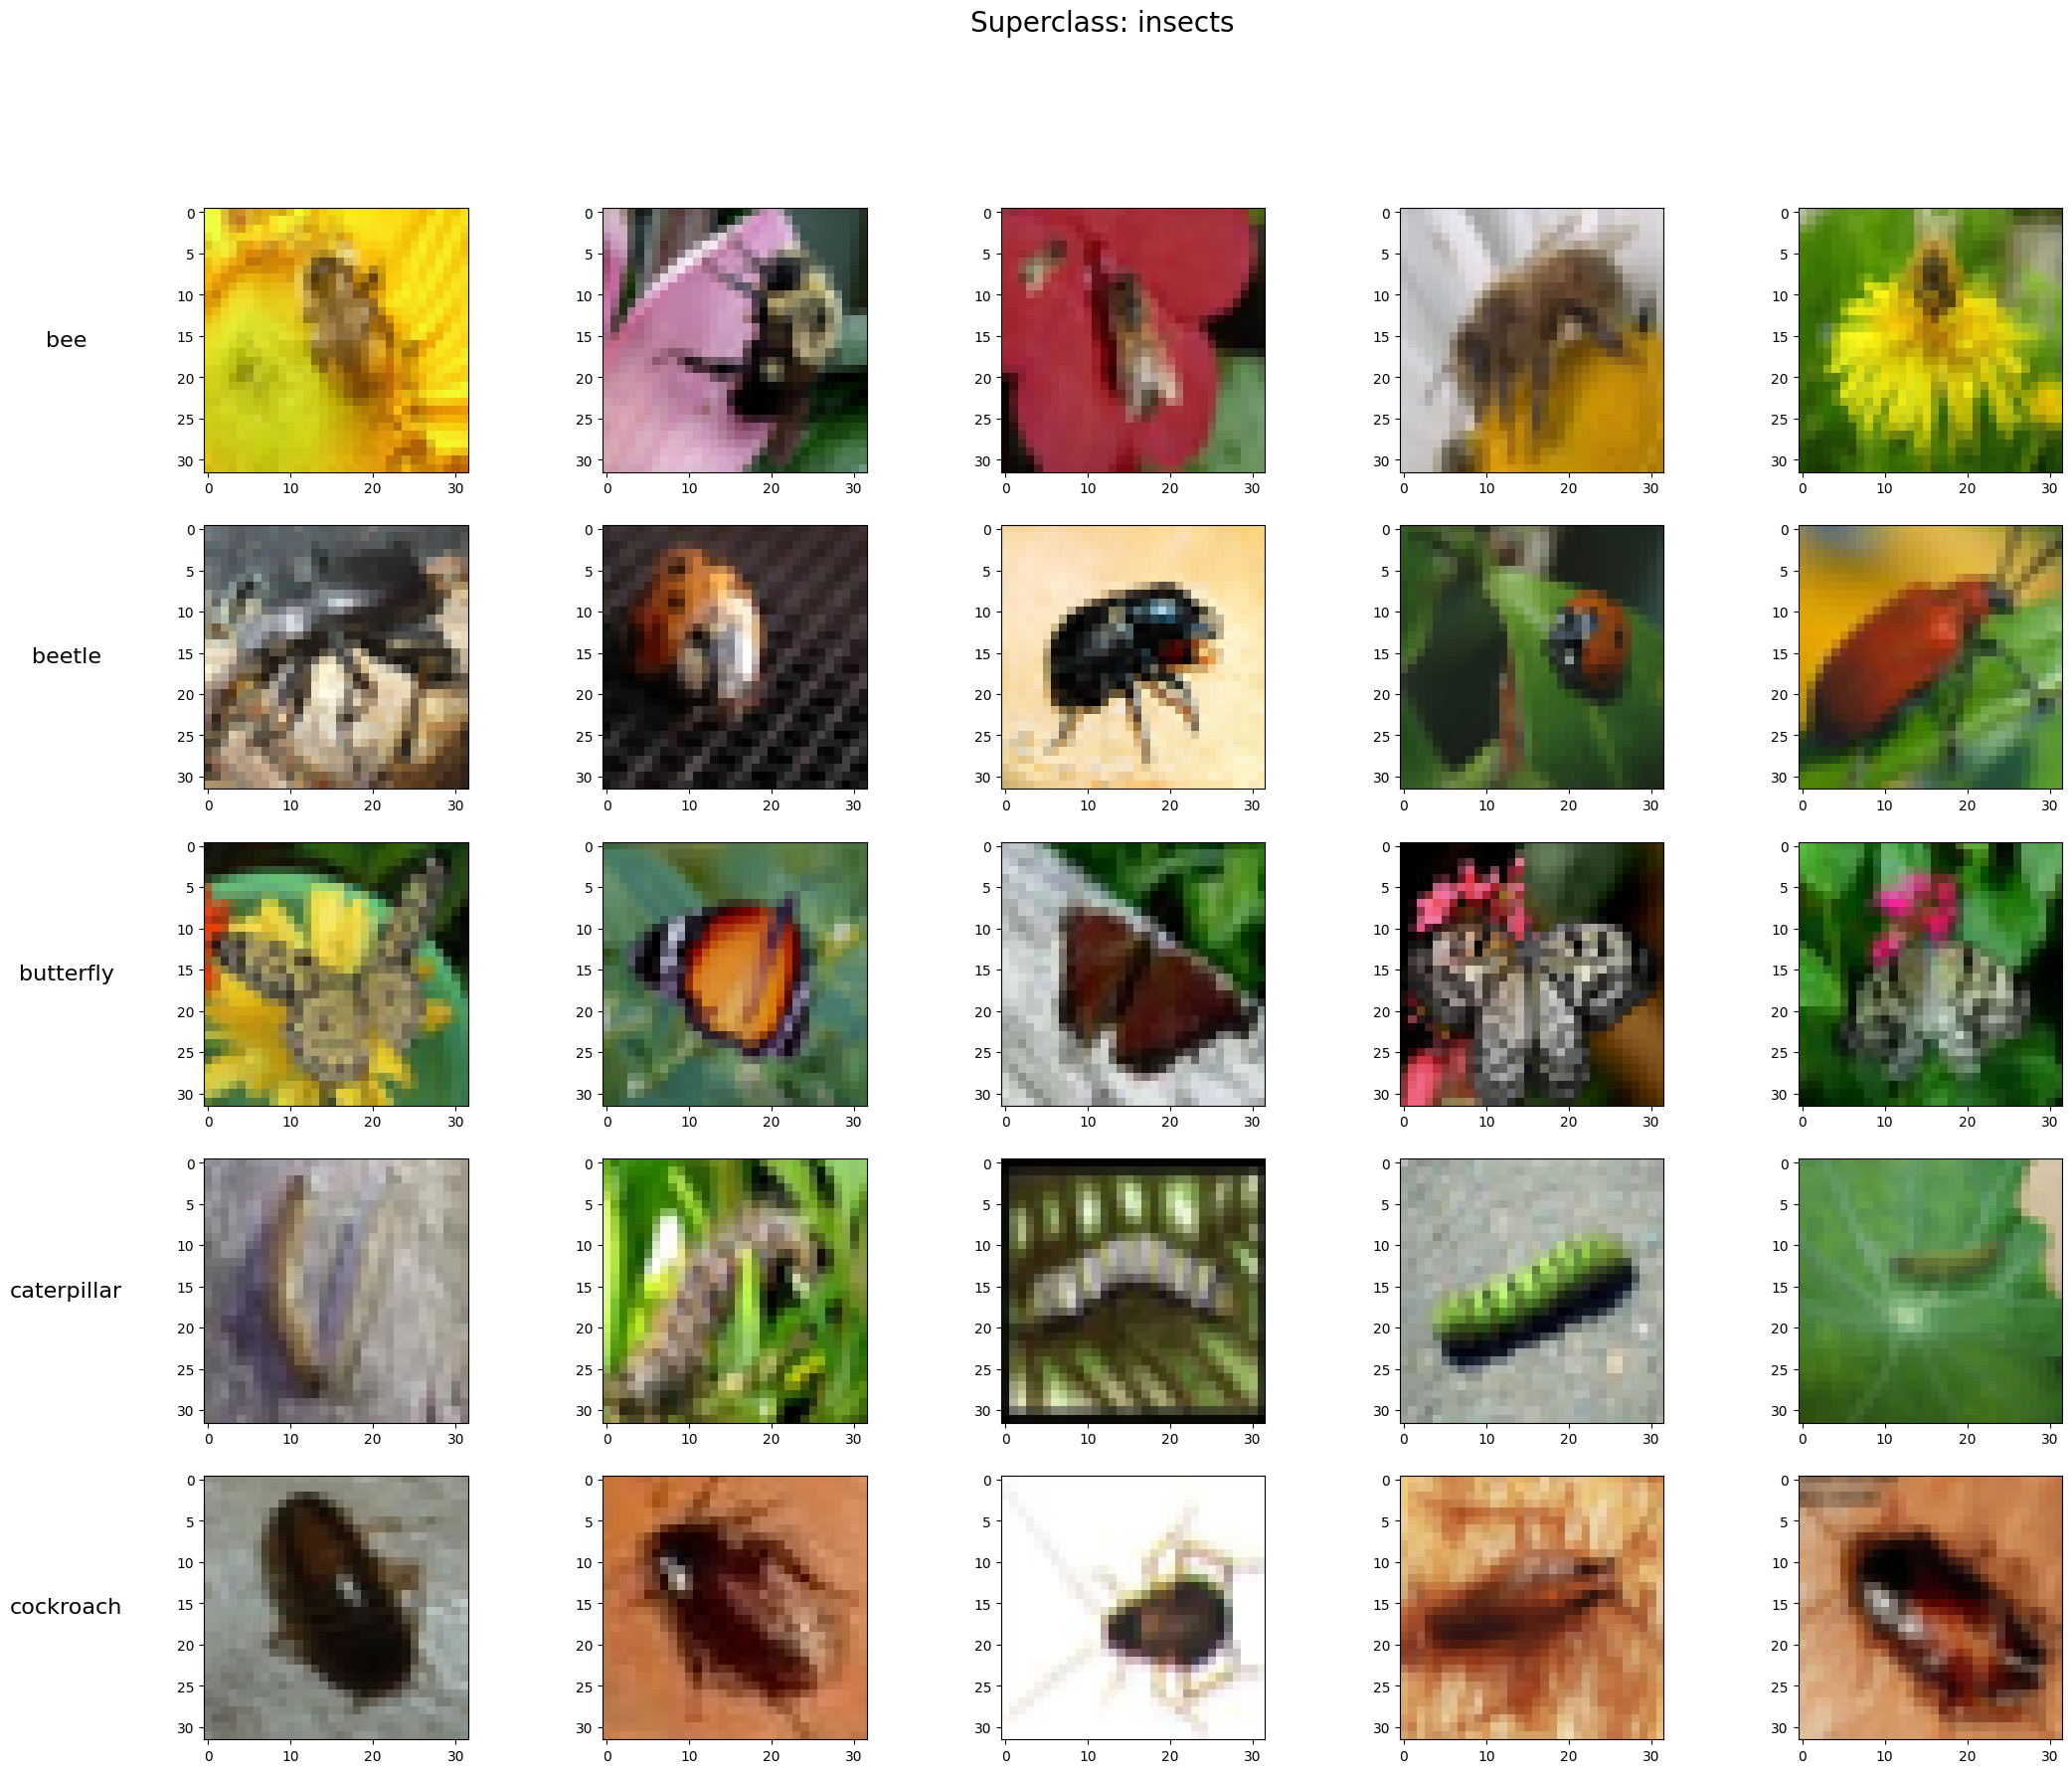

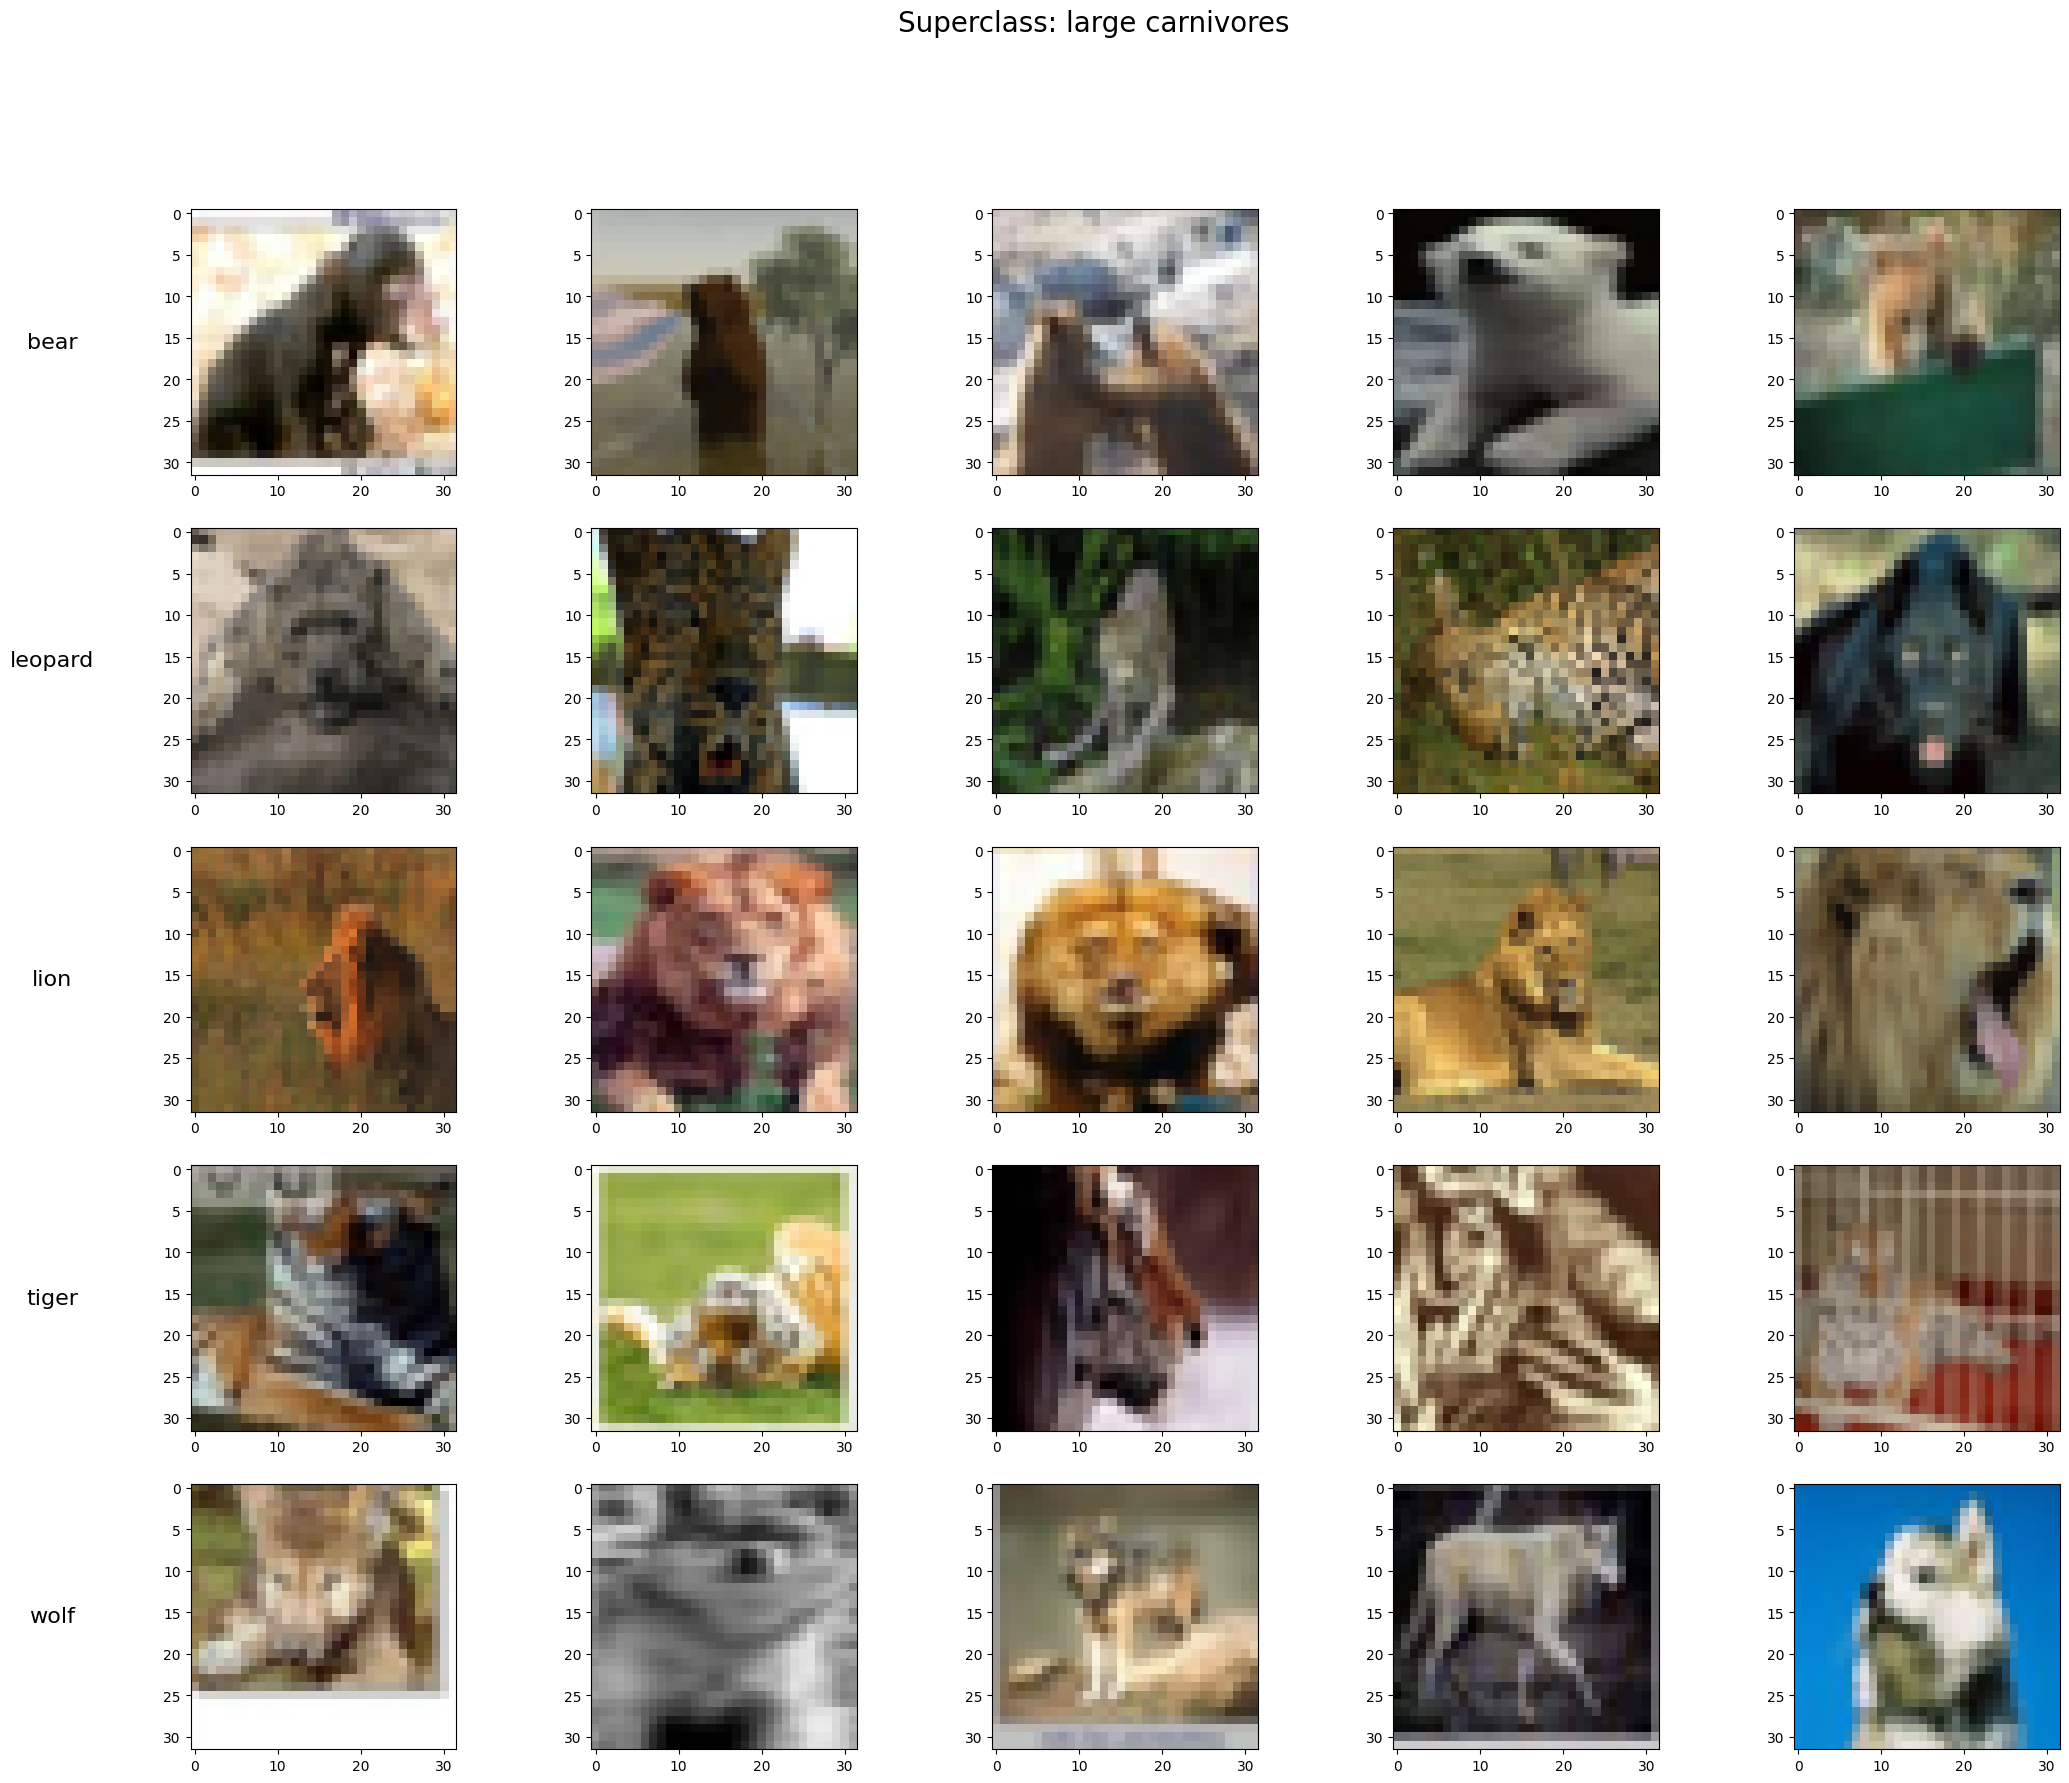

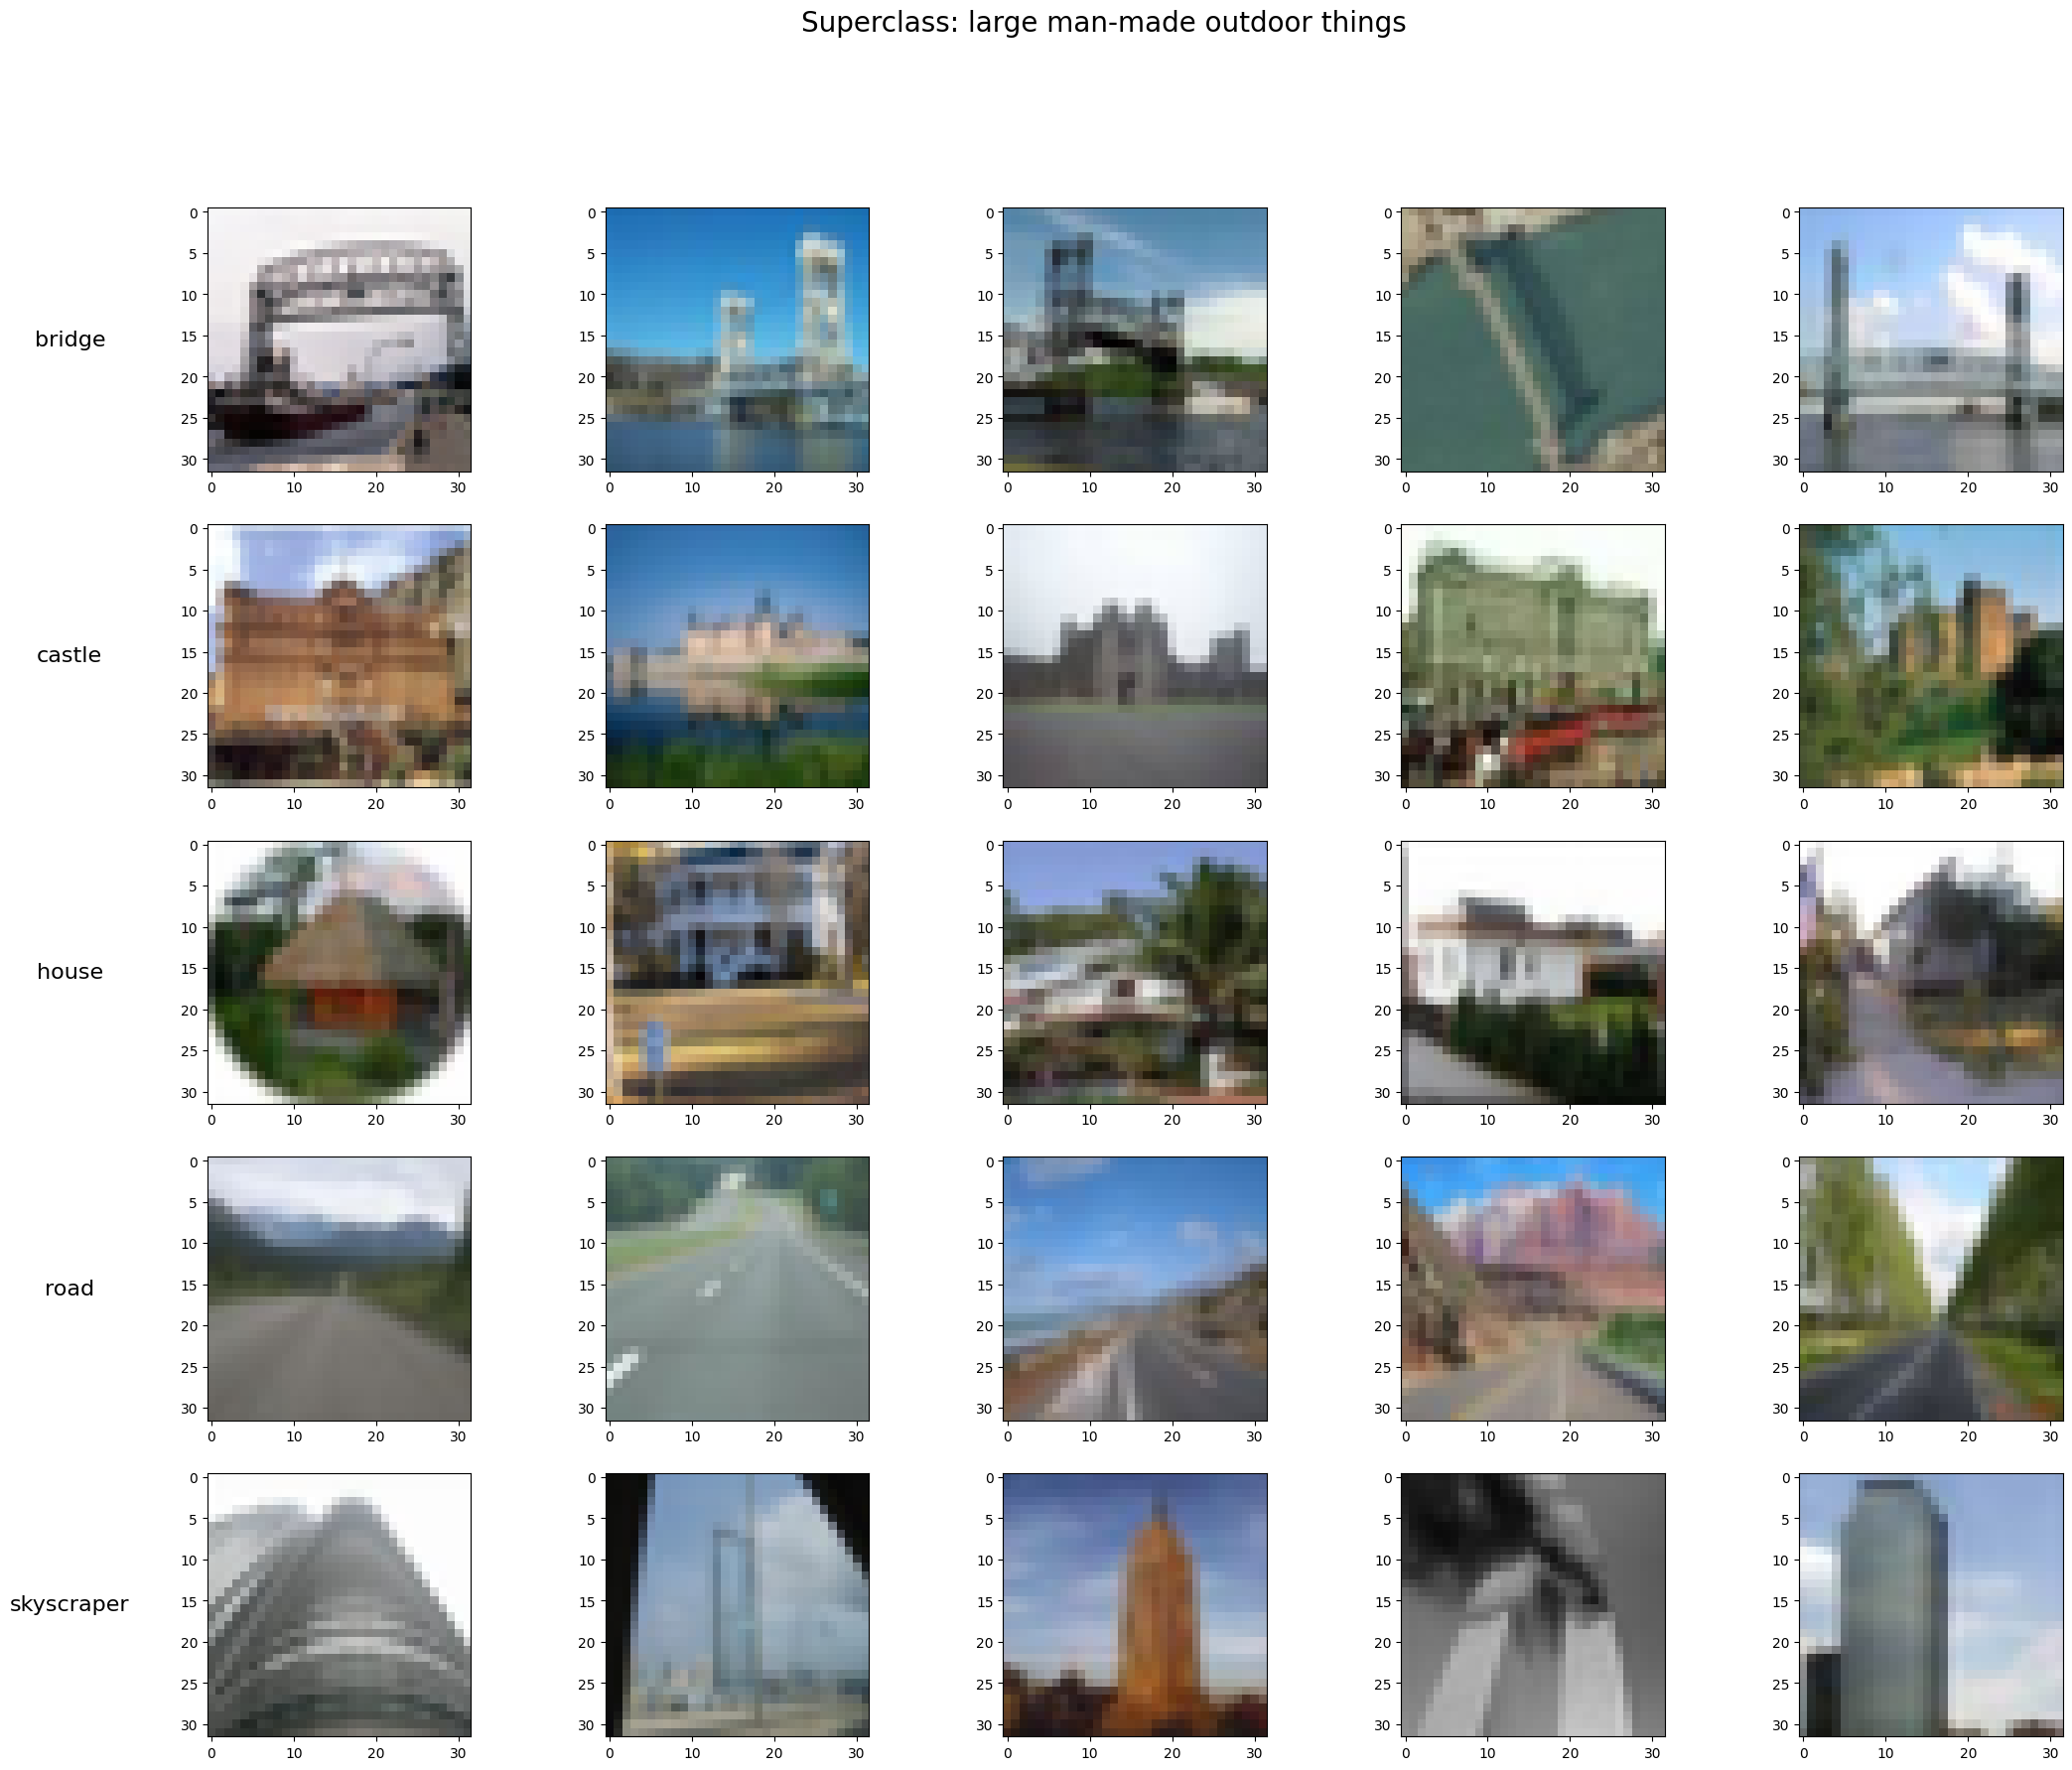

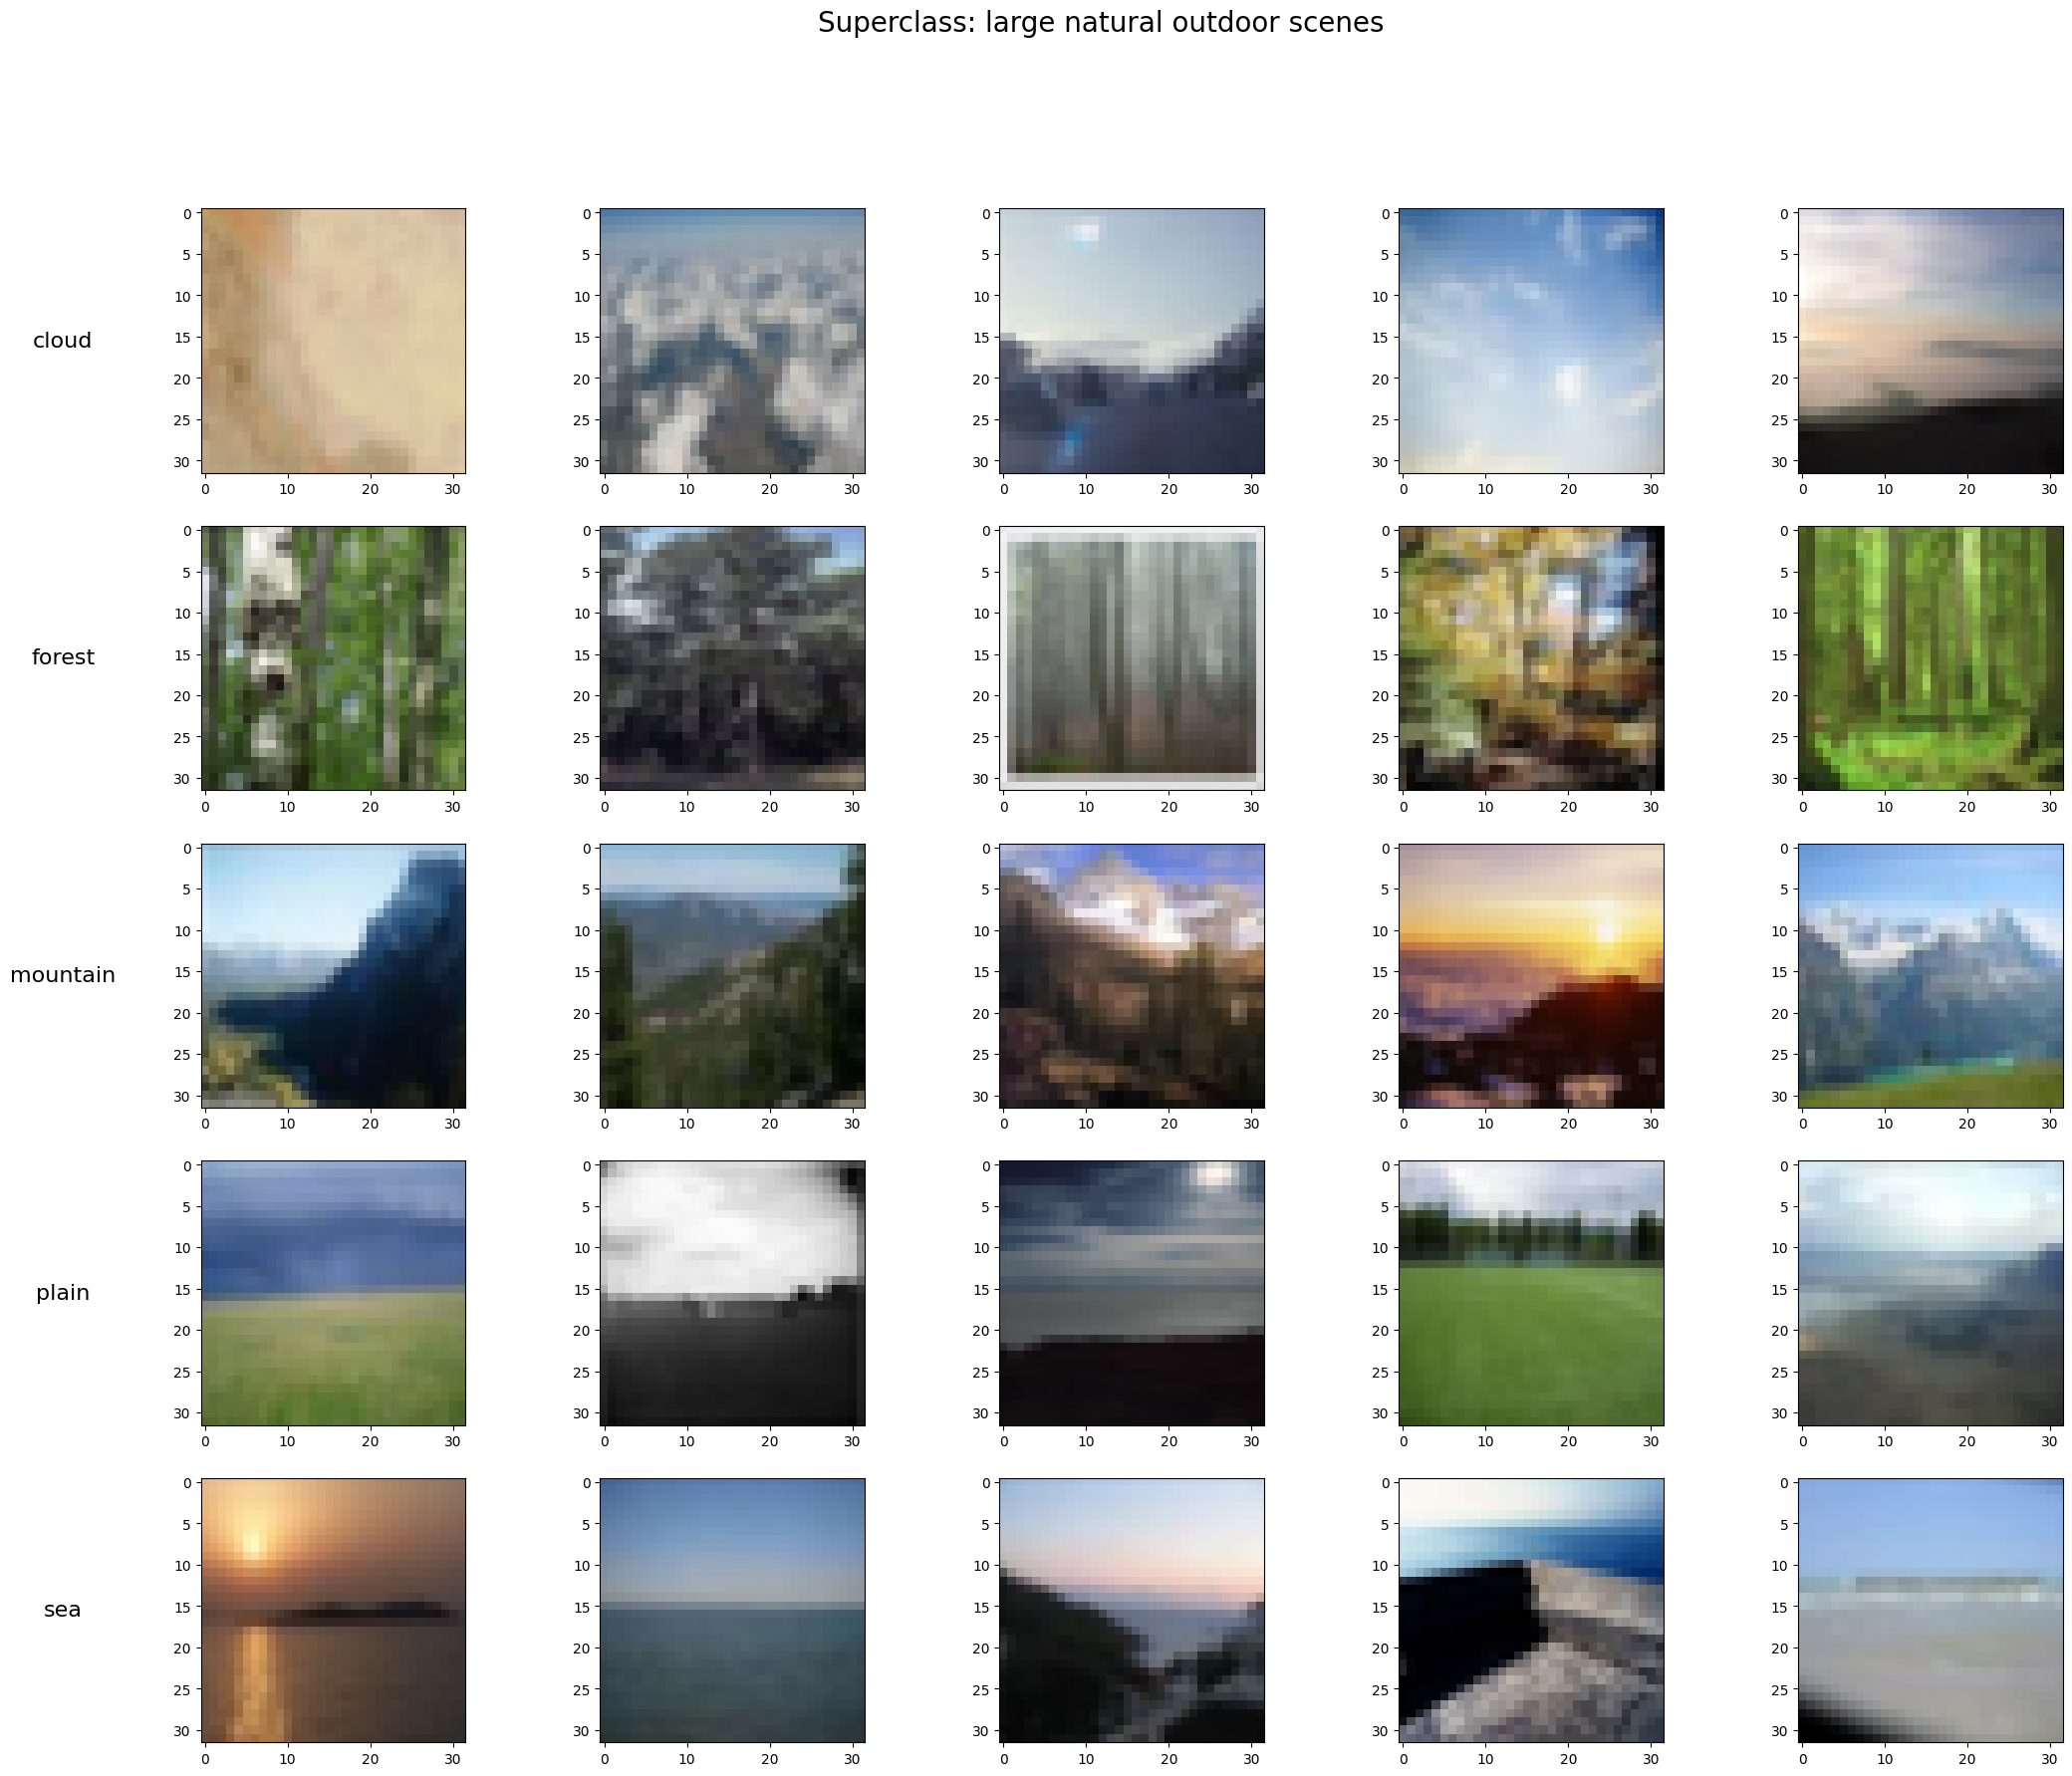

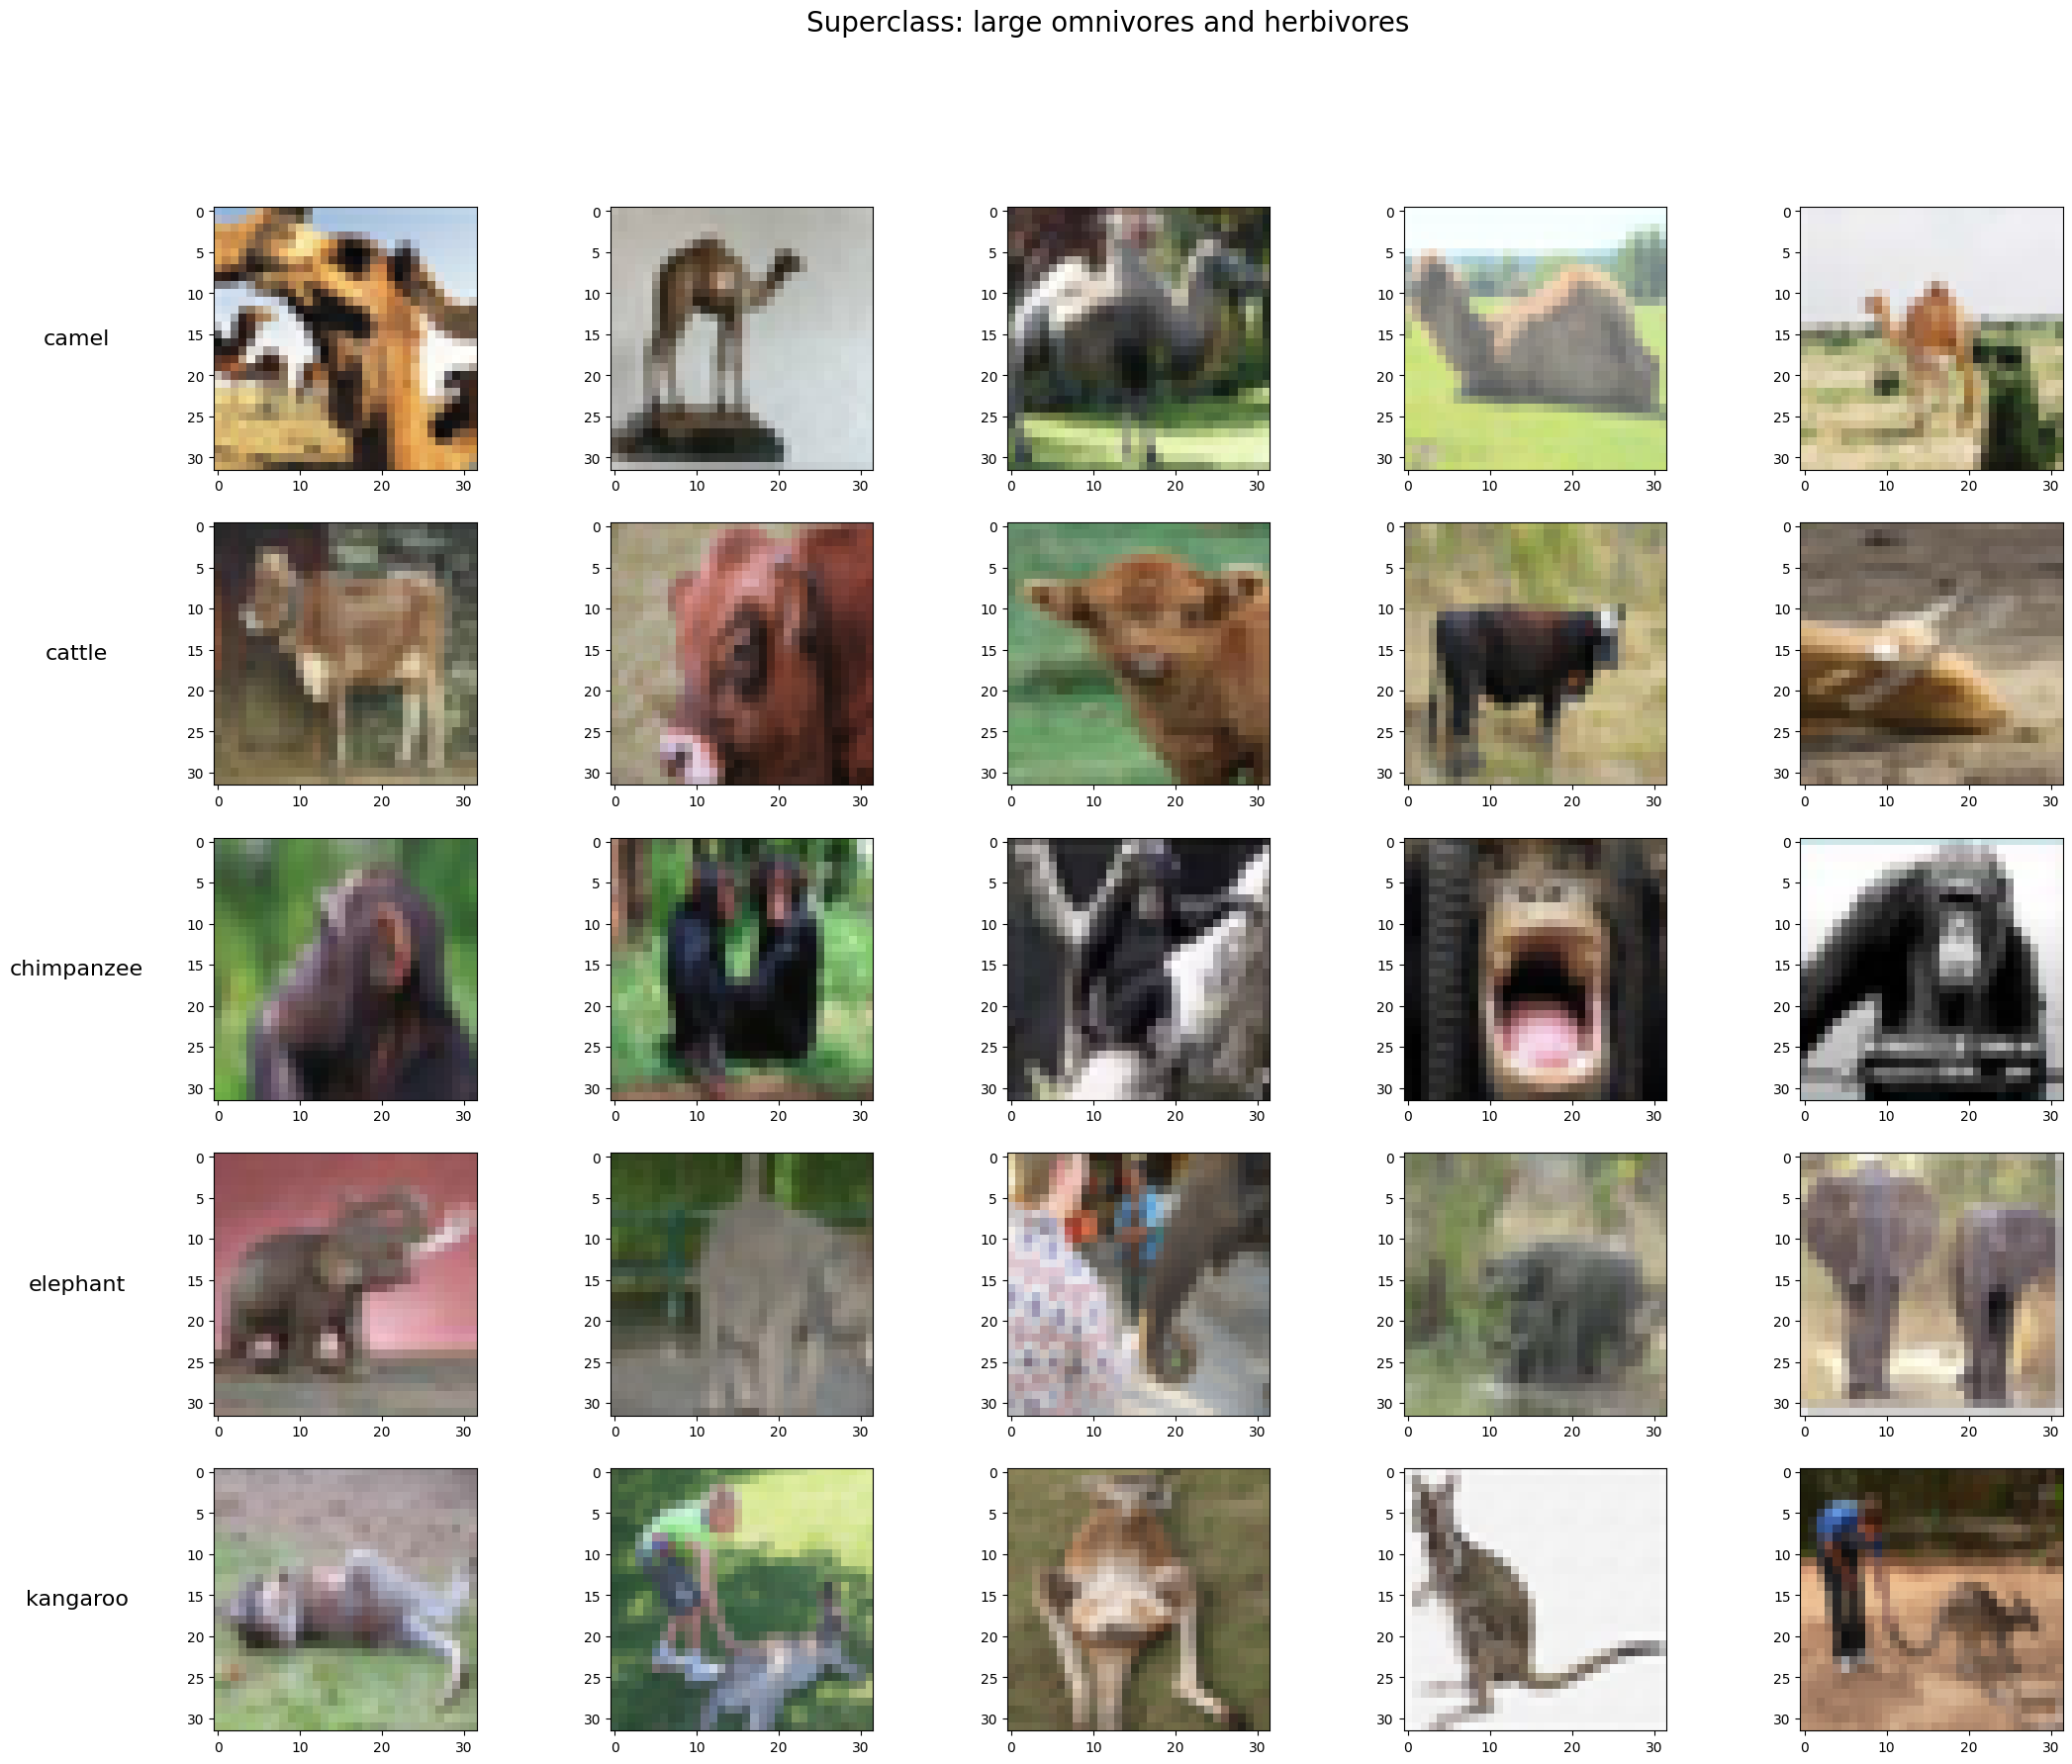

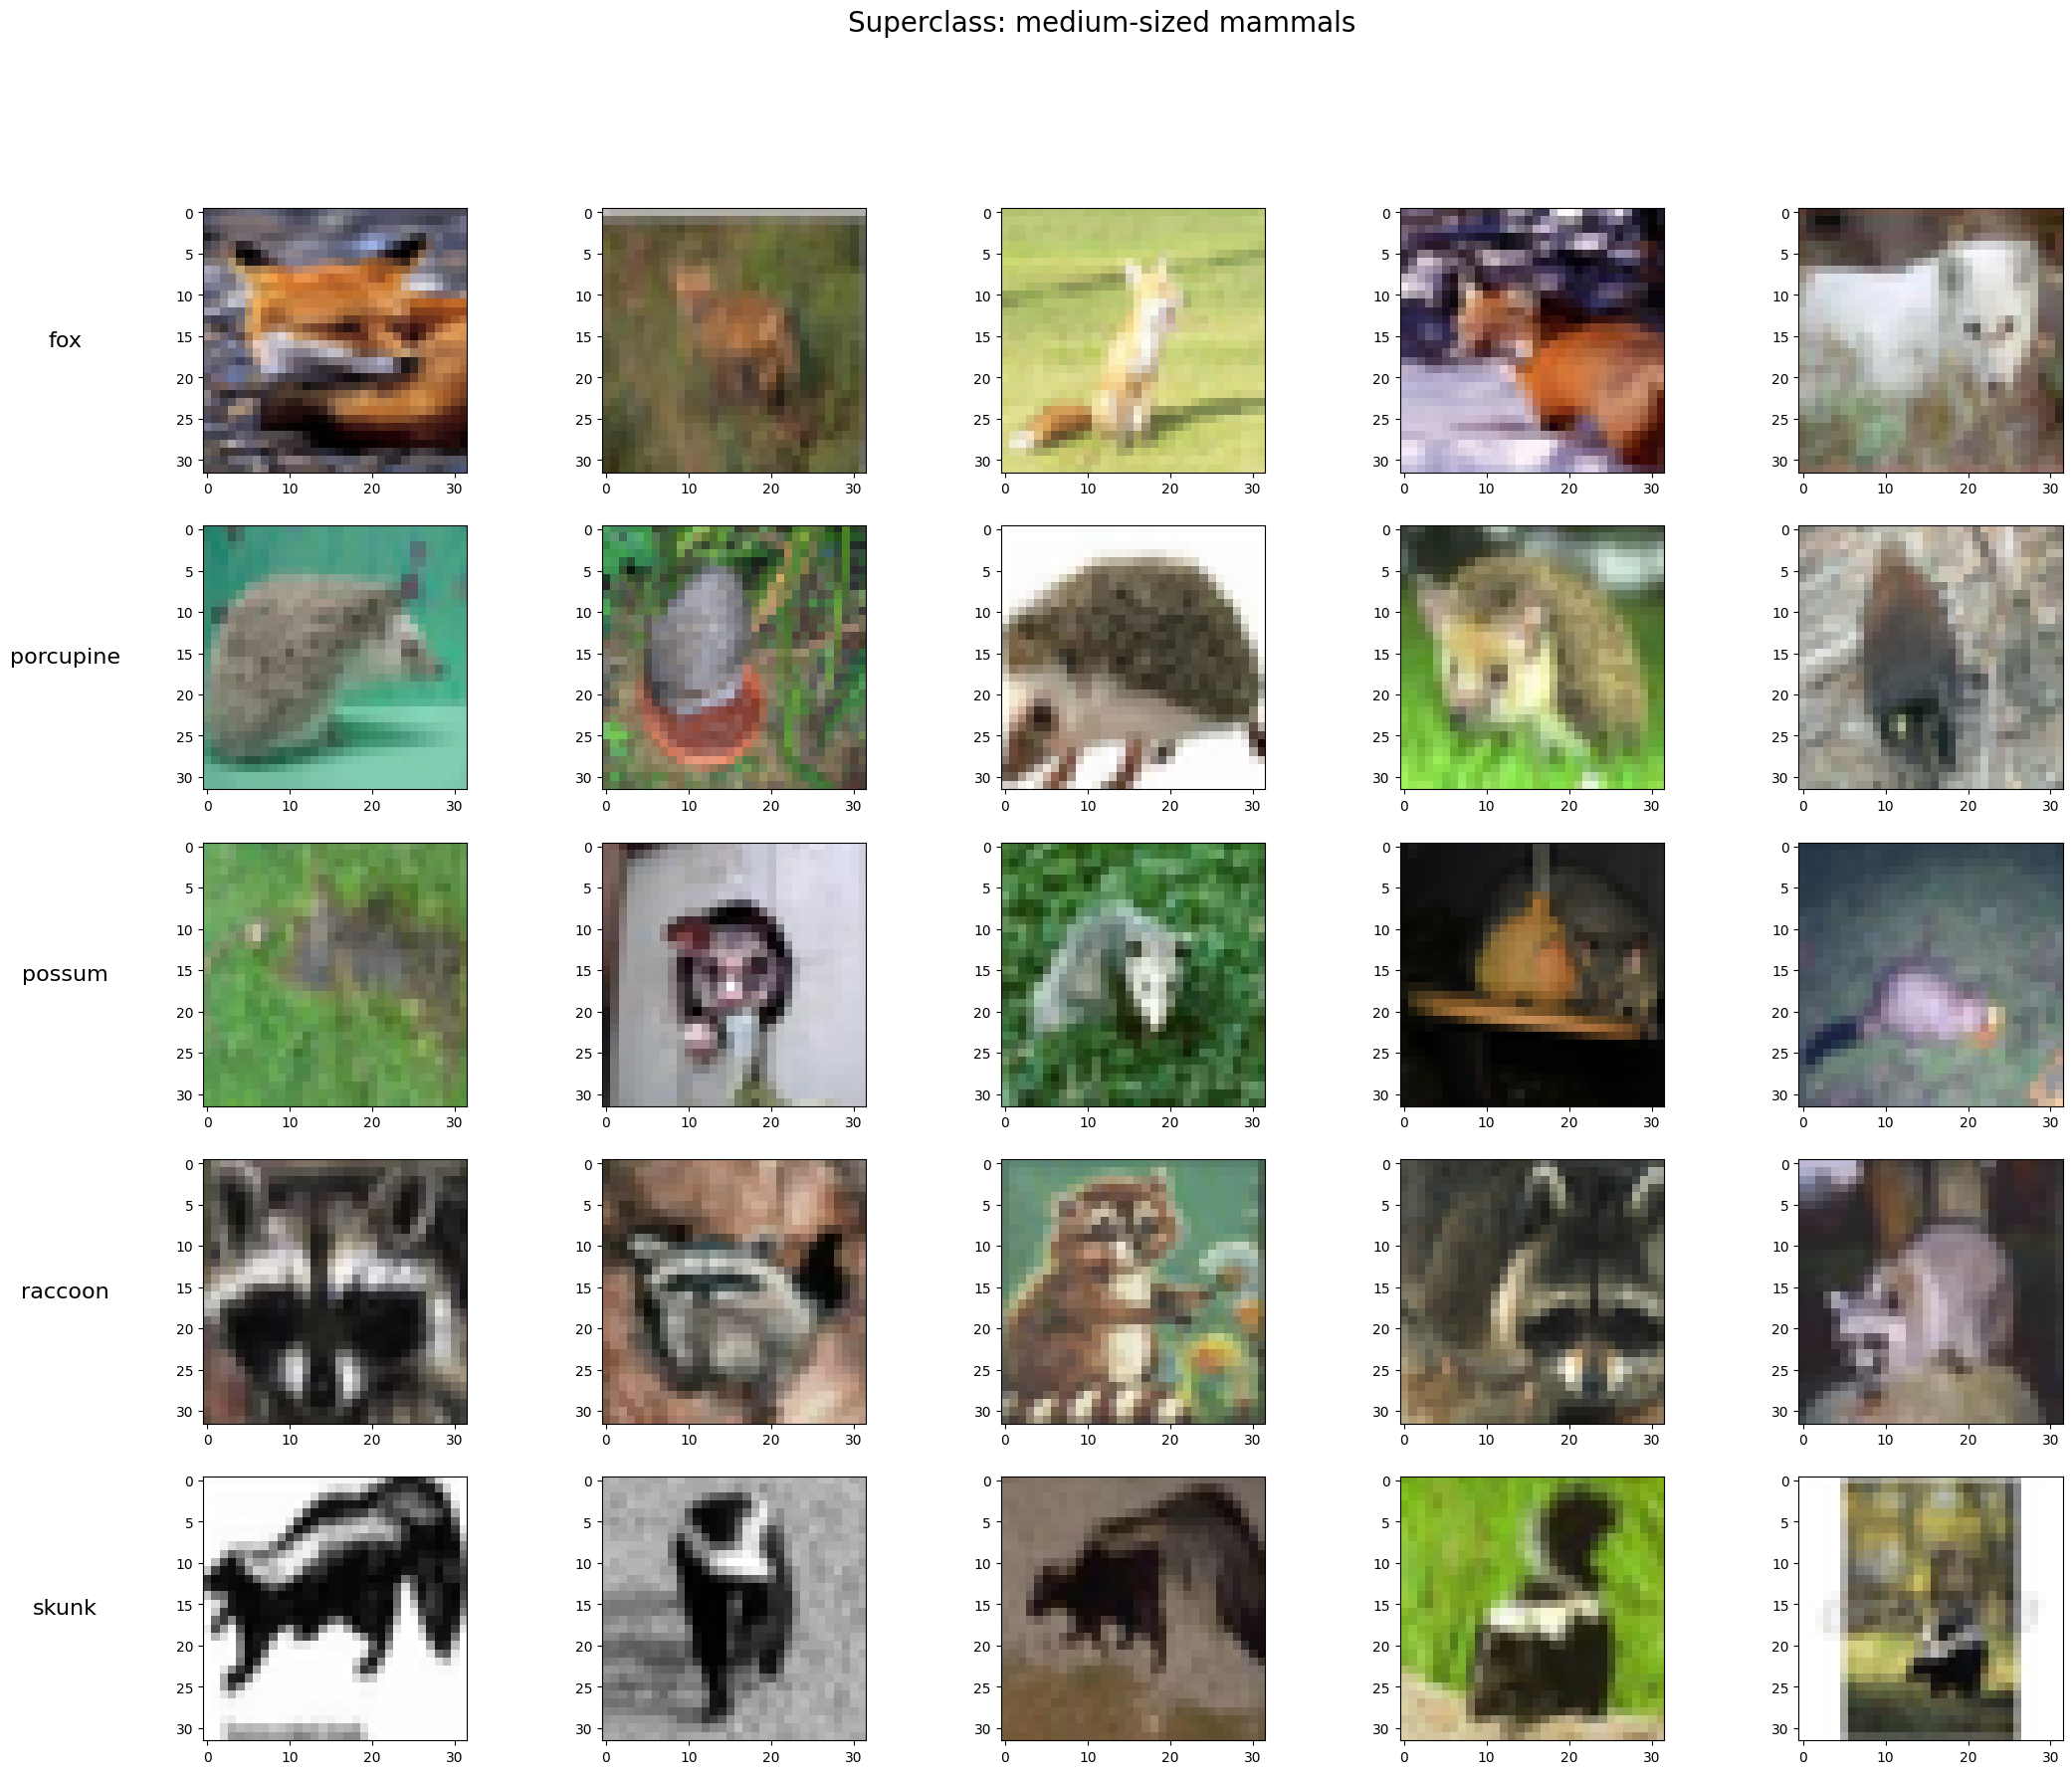

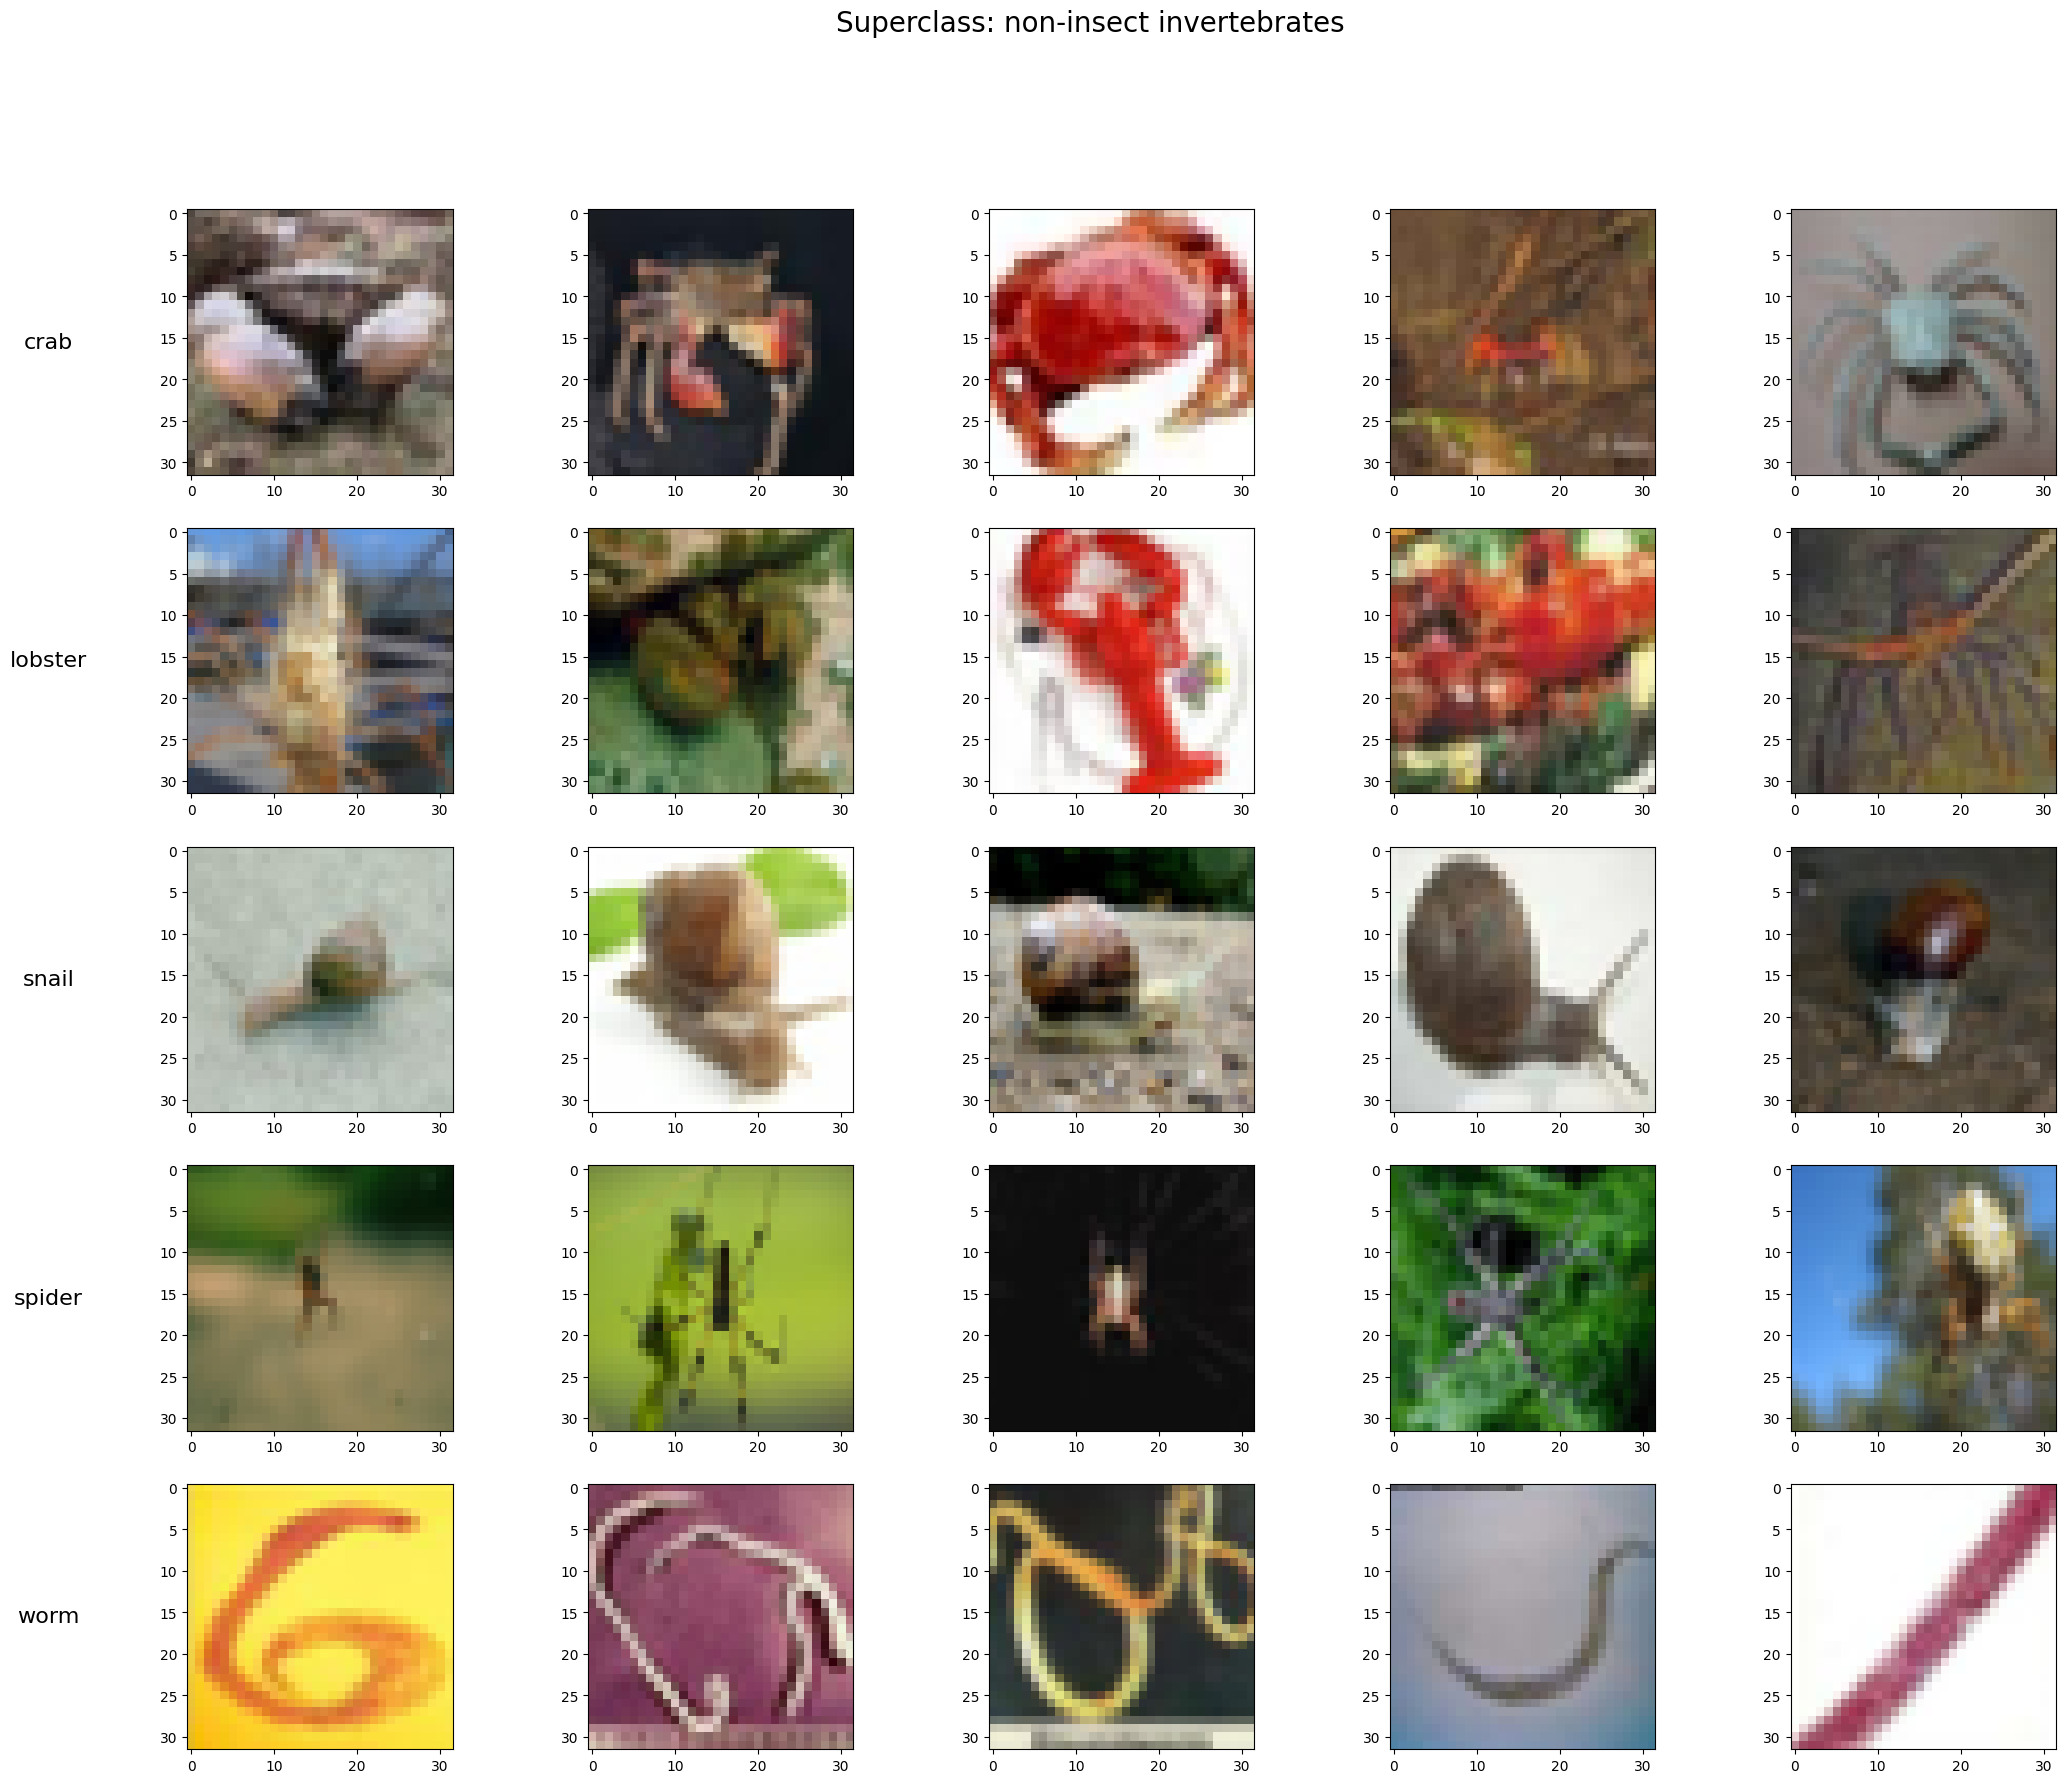

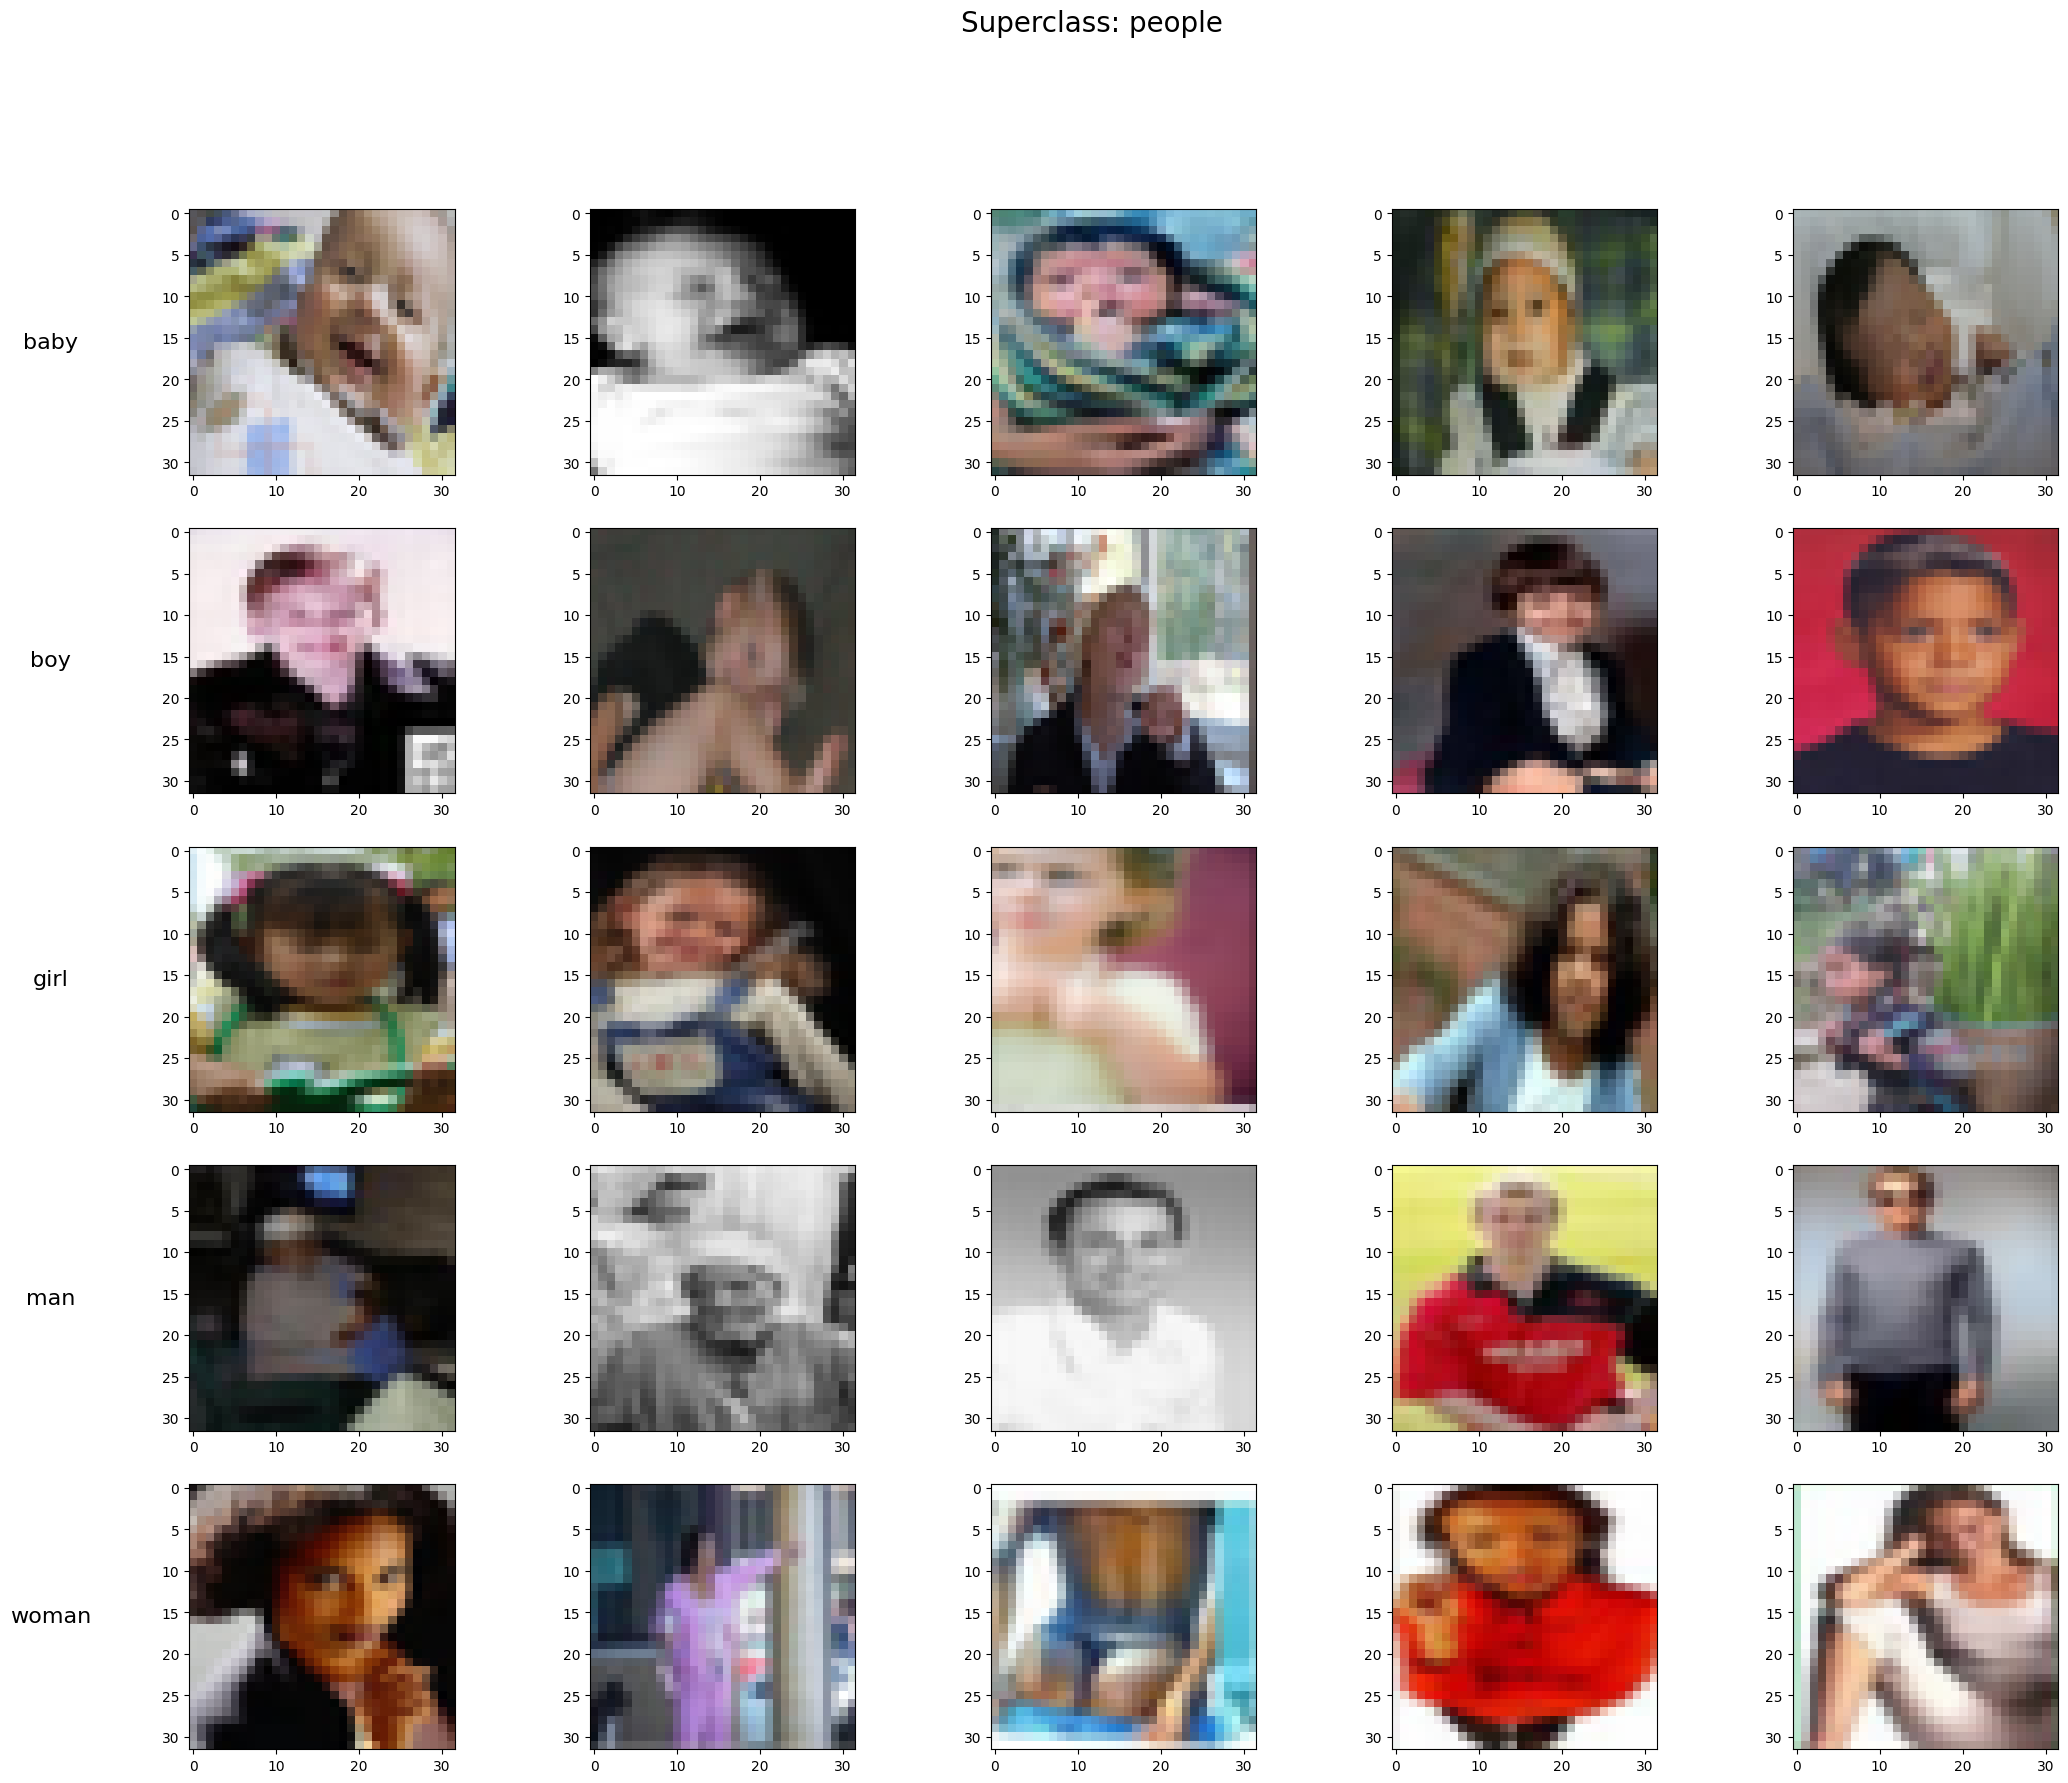

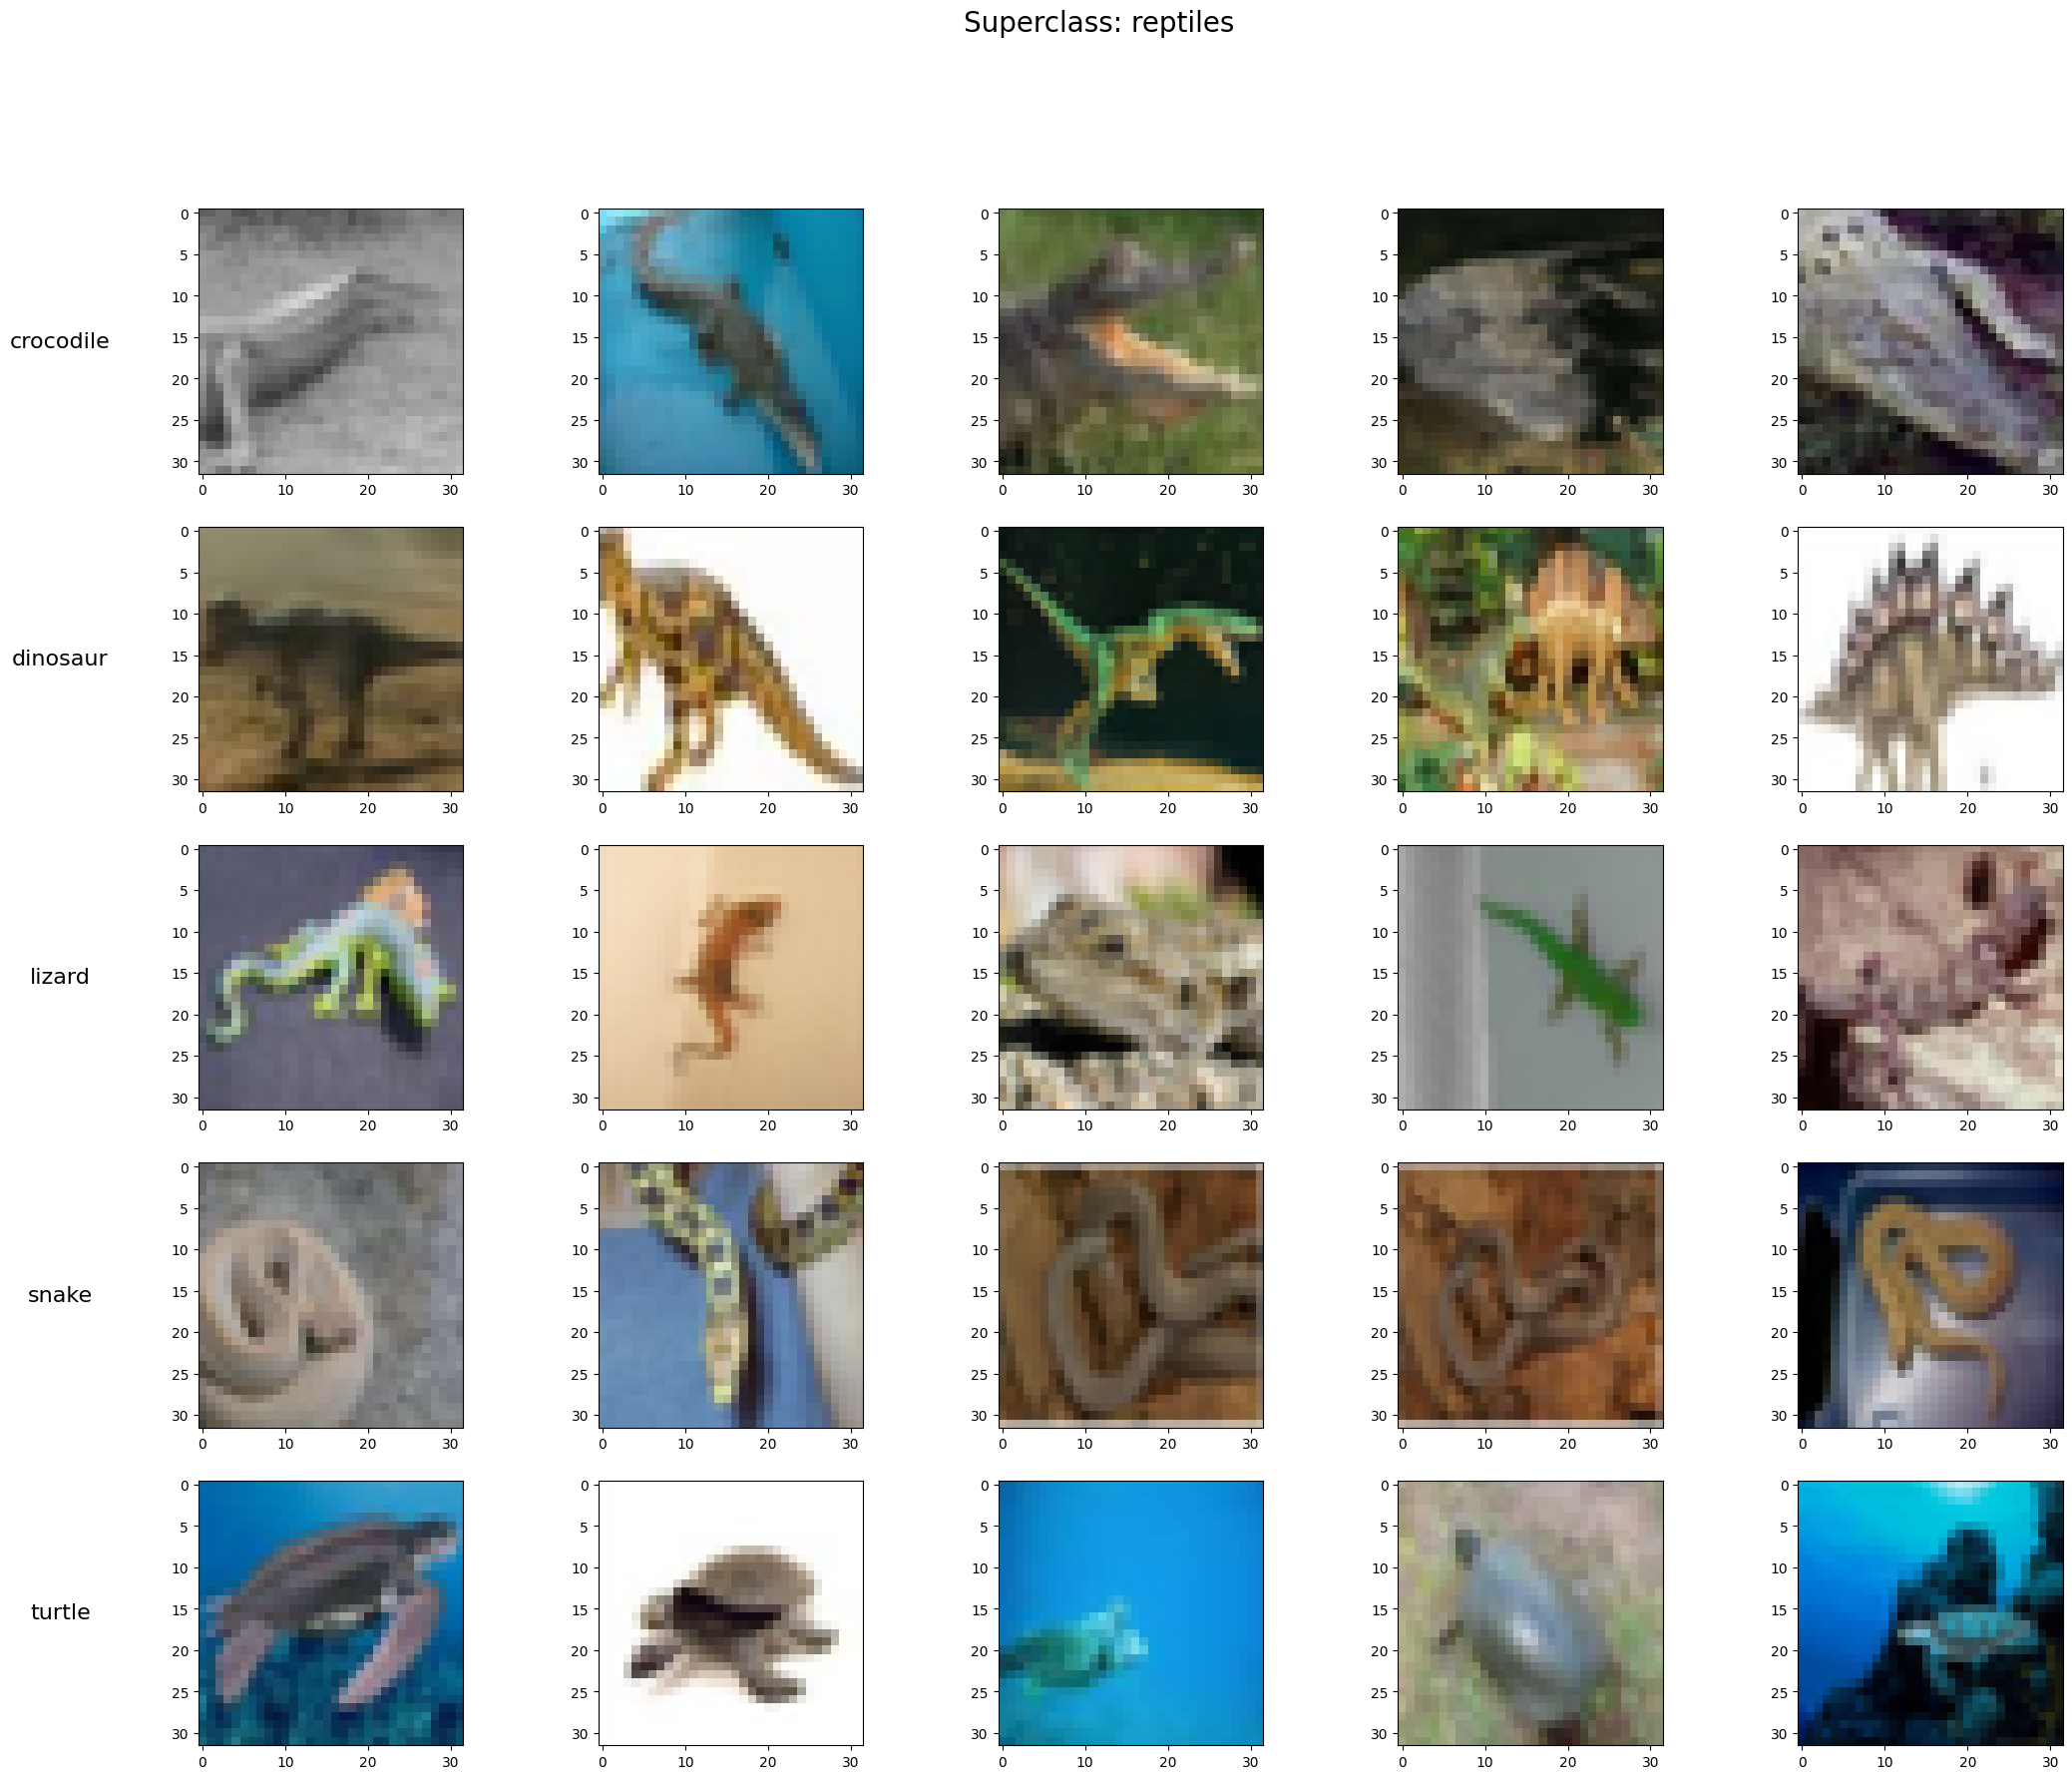

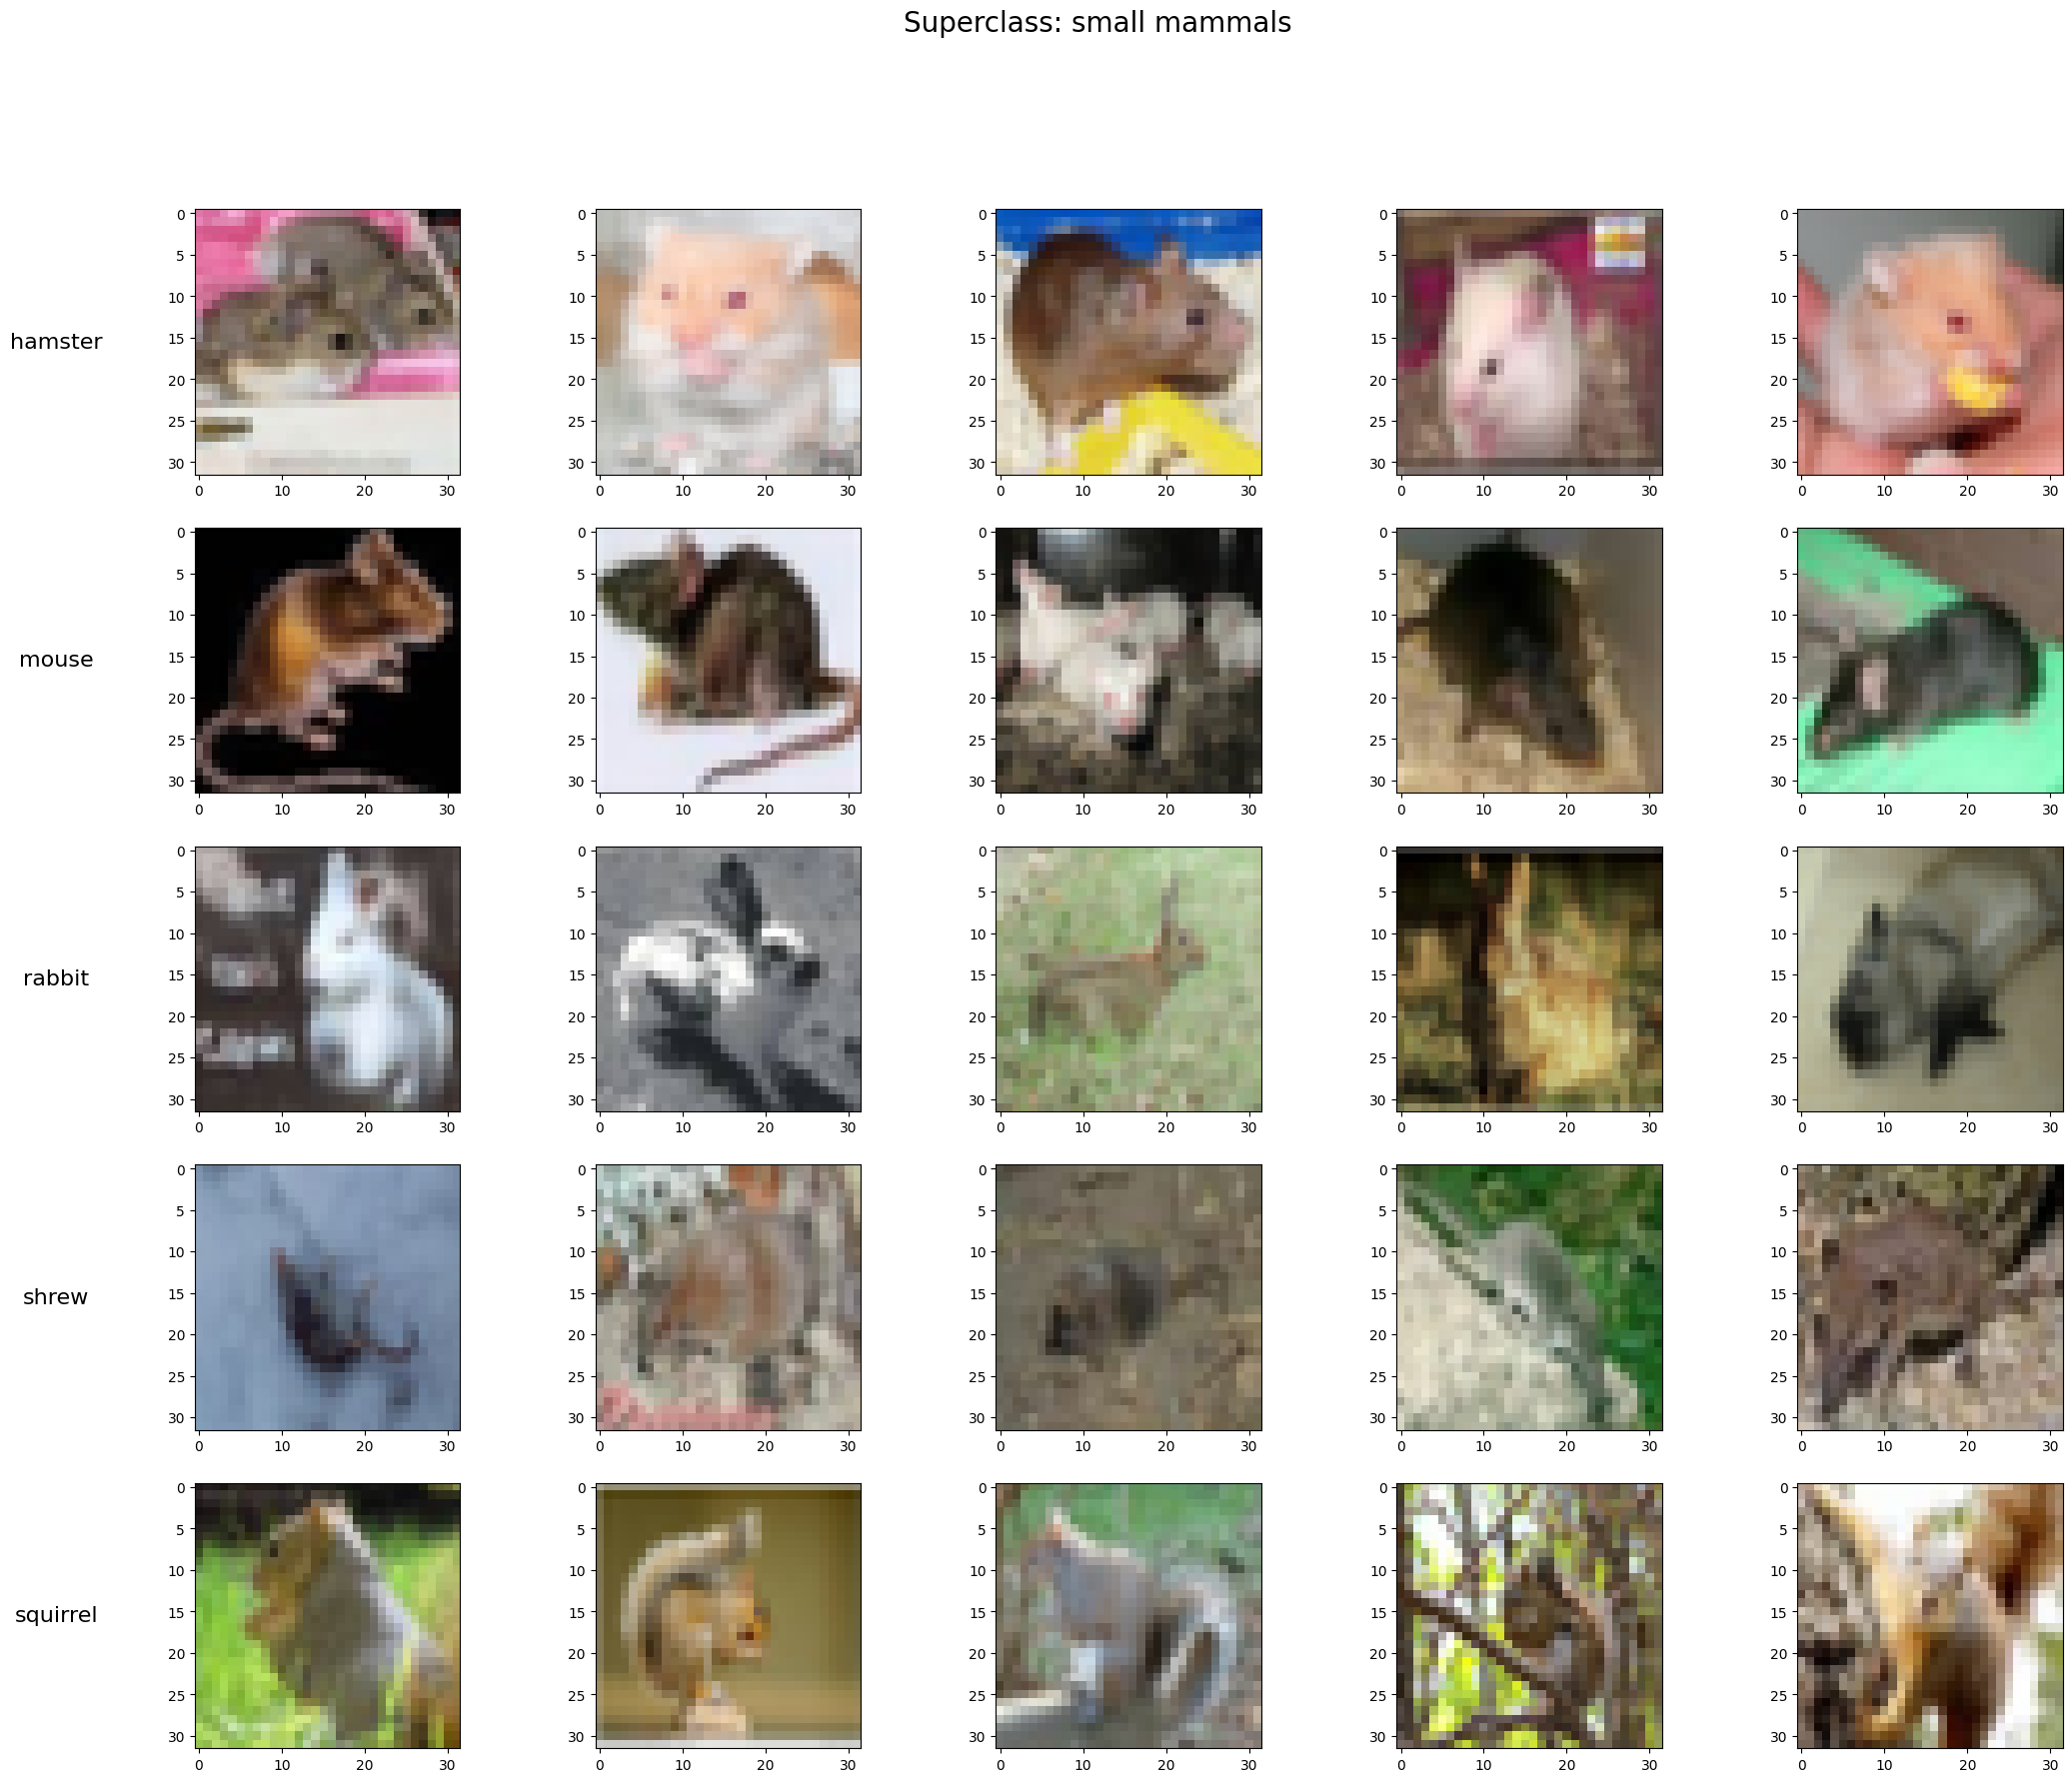

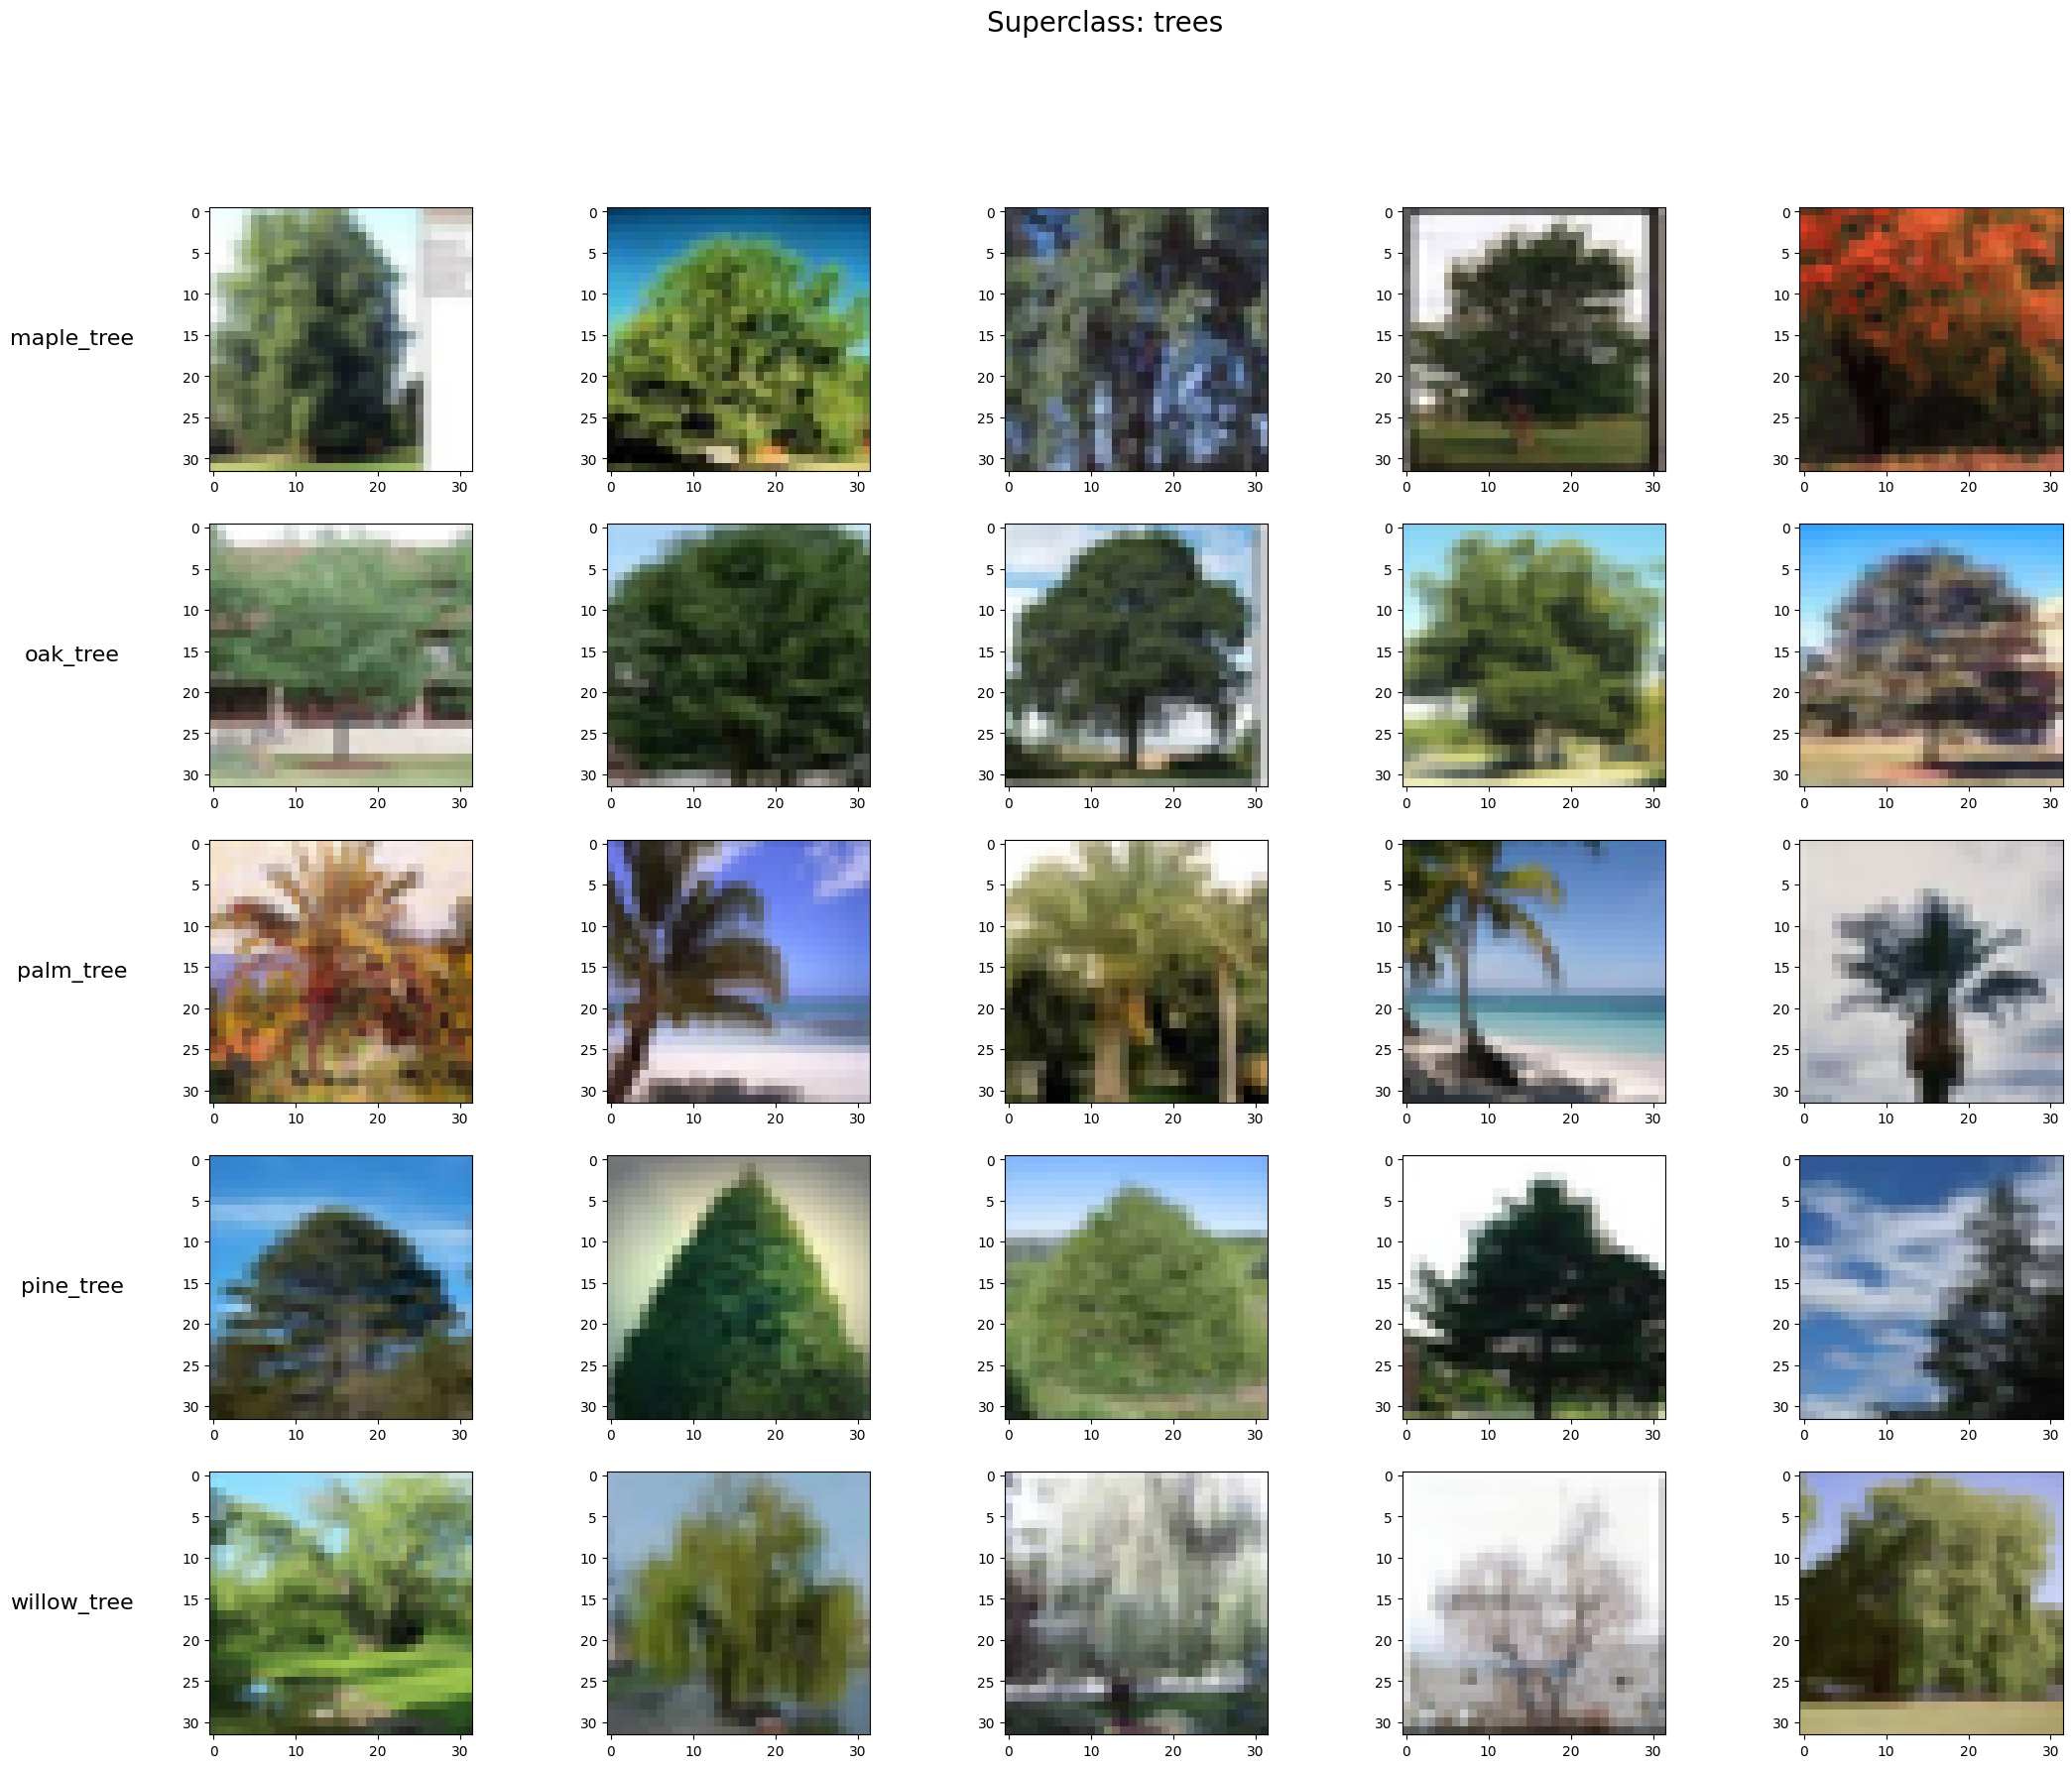

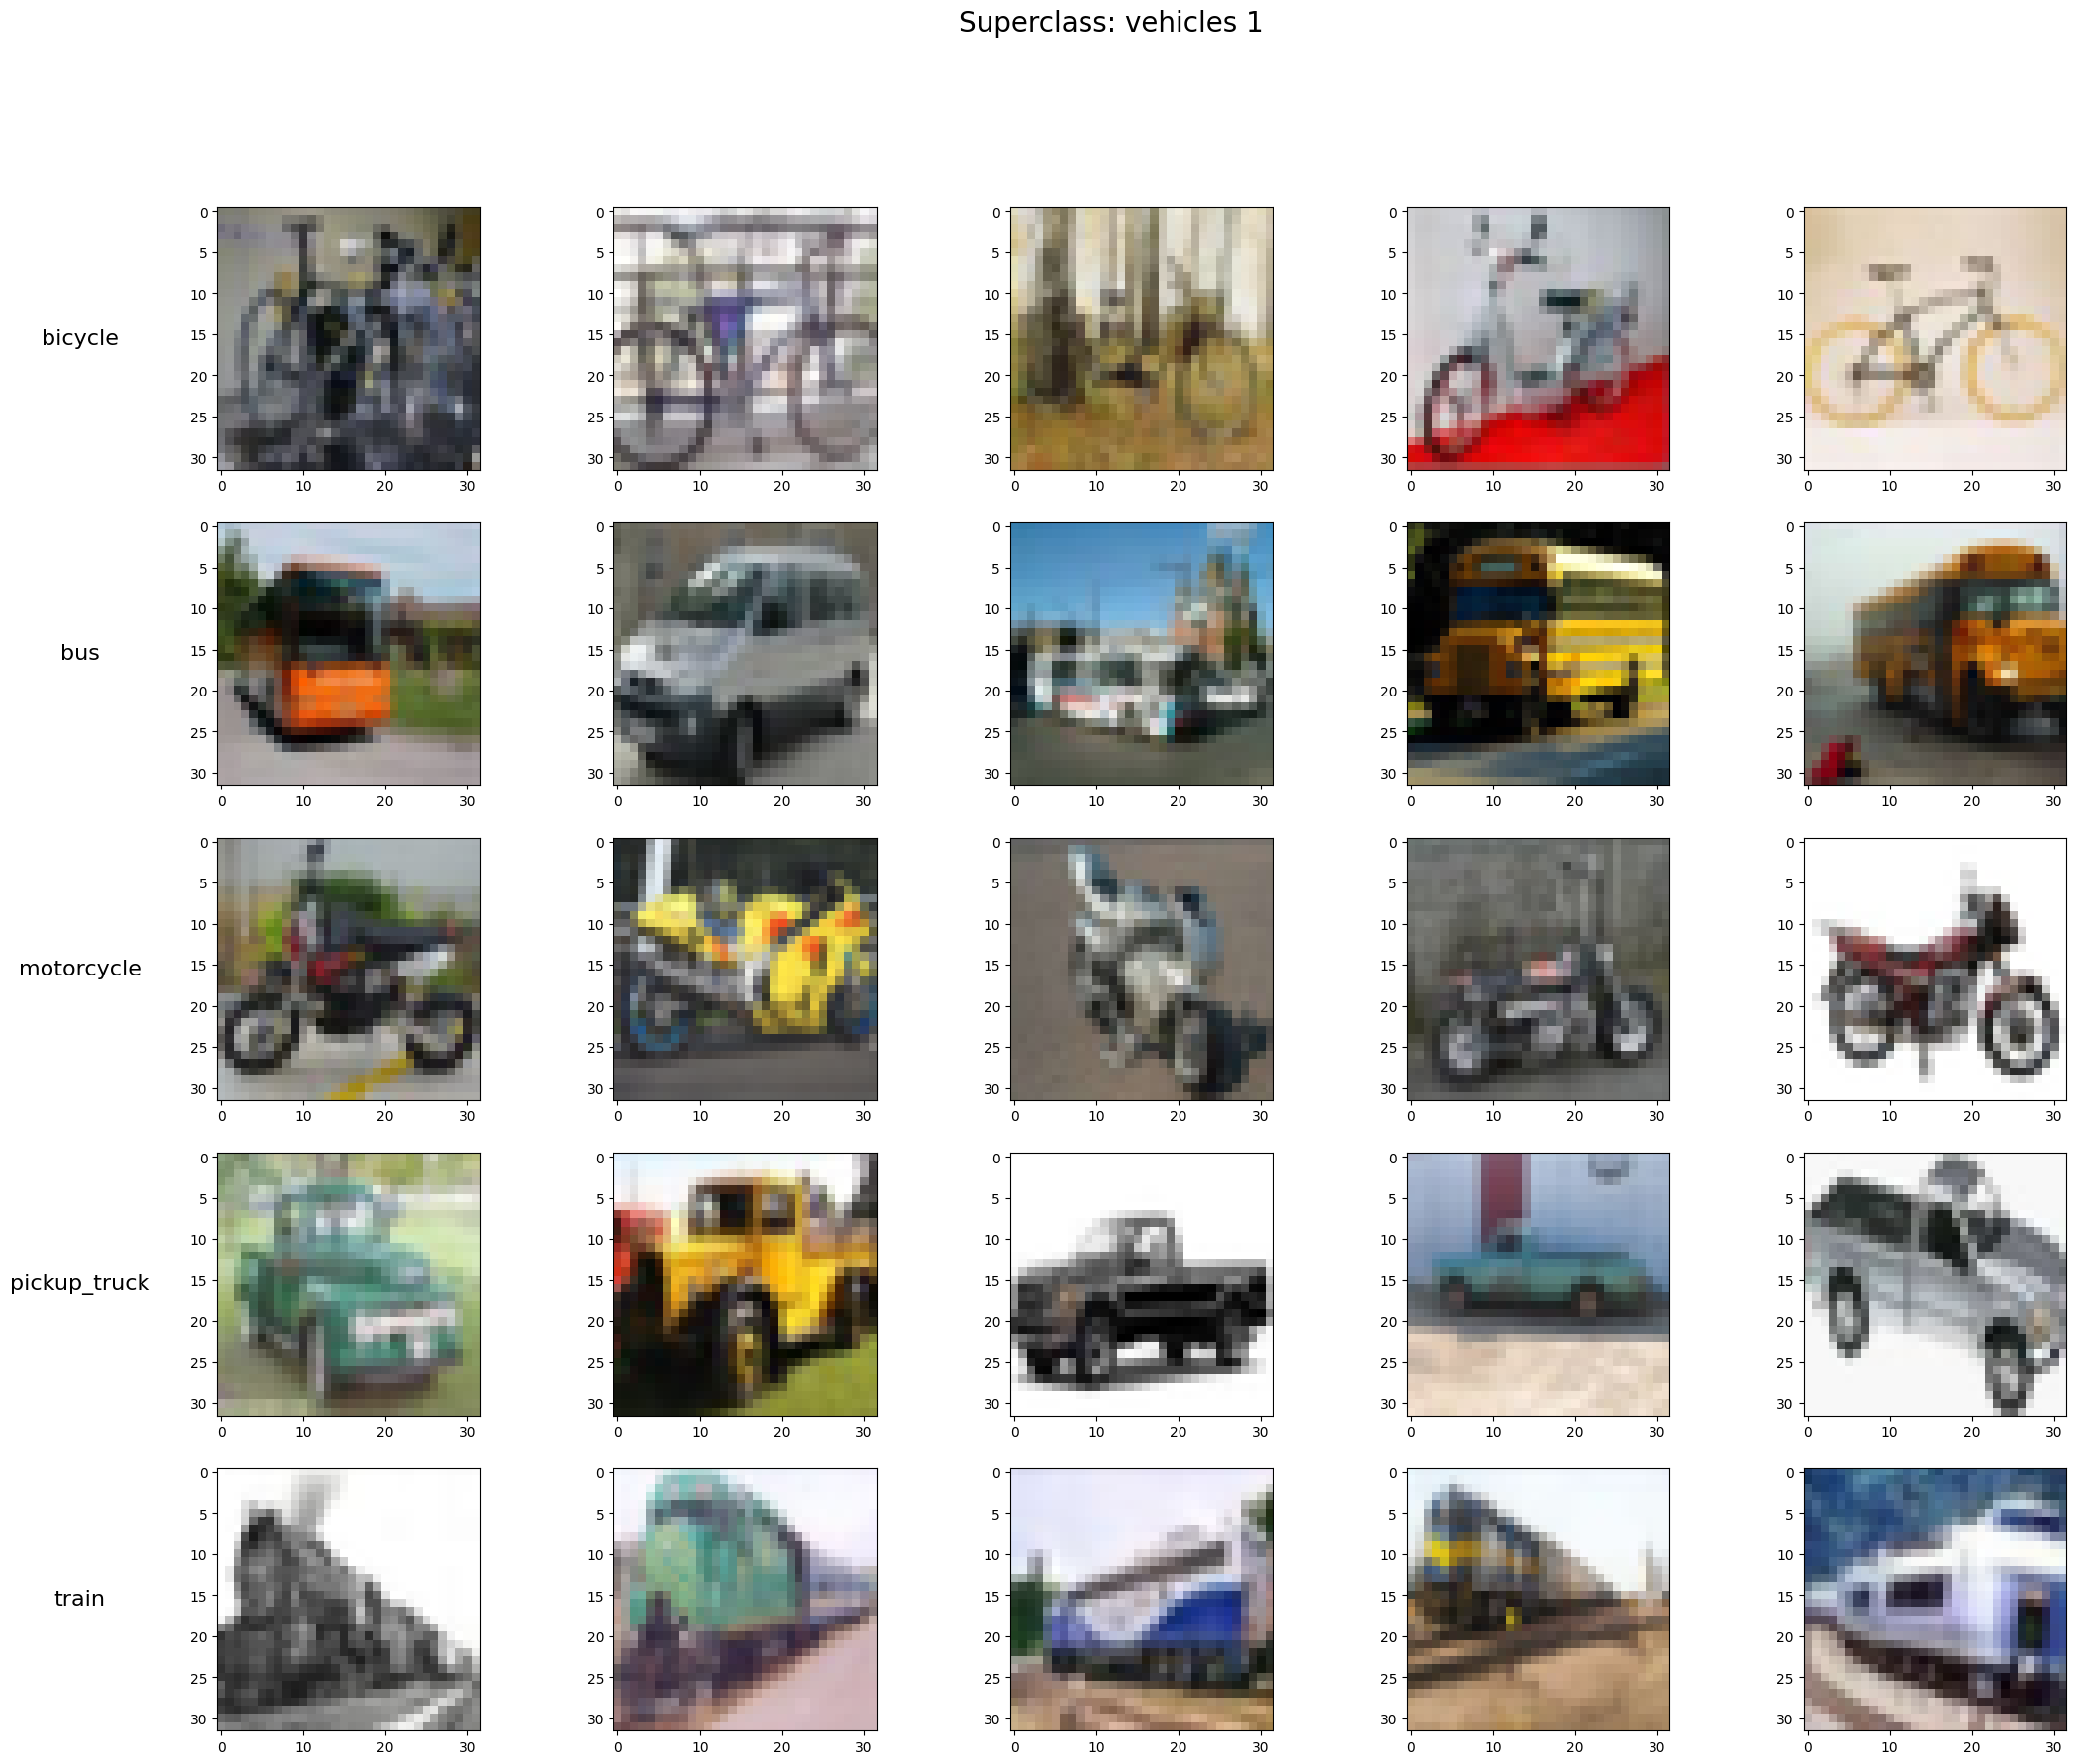

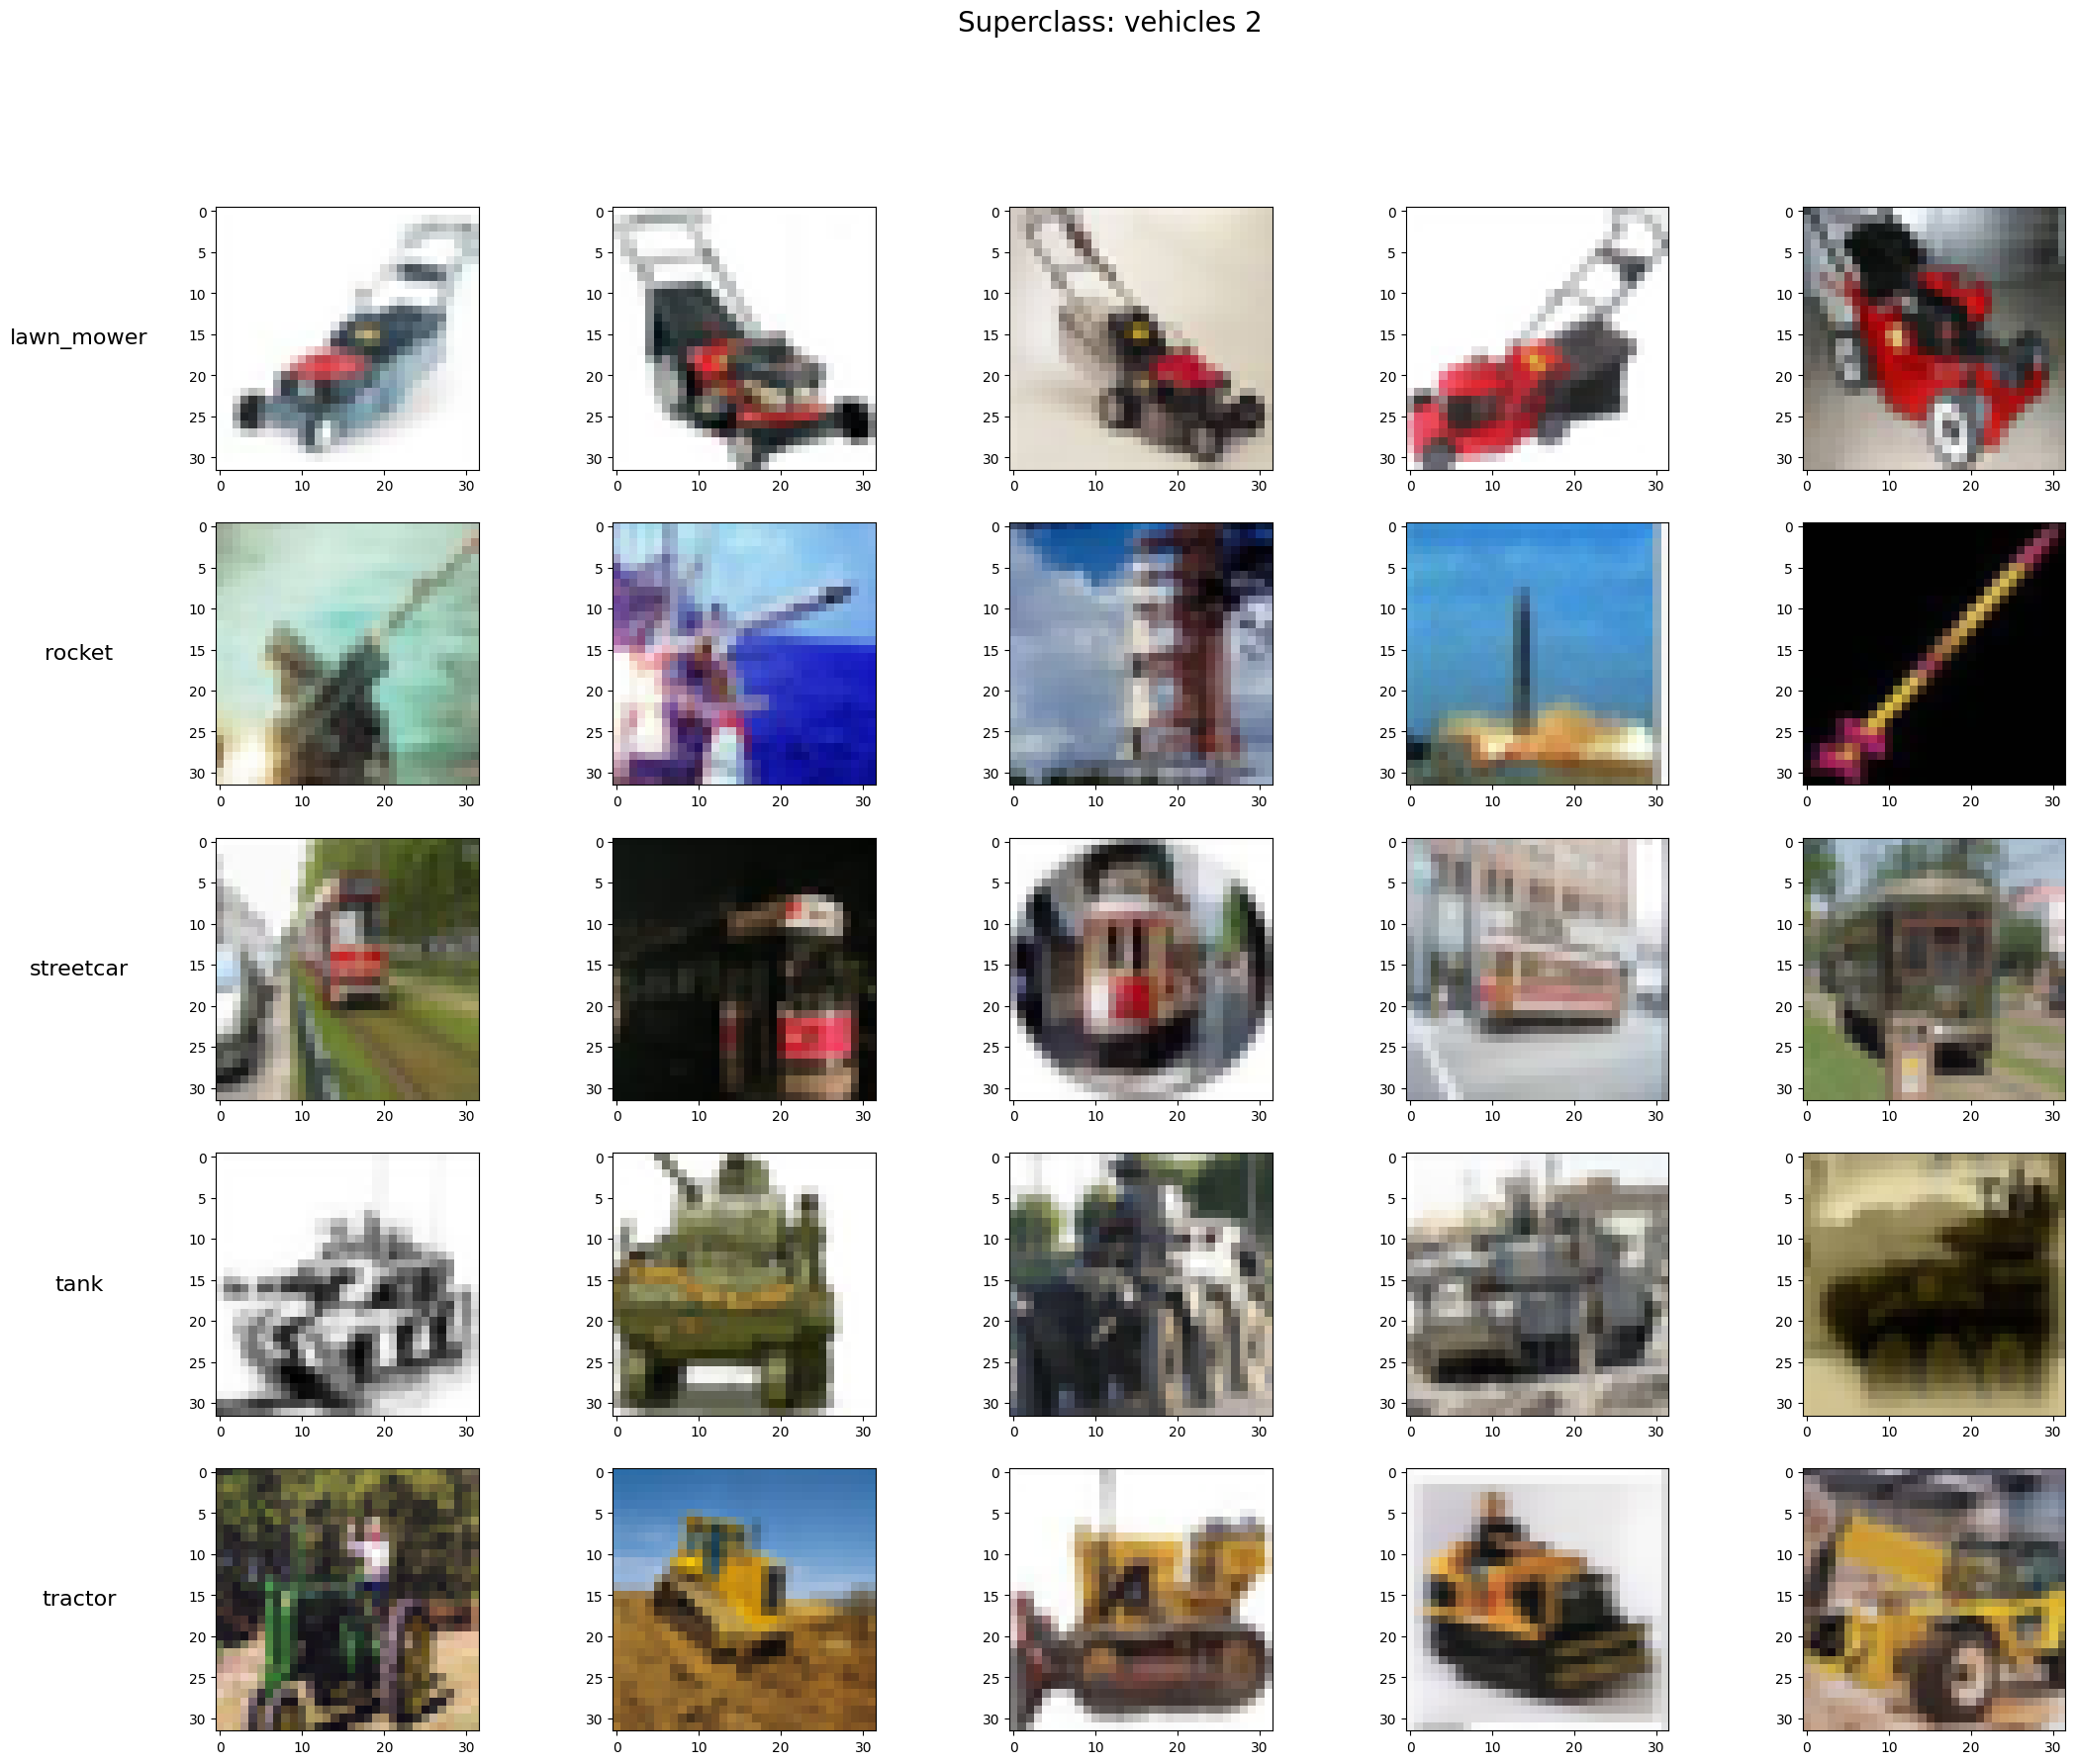

In [5]:
# YOUR CODE HERE
data = torch.tensor(train_set.data)
labels = torch.tensor(train_set.targets)

num_classes_per_superclass = len(superclasses['trees'])
num_samples = num_classes_per_superclass

for superclass in tqdm(superclasses.keys()):
    fig, axs = plt.subplots(num_classes_per_superclass, num_samples, figsize=(25, 20))
    fig.suptitle(f'Superclass: {superclass}', fontsize=20)
    for num_class, index in enumerate(superclass_to_indices[superclass]):
        subset = data[labels == index]
        random_indices = torch.randperm(subset.size(0))
        # Set the class name as the label for the first column
        class_name = classes[index]  # Assuming `classes` contains class names corresponding to indices
        axs[num_class, 0].set_ylabel(class_name, fontsize=16, rotation=0, labelpad=80, va='center')
        for num_sample, sample_index in enumerate(random_indices[ : num_samples]):
            axs[num_class, num_sample].imshow(subset[sample_index])
        

<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, you will implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. In the `__init__` method, define the first fully connected layer that maps the input size to the hidden size, and the second fully connected layer that maps the hidden size to the number of classes.

Ensure to call the parent class constructor using `super(TwoLayerNet, self).__init__()`. In the `forward` method, flatten the input tensor, pass it through the first layer with ReLU activation, and then through the second layer to obtain the final scores.

**Note:** You are allowed to modify the provided function definitions as needed.

In [10]:
class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes, extra_layers=False):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        # YOUR CODE HERE
        super().__init__()

        if extra_layers is False:
            layers = [nn.Linear(input_size, hidden_size), nn.ReLU(), nn.Linear(hidden_size, num_classes)]

        # MLP with 2 additional linear layers & a batch norm layer
        else:
            layers = [nn.Linear(input_size, hidden_size), nn.ReLU(), nn.Linear(hidden_size, hidden_size), nn.ReLU(), nn.Linear(hidden_size, hidden_size), nn.ReLU(), nn.BatchNorm1d(hidden_size), nn.ReLU(), nn.Linear(hidden_size, num_classes)]

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        # YOUR CODE HERE
        # flatten input
        x = x.flatten(start_dim=1)
        return self.model(x)


<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, you will implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. Since you need to feed color images into this network, determine the kernel size of the first convolutional layer. Additionally, calculate the number of trainable parameters in the "F6" layer, providing the calculation process.

In [27]:
class ConvNet(nn.Module):

    def __init__(self, non_linear=None, extra_layers=False):
        '''
        Initializes the convolutional neural network model.
        Follows the architecture of LeNet-5.

        Args:
            None
        '''

        # YOUR CODE HERE
        super().__init__()

        # original activation functions from LeNet-5 paper
        if non_linear is None:
            non_linear1 = nn.Tanh()
            non_linear2 = nn.Sigmoid()

        # replace all activation functions with ReLU
        elif non_linear == "relu":
            non_linear1 = nn.ReLU()
            non_linear2 = nn.ReLU()
        else:
            raise ValueError("Invalid non-linear function. Please choose 'relu' or None.")

        layers = []

        if extra_layers is False:
          # original architecture from LeNet-5

          # Layer C1 is a convolutional layer with six feature maps.
          # Each unit in each feature map is connected to a 5X5 neighborhood in the input.
          # output: 6 feature maps of size 28X28
          layers.append(nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5))
          # each layer is passed through a squashing function (hyperbolic tangent)
          layers.append(non_linear1)

          # Layer S2 is a subsampling layer with six feature maps of size 14X14.
          # Each unit in each feature map is connected to a 2X2 neighborhood in the corresponding feature map in C1.
          # output: 6 feature maps of size 14X14
          layers.append(nn.AvgPool2d(kernel_size=2, stride=2))

          # The result is passed through a sigmoidal function.
          layers.append(non_linear2)

          # Layer C3 is a convolutional layer with 16 feature maps.
          # Each unit in each feature map is connected to several 5X5
          # neighborhoods at identical locations in a subset of S2’s feature maps
          # output: 16 feature maps of size 10X10
          layers.append(nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5))
          layers.append(non_linear1)

          # Layer S4 is a subsampling layer with 16 feature maps of size 5X5.
          # Each unit in each feature map is connected to a 2X2 neighborhood
          # in the corresponding feature map in C3
          layers.append(nn.AvgPool2d(kernel_size=2, stride=2))

          # Layer C5 is a convolutional layer with 120 feature maps.
          # Each unit is connected to a 5x5 neighborhood on all 16
          # of S4’s feature maps.
          layers.append(nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5))
          layers.append(non_linear1)

          # Flatten the output of C5 (linear layer expects a 2D input of size (batch_size, num_features))
          layers.append(nn.Flatten())

          # Layer F6 contains 128 units and is fully connected to C5
          # Layer F6 has 10 164 trainable parameters
          # Total Parameters = input features ×output features + bias (of size output features)
          # 120 * 84 + 84 = 10164
          layers.append(nn.Linear(in_features=120, out_features=84))
          layers.append(non_linear1)

          layers.append(nn.Linear(in_features=84, out_features=100))

        else:
          # additional batch norm, max pool, and dropouts applied (not counted as extra layers)
          # convolutional channel sizes adjusted
          layers.append(nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5))
          layers.append(nn.BatchNorm2d(64))
          layers.append(nn.ReLU())
          layers.append(nn.MaxPool2d(kernel_size=2))

          layers.append(nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3))
          layers.append(nn.BatchNorm2d(96))
          layers.append(nn.ReLU())
          layers.append(nn.MaxPool2d(kernel_size=2))

          layers.append(nn.Conv2d(in_channels=96, out_channels=128, kernel_size=3))
          layers.append(nn.BatchNorm2d(128))
          layers.append(nn.ReLU())

          # 1st addtional layer - convolutional layer
          layers.append(nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3))
          layers.append(nn.BatchNorm2d(128))
          layers.append(nn.ReLU())

          layers.append(nn.Flatten(start_dim=1))

          # 2nd addtional layer - linear, in_features reshaped to match flatten
          layers.append(nn.Linear(in_features=512, out_features=256))
          layers.append(nn.ReLU())

          layers.append(nn.Dropout(p=0.5))

          layers.append(nn.Linear(in_features=256, out_features=128))
          layers.append(nn.ReLU())

          layers.append(nn.Linear(in_features=128, out_features=100))

        self.model = nn.Sequential(*layers)


    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        # YOUR CODE HERE
        out = self.model(x)
        return out


<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, you will create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, you often need to prepare datasets manually. Here, you will implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. You will also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [12]:
class CIFAR100_loader(Dataset):

    def __init__(self, root, train=True, transform=None, download=False):
        '''
        Initializes the CIFAR-100 dataset loader.

        Args:
            root (str): The root directory to store the dataset.
            train (bool): If True, loads the training data; otherwise, loads the test data.
            transform (callable, optional): The data transformations to apply.
            download (bool): If True, downloads the dataset if it is not already available.
        '''

        # YOUR CODE HERE
        self.data = torchvision.datasets.CIFAR100(root=root, train=train, download=download, transform=transform)

    def __len__(self):
        '''
        Returns the number of samples in the dataset.

        Returns:
            int: The number of samples in the dataset.
        '''

        # YOUR CODE HERE
        return len(self.data)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the image and label tensors.
        '''

        # YOUR CODE HERE
        return self.data[idx]

In [13]:
def create_transforms(additional_transform=False):
    '''
    Creates the data transformations for the CIFAR-100 dataset.
    Args:
        additional_transform (bool): If True, apply additional transformations.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''

    if additional_transform is False:
        transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])

    # additional transformations for hyperparameter tuning
    elif additional_transform is True:
        transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
    else:
        raise ValueError("Invalid transformation type. Please choose 'original' or 'augmented'.")

    return transform



In [14]:
def create_optimizer(model, learning_rate=0.001, weight_decay=1.0, optimizer='adam'):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.
        weight_decay (float): The L2 regularization strength.
        optimizer (str): The optimizer to use.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    '''

    # YOUR CODE HERE
    # Adam optimiser with L2 regularisation
    if optimizer == "adam":
        opt = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay, betas=(0.9, 0.999))

    # additional optimizers for hyperparameter tuning
    elif optimizer == "sgd":
        opt = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4, nesterov=True)
    elif optimizer == "rmsprop":
        opt = torch.optim.RMSprop(model.parameters(), lr=1e-3, alpha=0.99, eps=1e-8, weight_decay=1e-5)
    else:
        raise ValueError("Invalid optimizer. Please choose 'adam', 'sgd', or 'rmsprop'")

    return opt

<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, you will complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. You will use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [15]:
def validate(net, testloader):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        test_results (dict): Dictionary with the accuracy, precision, recall, and f1 scores for the model.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net = net.to(device)

    correct, total = 0, 0
    y_true, y_pred = [], []
    test_results = {}

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:

            # move data to device
            inputs, labels = inputs.to(device), labels.to(device)

            # pass inputs to model
            outputs = net(inputs)

            # get predicted class
            _, predicted = torch.max(outputs, 1)

            # sum correct predictions & total predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            y_true += labels.tolist()
            y_pred += predicted.tolist()

    # calculate metrics
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred, average='weighted', zero_division=0.0)
    recall = metrics.recall_score(y_true, y_pred, average='weighted')
    f1 = metrics.f1_score(y_true, y_pred, average='weighted')

    test_results['accuracy'] = accuracy
    test_results['precision'] = precision
    test_results['recall'] = recall
    test_results['f1'] = f1

    return test_results

In [16]:
def validate_per_class(net, testloader, classes):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        class_accuracy (dictionary): The accuracy per class for the model.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net = net.to(device)

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]

    class_accuracy = {}

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in tqdm(testloader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        class_accuracy[class_name] = accuracy

    return class_accuracy

In [31]:
def train(net, train_loader, test_loader, criterion, optimizer, epochs=100):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        test_loader (torch.utils.data.DataLoader): The data loader for the test dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        epochs (int): The number of epochs to train the model.

    Returns:
        epoch_performances (list): Performance of the model for each epoch. For plotting.
        epoch_losses (list): Loss for each epoch. For plotting.
    '''

    # YOUR CODE HERE
    # Set the model to train mode
    net.train()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net = net.to(device)

    epoch_performances = []
    epoch_performances_train = []
    epoch_losses = []

    for epoch in tqdm(range(epochs)):
        epoch_loss = 0.0
        # Iterate over the train dataset
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            inputs, labels = inputs.to(device), labels.to(device).long()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        epoch_loss /= len(train_loader) # average over the batch
        epoch_losses.append(epoch_loss)

        epoch_performances.append(validate(net, test_loader))
        epoch_performances_train.append(validate(net, train_loader))

        if type(train_loader)==list:
            random.shuffle(train_loader)

    return epoch_performances, epoch_losses


In [40]:
def plot_epoch_performances(epoch_performances, model_name, metric="accuracy"):
    '''
    Plots the performance of the model for each epoch.

    Args:
        epoch_performances (list): List of dictionaries of the performance of the model for each epoch (accuracy, precision, recall, f1).
        metric (str): The metric to plot.
    '''
    print("metric: ", metric)
    # list of values from 0 to number of epochs
    epoch = [i for i in range(len(epoch_performances))]
    print("epoch length: ", len(epoch_performances))

    if metric == "loss":
      print("hello world")
      y = epoch_performances

    else:
      # get list of metric values for each epoch from ditionary
      y = [epoch_performances[i][metric] for i in range(len(epoch_performances))]

    plt.title(f"Test {metric} over training epochs for model {model_name}")
    plt.xlabel("Epoch")
    plt.ylabel(f"{metric}")
    plt.plot(epoch, y)
    plt.show()

First, initialize the datasets and data loaders for both models.

In [19]:
# YOUR CODE HERE

def create_dataloaders(additional_transform=True, batch_size=512, use_cache=False):
    '''
    Create the data loaders for the CIFAR 100 dataset

    Args:
      additional_transform (bool): whether to use additional transformations
      batch_size (int): the batch size for the data loaders
      use_cache (bool): whether to use the cache for speeding up process

    Returns:
        train_data_loader (torch.utils.data.DataLoader): Data loader for the training dataset
        test_data_loader (torch.utils.data.DataLoader): Data loader for the test dataset
    '''


    # Define the transformations
    transform = create_transforms(additional_transform=additional_transform)

    # Load the CIFAR-100 training set
    train_set = CIFAR100_loader(root='./data', train=True, download=True, transform=transform)

    # Load the CIFAR-100 test set
    test_set = CIFAR100_loader(root='./data', train=False, download=True, transform=transform)

    # Create data loaders for the entire CIFAR-100 dataset
    train_data_loader = DataLoader(train_set, shuffle=True, batch_size=batch_size, num_workers = 2, pin_memory=True, persistent_workers=True)
    test_data_loader = DataLoader(test_set, shuffle=False, batch_size=batch_size, num_workers = 2, pin_memory=True, persistent_workers=True)

    # for speeding up the data loading
    if use_cache:
      cache_train = []
      print ("warming up train loader")
      for idx, data in enumerate(tqdm(train_data_loader)):
          cache_train.append(data)

      cache_test = []
      print ("warming up test loader")
      for idx, data in enumerate(tqdm(test_data_loader)):
          cache_test.append(data)
      return cache_train, cache_test

    else:
      return train_data_loader, test_data_loader



Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

In [48]:
train_data_loader, test_data_loader = create_dataloaders(use_cache=True)

Files already downloaded and verified
Files already downloaded and verified
warming up train loader


100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


warming up test loader


100%|██████████| 20/20 [00:05<00:00,  3.69it/s]


100%|██████████| 100/100 [00:48<00:00,  2.07it/s]


metric:  accuracy
epoch length:  100


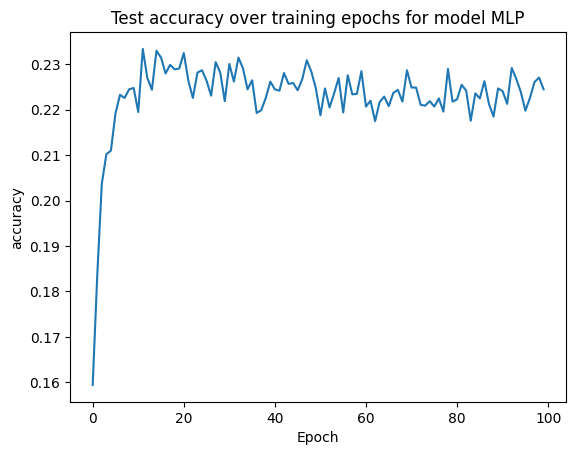

metric:  loss
epoch length:  100
hello world


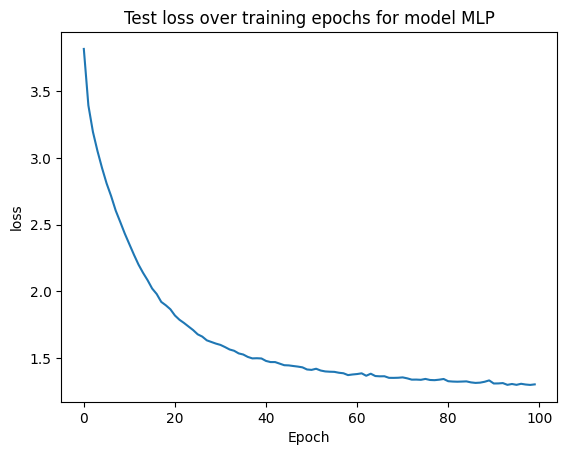

MLP test accuracy:  {'accuracy': 0.2245, 'precision': 0.23900581662184, 'recall': 0.2245, 'f1': 0.2187122068195541}


100%|██████████| 20/20 [00:00<00:00, 28.03it/s]

Test Accuracy MLP per class:  {'apple': 63.0, 'aquarium_fish': 33.0, 'baby': 19.0, 'bear': 5.0, 'beaver': 11.0, 'bed': 21.0, 'bee': 11.0, 'beetle': 23.0, 'bicycle': 15.0, 'bottle': 28.0, 'bowl': 5.0, 'boy': 10.0, 'bridge': 25.0, 'bus': 9.0, 'butterfly': 20.0, 'camel': 8.0, 'can': 22.0, 'castle': 43.0, 'caterpillar': 34.0, 'cattle': 18.0, 'chair': 56.0, 'chimpanzee': 27.0, 'clock': 16.0, 'cloud': 47.0, 'cockroach': 54.0, 'couch': 19.0, 'crab': 12.0, 'crocodile': 14.0, 'cup': 36.0, 'dinosaur': 10.0, 'dolphin': 47.0, 'elephant': 12.0, 'flatfish': 16.0, 'forest': 30.0, 'fox': 13.0, 'girl': 18.0, 'hamster': 25.0, 'house': 12.0, 'kangaroo': 10.0, 'keyboard': 10.0, 'lamp': 30.0, 'lawn_mower': 41.0, 'leopard': 18.0, 'lion': 18.0, 'lizard': 4.0, 'lobster': 11.0, 'man': 29.0, 'maple_tree': 23.0, 'motorcycle': 27.0, 'mountain': 28.0, 'mouse': 4.0, 'mushroom': 14.0, 'oak_tree': 55.0, 'orange': 29.0, 'orchid': 22.0, 'otter': 2.0, 'palm_tree': 32.0, 'pear': 17.0, 'pickup_truck': 17.0, 'pine_tree': 1

In [49]:
# YOUR CODE HERE
epochs = 100
learning_rate=0.001

mlp = TwoLayerNet(32 * 32 * 3, 1024, 100)
criterion = nn.CrossEntropyLoss()
optimizer_mlp = create_optimizer(mlp, learning_rate)

mlp_epoch_performances, mlp_epoch_losses = train(mlp, train_data_loader, test_data_loader, criterion, optimizer_mlp, epochs)
plot_epoch_performances(mlp_epoch_performances, model_name="MLP")
plot_epoch_performances(mlp_epoch_losses, model_name="MLP", metric="loss")

test_mlp = validate(mlp, test_data_loader)
print("MLP test accuracy: ", test_mlp)

test_mlp_per_class = validate_per_class(mlp, test_data_loader, classes)
print("Test Accuracy MLP per class: ", test_mlp_per_class)

Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

100%|██████████| 100/100 [01:01<00:00,  1.63it/s]

metric:  accuracy
epoch length:  100


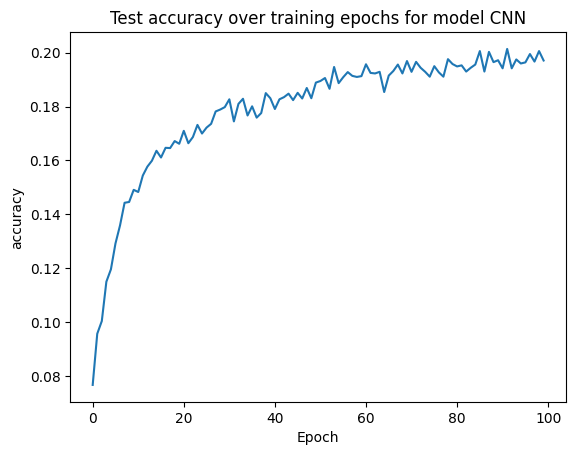

metric:  loss
epoch length:  100
hello world


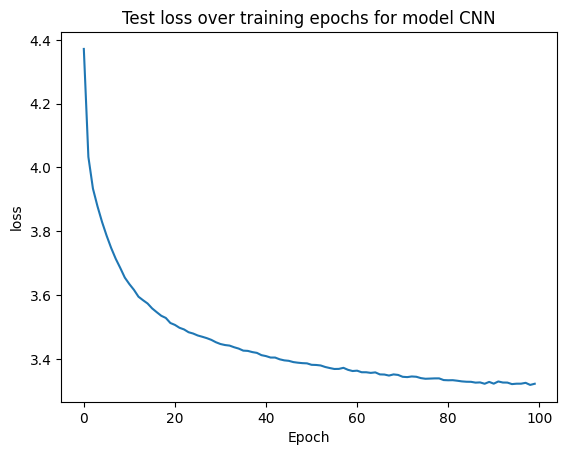

100%|██████████| 20/20 [00:00<00:00, 26.79it/s]

CNN test accuracy:  {'accuracy': 0.1971, 'precision': 0.18309866275381637, 'recall': 0.1971, 'f1': 0.17416917072429983}
Test Accuracy CNN per class:  {'apple': 30.0, 'aquarium_fish': 33.0, 'baby': 20.0, 'bear': 6.0, 'beaver': 5.0, 'bed': 22.0, 'bee': 16.0, 'beetle': 26.0, 'bicycle': 10.0, 'bottle': 24.0, 'bowl': 0.0, 'boy': 3.0, 'bridge': 7.0, 'bus': 11.0, 'butterfly': 12.0, 'camel': 15.0, 'can': 6.0, 'castle': 43.0, 'caterpillar': 33.0, 'cattle': 15.0, 'chair': 31.0, 'chimpanzee': 43.0, 'clock': 4.0, 'cloud': 32.0, 'cockroach': 62.0, 'couch': 1.0, 'crab': 3.0, 'crocodile': 6.0, 'cup': 22.0, 'dinosaur': 8.0, 'dolphin': 37.0, 'elephant': 13.0, 'flatfish': 6.0, 'forest': 21.0, 'fox': 11.0, 'girl': 11.0, 'hamster': 34.0, 'house': 5.0, 'kangaroo': 28.0, 'keyboard': 13.0, 'lamp': 3.0, 'lawn_mower': 51.0, 'leopard': 13.0, 'lion': 36.0, 'lizard': 3.0, 'lobster': 9.0, 'man': 9.0, 'maple_tree': 24.0, 'motorcycle': 14.0, 'mountain': 14.0, 'mouse': 0.0, 'mushroom': 15.0, 'oak_tree': 68.0, 'orange

In [50]:
# YOUR CODE HERE
epochs = 100
learning_rate=0.001

conv_net = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer_cnn = create_optimizer(conv_net, learning_rate)

cnn_epoch_performances, cnn_epoch_losses = train(conv_net, train_data_loader, test_data_loader, criterion, optimizer_cnn, epochs)
plot_epoch_performances(cnn_epoch_performances, model_name="CNN")
plot_epoch_performances(cnn_epoch_losses, model_name="CNN", metric="loss")

test_accuracy_cnn = validate(conv_net, test_data_loader)
test_accuracy_cnn_per_class = validate_per_class(conv_net, test_data_loader, classes)

print("CNN test accuracy: ", test_accuracy_cnn)
print("Test Accuracy CNN per class: ", test_accuracy_cnn_per_class)

<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, you will experiment with both the `ConvNet` and `TwoLayerNet` models by setting up and tuning the hyperparameters to achieve the highest possible accuracy. You have the flexibility to modify the training process, including the `train` function, `DataLoader`, `transform` functions, and optimizer as needed.

1. Adjust the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function to improve the performance of both networks. Modify the training procedure and architecture as necessary. You can also add components like Batch Normalization layers.
2. Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.
3. Show the final results and describe the modifications made to enhance performance. Discuss the impact of hyperparameter tuning on both `TwoLayerNet` and `ConvNet`.
4. Compare the two networks in terms of architecture, performance, and learning rates. Provide a detailed explanation of the differences observed.

**Note:** Do not use external pre-trained networks and limit additional convolutional layers to a maximum of three beyond the original architecture.

Test the performance of TwoLayerNet after hyperparameter tuning and compare it with the ConvNet model. Provide a detailed explanation of the results.

In [20]:
def sweep(train_data_loader, test_data_loader, learning_rate=0.001, batch_size=512, epochs=100, optimizer='adam', weight_decay=1.0, nonlinear_fn=None, transformations=False, model='cnn', chkpt=None, extra_layers=False):
    '''
    Sweeps hyperparameters for hyperparameter tuning

    Args:
        train_data_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        test_data_loader (torch.utils.data.DataLoader): The data loader for the test dataset.
        learning_rate (float): The learning rate to test.
        batch_size (int): The batch size to test.
        epochs (int): The number of epochs to test.
        optimizer (str): The optimizer to test.
        weight_decay (float): The weight decay to test.
        nonlinear_fn (str): The non-linear function to test for the CNN model.
        transformations (bool): The data transformations to test.
        model (str): The model (CNN or MLP).
        chkpt (torch.nn.Module): Checkpoint of the model if it already exists for fast loading.
        extra_layers (bool): For testing architecture of the model with additional layers.

    Returns:
        results (dict): A dict of 2 dictionaries containing the test metrics and accuracy per class
        model (torch.nn.Module): The model to save.
    '''

    # original hyperparameters
    # lr = 0.001, batch_size = 512, epochs = 100, optimizer = AdamW, weight_decay = 1, nonlinear_fn = sigmoid/tanh, layers = original, transformations = original

    # if the model checkpoint doesn't exist instantiate the network & train as usual
    if chkpt is None:
        if model == "mlp":
            net = TwoLayerNet(input_size=32 * 32 * 3, hidden_size=1024, num_classes=100, extra_layers=extra_layers)
        elif model == "cnn":
            net = ConvNet(non_linear=nonlinear_fn, extra_layers=extra_layers)
        else:
            raise ValueError("Invalid model. Please choose 'mlp' or 'cnn'")

        criterion = nn.CrossEntropyLoss()
        opt = create_optimizer(net, learning_rate=learning_rate, weight_decay=weight_decay, optimizer=optimizer)
        train(net=net, train_loader=train_data_loader, test_loader=test_data_loader, criterion=criterion, optimizer=opt, epochs=epochs)

    # if model checkpoint exists, use checkpoing
    elif chkpt is not None:
        net = chkpt

    else:
        raise ValueError("Invalid checkpoint. Please provide a valid checkpoint.")

    # validate test accuracy for the model & per class
    test_accuracy = validate(net, test_data_loader)
    test_accuracy_per_class = validate_per_class(net, test_data_loader, classes)

    results = {"metrics": test_accuracy, "class accuracies": test_accuracy_per_class}

    return results, net

    # YOUR CODE HERE

In [21]:
def read_sweep_results(results_file):

    """
    Read the sweep results from the JSON file in case of a crash or for easy loading.

    Args:
        results_file (str): Path to the JSON file containing the results.

    Returns:
        dict: A dictionary containing the hyperparameter sweep results.

    """

    if os.path.exists(results_file):
        with open(results_file, "r") as f:
            return json.load(f)
    return {}

In [22]:
def run_sweep(train_data_loader, test_data_loader, hyperparameter_name, hyperparameter_values, sweep_results, m, save_path="model_chkpts", results_file="sweep_results.json"):
    """
    Run sweeps for different hyperparameters, save model checkpoints, and write results to disk.

    Args:
        train_data_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        test_data_loader (torch.utils.data.DataLoader): The data loader for the test dataset.
        hyperparameter_name (str): Name of the hyperparameter to be tested (e.g. 'learning_rate', 'batch_size').
        hyperparameter_values (list): A list of test values for the hyperparameter.
        sweep_results (dict): Global dictionary for storing sweep results.
        m (str): Model name ('mlp' or 'cnn').
        save_path (str): Directory path where model checkpoints will be saved.
        results_file (str): Path to the JSON file where sweep results will be saved.

    Returns:
        None
    """

    # make sure the save path directory actually exists
    os.makedirs(save_path, exist_ok=True)

    if hyperparameter_name != "extra_layers":
        extra_layer = False
    elif hyperparameter_name == "extra_layers":
        extra_layer = hyperparameter_values[0]

    for value in hyperparameter_values:
        print("Running sweep for: ", hyperparameter_name, value)

        # Define the model filename based on hyperparameter value
        model_filename = f"{m}_model_{hyperparameter_name}_{value}.pt"
        model_filepath = os.path.join(save_path, model_filename)

        # Check if the model checkpoint already exists
        if os.path.exists(model_filepath):
            print(f"Loading existing model from: {model_filepath}")

            # instantiate a network
            if m == "cnn":
                model = ConvNet(extra_layers=extra_layer)
            elif m == "mlp":
                model = TwoLayerNet(32 * 32 * 3, 1024, 100, extra_layers=extra_layer)
            else:
                raise ValueError("Invalid model. Please choose 'mlp' or 'cnn'")

            # load the checkpoint weights onto the model
            model.load_state_dict(torch.load(model_filepath, weights_only=True))

            # pass hyperparameter testing values to the sweep function
            kwargs = {'train_data_loader': train_data_loader, 'test_data_loader': test_data_loader, hyperparameter_name: value, 'model': m, 'chkpt': model}
            results, model = sweep(**kwargs)

            if hyperparameter_name not in sweep_results:
                sweep_results[hyperparameter_name] = {}

            sweep_results[hyperparameter_name][value] = results

            print("Results retrieved for: ", hyperparameter_name, value)

        else:
            # run the sweep for the current hyperparameter value
            # ex. sweep(learning_rate=0.01)
            kwargs = {'train_data_loader': train_data_loader, 'test_data_loader': test_data_loader, hyperparameter_name: value, 'model': m}
            results, model = sweep(**kwargs)

            # store the results for the current hyperparameter value
            if hyperparameter_name not in sweep_results:
                sweep_results[hyperparameter_name] = {}
            sweep_results[hyperparameter_name][value] = results

            # save the model checkpoint in case of a crash
            torch.save(model.state_dict(), model_filepath)

            # save the sweep results to a JSON file in case of a crash
            with open(f"{m}_{results_file}", "w") as f:
                json.dump(sweep_results, f)

            print("Results saved for: ", hyperparameter_name, value)

Test the performance of ConvNet after hyperparameter tuning and compare it with the TwoLayerNet model. Provide a detailed explanation of the results.

In [ ]:
cnn_sweep_results = {'original': {}, 'learning_rate': {}, 'batch_size': {}, 'epochs': {}, 'optimizer': {}, 'weight_decay': {}, 'nonlinear_fn': {}, 'layers': {}, 'transformations': {}}
mlp_sweep_results = {'original': {}, 'learning_rate': {}, 'batch_size': {}, 'epochs': {}, 'optimizer': {}, 'weight_decay': {}, 'nonlinear_fn': {}, 'layers': {}, 'transformations': {}}

In [ ]:
# create train & test data loaders once
train_data_loader, test_data_loader = create_dataloaders(use_cache=True)

Files already downloaded and verified
Files already downloaded and verified
warming up train loader


100%|██████████| 98/98 [00:26<00:00,  3.67it/s]


warming up test loader


100%|██████████| 20/20 [00:05<00:00,  3.65it/s]


In [ ]:
# mlp baseline vals with original hyperparams
results, model = sweep(train_data_loader, test_data_loader)
os.makedirs("model_chkpts/", exist_ok=True)
torch.save(model.state_dict(), f"model_chkpts/mlp_model_original.pt")
mlp_sweep_results['original'] = results

with open("mlp_sweep_results.json", "w") as f:
    json.dump(mlp_sweep_results, f)

100%|██████████| 20/20 [00:00<00:00, 27.66it/s]


In [ ]:
# cnn baseline vals with original hyperparams
results, model = sweep(train_data_loader, test_data_loader)
torch.save(model.state_dict(), f"model_chkpts/cnn_model_original.pt")
cnn_sweep_results['original'] = results

with open("cnn_sweep_results.json", "w") as f:
    json.dump(cnn_sweep_results, f)


100%|██████████| 20/20 [00:00<00:00, 27.64it/s]


In [ ]:
# lists of hyperparameters for tuning
cnn_hyperparam_names = ["learning_rate", "batch_size", "epochs", "optimizer", "weight_decay", "nonlinear_fn", "transformations", "extra_layers"]
mlp_hyperparam_names = ["learning_rate", "batch_size", "epochs", "optimizer", "weight_decay", "transformations", "extra_layers"]

learning_rates = [0.0001, 0.01]
batch_sizes = [32, 64, 128, 256, 1024]
epochs = [10, 50, 200, 500]
optimizers = ['sgd', 'rmsprop']
weight_decays = [0.8, 0.6, 0.4, 0.2, 0.1, 0.01]
nonlinear_fns = ["relu"]
transformations = [True]
layers = [True]

cnn_hyperparams = [learning_rates, batch_sizes, epochs, optimizers, weight_decays, nonlinear_fns, transformations, layers]
mlp_hyperparams = [learning_rates, batch_sizes, epochs, optimizers, weight_decays, transformations, layers]

In [ ]:
# Tune MLP
m = "mlp"

# Run sweeps
for i in range(len(mlp_hyperparam_names)):
    run_sweep(train_data_loader, test_data_loader, mlp_hyperparam_names[i], mlp_hyperparams[i], mlp_sweep_results, m)

Running sweep for:  learning_rate 0.0001


100%|██████████| 20/20 [00:00<00:00, 27.81it/s]


Results saved for:  learning_rate 0.0001
Running sweep for:  learning_rate 0.01


100%|██████████| 20/20 [00:00<00:00, 27.89it/s]


Results saved for:  learning_rate 0.01
Running sweep for:  batch_size 32


100%|██████████| 20/20 [00:00<00:00, 28.08it/s]


Results saved for:  batch_size 32
Running sweep for:  batch_size 64


100%|██████████| 20/20 [00:00<00:00, 28.09it/s]


Results saved for:  batch_size 64
Running sweep for:  batch_size 128


100%|██████████| 20/20 [00:00<00:00, 27.78it/s]


Results saved for:  batch_size 128
Running sweep for:  batch_size 256


100%|██████████| 20/20 [00:00<00:00, 28.15it/s]


Results saved for:  batch_size 256
Running sweep for:  batch_size 1024


100%|██████████| 20/20 [00:00<00:00, 27.72it/s]


Results saved for:  batch_size 1024
Running sweep for:  epochs 10


100%|██████████| 20/20 [00:00<00:00, 28.01it/s]


Results saved for:  epochs 10
Running sweep for:  epochs 50


100%|██████████| 20/20 [00:00<00:00, 28.14it/s]


Results saved for:  epochs 50
Running sweep for:  epochs 200


100%|██████████| 20/20 [00:00<00:00, 28.16it/s]


Results saved for:  epochs 200
Running sweep for:  epochs 500


100%|██████████| 20/20 [00:00<00:00, 28.17it/s]


Results saved for:  epochs 500
Running sweep for:  optimizer sgd


100%|██████████| 20/20 [00:00<00:00, 28.16it/s]


Results saved for:  optimizer sgd
Running sweep for:  optimizer rmsprop


100%|██████████| 20/20 [00:00<00:00, 28.06it/s]


Results saved for:  optimizer rmsprop
Running sweep for:  weight_decay 0.8


100%|██████████| 20/20 [00:00<00:00, 25.84it/s]


Results saved for:  weight_decay 0.8
Running sweep for:  weight_decay 0.6


100%|██████████| 20/20 [00:00<00:00, 27.87it/s]


Results saved for:  weight_decay 0.6
Running sweep for:  weight_decay 0.4


100%|██████████| 20/20 [00:00<00:00, 27.94it/s]


Results saved for:  weight_decay 0.4
Running sweep for:  weight_decay 0.2


100%|██████████| 20/20 [00:00<00:00, 27.84it/s]


Results saved for:  weight_decay 0.2
Running sweep for:  weight_decay 0.1


100%|██████████| 20/20 [00:00<00:00, 27.81it/s]


Results saved for:  weight_decay 0.1
Running sweep for:  weight_decay 0.01


100%|██████████| 20/20 [00:00<00:00, 28.14it/s]


Results saved for:  weight_decay 0.01
Running sweep for:  transformations True


100%|██████████| 20/20 [00:00<00:00, 28.13it/s]


Results saved for:  transformations True
Running sweep for:  extra_layers True


100%|██████████| 20/20 [00:00<00:00, 27.77it/s]


Results saved for:  extra_layers True


In [ ]:
# Tune CNN
m = "cnn"

# Run sweeps
for i in range(len(cnn_hyperparam_names)):
    run_sweep(train_data_loader, test_data_loader, cnn_hyperparam_names[i], cnn_hyperparams[i], cnn_sweep_results, m)

Running sweep for:  learning_rate 0.0001


100%|██████████| 20/20 [00:00<00:00, 27.67it/s]


Results saved for:  learning_rate 0.0001
Running sweep for:  learning_rate 0.01


100%|██████████| 20/20 [00:00<00:00, 27.67it/s]


Results saved for:  learning_rate 0.01
Running sweep for:  batch_size 32


100%|██████████| 20/20 [00:00<00:00, 28.00it/s]


Results saved for:  batch_size 32
Running sweep for:  batch_size 64


100%|██████████| 20/20 [00:00<00:00, 27.78it/s]


Results saved for:  batch_size 64
Running sweep for:  batch_size 128


100%|██████████| 20/20 [00:00<00:00, 27.83it/s]


Results saved for:  batch_size 128
Running sweep for:  batch_size 256


100%|██████████| 20/20 [00:00<00:00, 27.35it/s]


Results saved for:  batch_size 256
Running sweep for:  batch_size 1024


100%|██████████| 20/20 [00:00<00:00, 28.02it/s]


Results saved for:  batch_size 1024
Running sweep for:  epochs 10


100%|██████████| 20/20 [00:00<00:00, 27.75it/s]


Results saved for:  epochs 10
Running sweep for:  epochs 50


100%|██████████| 20/20 [00:00<00:00, 27.93it/s]


Results saved for:  epochs 50
Running sweep for:  epochs 200


100%|██████████| 20/20 [00:00<00:00, 27.97it/s]


Results saved for:  epochs 200
Running sweep for:  epochs 500


100%|██████████| 20/20 [00:00<00:00, 27.76it/s]


Results saved for:  epochs 500
Running sweep for:  optimizer sgd


100%|██████████| 20/20 [00:00<00:00, 26.82it/s]


Results saved for:  optimizer sgd
Running sweep for:  optimizer rmsprop


100%|██████████| 20/20 [00:00<00:00, 28.25it/s]


Results saved for:  optimizer rmsprop
Running sweep for:  weight_decay 0.8


100%|██████████| 20/20 [00:00<00:00, 27.86it/s]


Results saved for:  weight_decay 0.8
Running sweep for:  weight_decay 0.6


100%|██████████| 20/20 [00:00<00:00, 27.85it/s]


Results saved for:  weight_decay 0.6
Running sweep for:  weight_decay 0.4


100%|██████████| 20/20 [00:00<00:00, 24.49it/s]


Results saved for:  weight_decay 0.4
Running sweep for:  weight_decay 0.2


100%|██████████| 20/20 [00:00<00:00, 24.47it/s]


Results saved for:  weight_decay 0.2
Running sweep for:  weight_decay 0.1


100%|██████████| 20/20 [00:00<00:00, 26.97it/s]


Results saved for:  weight_decay 0.1
Running sweep for:  weight_decay 0.01


100%|██████████| 20/20 [00:00<00:00, 23.12it/s]


Results saved for:  weight_decay 0.01
Running sweep for:  nonlinear_fn relu


100%|██████████| 20/20 [00:00<00:00, 27.72it/s]


Results saved for:  nonlinear_fn relu
Running sweep for:  transformations True


100%|██████████| 20/20 [00:00<00:00, 27.75it/s]


Results saved for:  transformations True
Running sweep for:  extra_layers True


100%|██████████| 20/20 [00:00<00:00, 27.59it/s]

Results saved for:  extra_layers True


In [ ]:
def json_to_dict(json_file):
    """
    Loads a JSON file to dictionary (to use in case of crash or sweep dictionary is lost from memory)

    Args:
        json_file (str): Path to the JSON file.

    Returns:
        dict: The contents of the JSON file as a dictionary.
    """
    with open(json_file, 'r') as f:
        data = json.load(f)

    return data

cnn_sweep_results = json_to_dict("cnn_sweep_results.json")
mlp_sweep_results = json_to_dict("mlp_sweep_results.json")
print(cnn_sweep_results)

{'original': {'metrics': {'accuracy': 0.2231, 'precision': 0.21143060161765553, 'recall': 0.2231, 'f1': 0.20387483912001553}, 'class accuracies': {'apple': 34.0, 'aquarium_fish': 34.0, 'baby': 12.0, 'bear': 6.0, 'beaver': 10.0, 'bed': 23.0, 'bee': 12.0, 'beetle': 24.0, 'bicycle': 17.0, 'bottle': 27.0, 'bowl': 0.0, 'boy': 12.0, 'bridge': 12.0, 'bus': 17.0, 'butterfly': 5.0, 'camel': 12.0, 'can': 18.0, 'castle': 42.0, 'caterpillar': 34.0, 'cattle': 16.0, 'chair': 48.0, 'chimpanzee': 50.0, 'clock': 12.0, 'cloud': 40.0, 'cockroach': 58.0, 'couch': 2.0, 'crab': 4.0, 'crocodile': 4.0, 'cup': 34.0, 'dinosaur': 12.0, 'dolphin': 37.0, 'elephant': 12.0, 'flatfish': 13.0, 'forest': 31.0, 'fox': 14.0, 'girl': 31.0, 'hamster': 37.0, 'house': 10.0, 'kangaroo': 23.0, 'keyboard': 6.0, 'lamp': 12.0, 'lawn_mower': 48.0, 'leopard': 26.0, 'lion': 44.0, 'lizard': 6.0, 'lobster': 4.0, 'man': 12.0, 'maple_tree': 28.0, 'motorcycle': 25.0, 'mountain': 23.0, 'mouse': 1.0, 'mushroom': 9.0, 'oak_tree': 69.0, 'ora

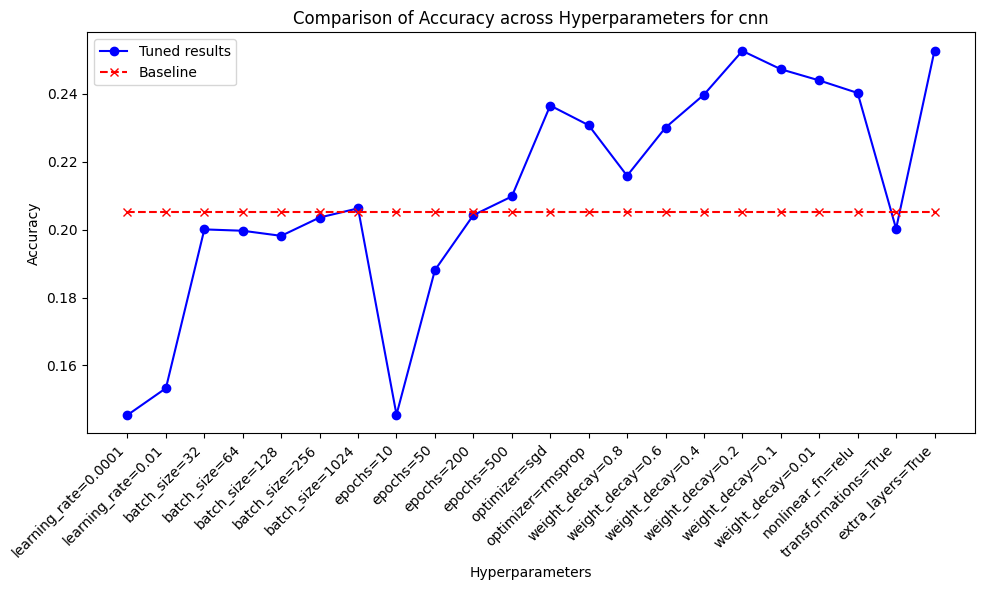

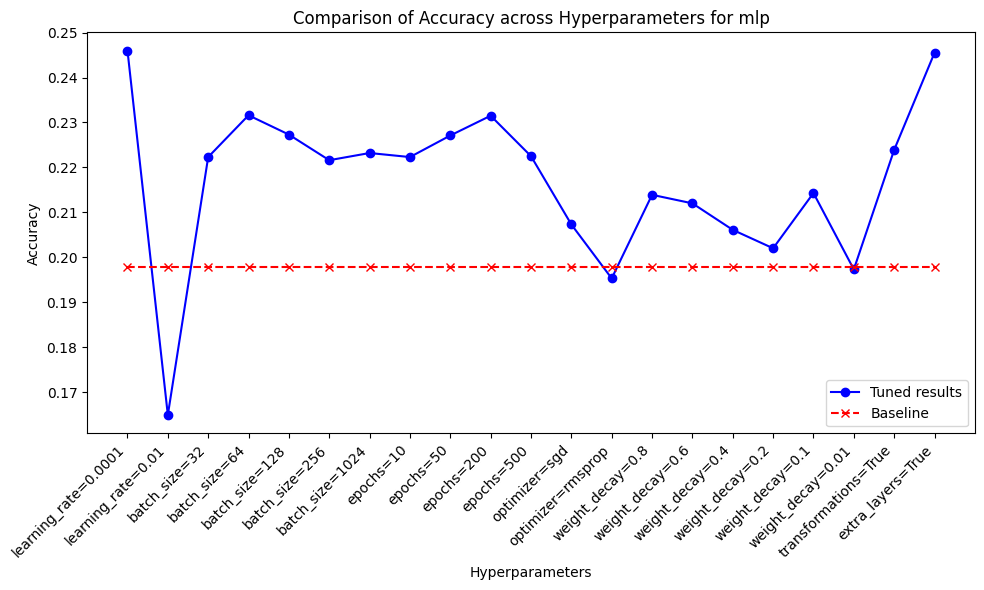

In [ ]:
# Analyze CNN tuning

def plot_hyperparameter_comparison(sweep_results, model, metric="accuracy"):
    """
    Plot the hyperparameter tuning vs baseline metrics

    Args:
        sweep_results (dict): Dictionary containing the sweep results.
        model (str): The model name (e.g., "mlp", "cnn").
        metric (str): The metric to compare (e.g., "accuracy", "precision", etc.).

    Returns:
        None
    """
    # Extract baseline metrics
    baseline_metrics = sweep_results["original"]["metrics"]
    baseline_value = baseline_metrics.get(metric, None)

    # Prepare data for plotting
    hyperparameters = []
    values = []
    baseline = []

    for hyperparam, results in sweep_results.items():
        # skip baseline
        if hyperparam == "original":
            continue

        for param_value, result in results.items():
            hyperparameters.append(f"{hyperparam}={param_value}")
            values.append(result["metrics"].get(metric, None))
            baseline.append(baseline_value)

    # Plot
    plt.figure(figsize=(10, 6))

    plt.plot(hyperparameters, values, label="Tuned results", marker="o", color="blue")
    plt.plot(hyperparameters, baseline, label="Baseline", linestyle="--", marker="x", color="red")

    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Hyperparameters")
    plt.ylabel(metric.capitalize())
    plt.title(f"Comparison of {metric.capitalize()} across Hyperparameters for {model}")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
plot_hyperparameter_comparison(cnn_sweep_results, model="cnn", metric="accuracy")
# plot_hyperparameter_comparison(cnn_sweep_results, model="cnn", metric="precision")
# plot_hyperparameter_comparison(cnn_sweep_results, model="cnn", metric="recall")
# plot_hyperparameter_comparison(cnn_sweep_results, model="cnn", metric="f1")

plot_hyperparameter_comparison(mlp_sweep_results, model="mlp", metric="accuracy")
# plot_hyperparameter_comparison(mlp_sweep_results, model="mlp", metric="precision")
# plot_hyperparameter_comparison(mlp_sweep_results, model="mlp", metric="recall")
# plot_hyperparameter_comparison(mlp_sweep_results, model="mlp", metric="f1")

Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.

In [46]:
# Tuned model MLP performance
epochs = 10
learning_rate = 0.0001
batch_size = 64
extra_layers = True
transformations = True
weight_decay = 0.8

train_data_loader_mlp, test_data_loader_mlp = create_dataloaders(additional_transform=transformations, batch_size=batch_size, use_cache=True)

Files already downloaded and verified
Files already downloaded and verified
warming up train loader


100%|██████████| 782/782 [00:27<00:00, 28.64it/s]


warming up test loader


100%|██████████| 157/157 [00:05<00:00, 28.54it/s]


100%|██████████| 10/10 [00:23<00:00,  2.40s/it]

metric:  accuracy
epoch length:  10


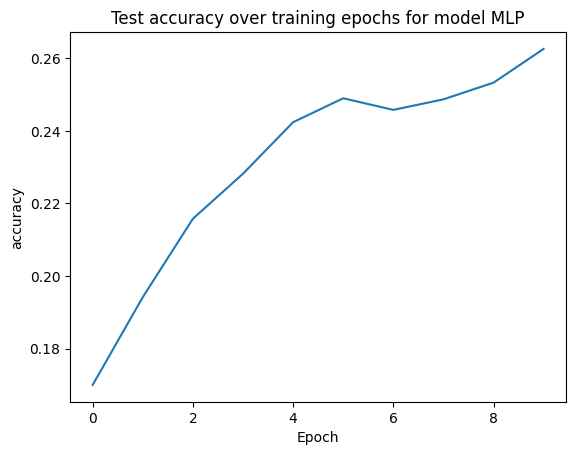

metric:  loss
epoch length:  10
hello world


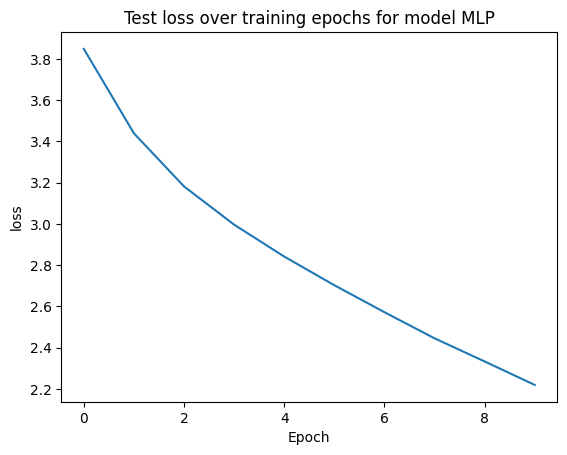

MLP test accuracy:  {'accuracy': 0.2626, 'precision': 0.26396313814221867, 'recall': 0.2626, 'f1': 0.251356648579199}


100%|██████████| 157/157 [00:00<00:00, 192.19it/s]

Test Accuracy MLP per class:  {'apple': 60.0, 'aquarium_fish': 48.0, 'baby': 23.0, 'bear': 14.0, 'beaver': 11.0, 'bed': 33.0, 'bee': 29.0, 'beetle': 31.0, 'bicycle': 20.0, 'bottle': 29.0, 'bowl': 4.0, 'boy': 9.0, 'bridge': 12.0, 'bus': 17.0, 'butterfly': 20.0, 'camel': 19.0, 'can': 21.0, 'castle': 58.0, 'caterpillar': 22.0, 'cattle': 11.0, 'chair': 56.0, 'chimpanzee': 26.0, 'clock': 17.0, 'cloud': 34.0, 'cockroach': 48.0, 'couch': 18.0, 'crab': 16.0, 'crocodile': 21.0, 'cup': 38.0, 'dinosaur': 16.0, 'dolphin': 45.0, 'elephant': 34.0, 'flatfish': 21.0, 'forest': 24.0, 'fox': 27.0, 'girl': 24.0, 'hamster': 23.0, 'house': 5.0, 'kangaroo': 15.0, 'keyboard': 21.0, 'lamp': 24.0, 'lawn_mower': 42.0, 'leopard': 18.0, 'lion': 14.0, 'lizard': 12.0, 'lobster': 9.0, 'man': 17.0, 'maple_tree': 39.0, 'motorcycle': 34.0, 'mountain': 38.0, 'mouse': 5.0, 'mushroom': 19.0, 'oak_tree': 47.0, 'orange': 63.0, 'orchid': 40.0, 'otter': 1.0, 'palm_tree': 40.0, 'pear': 20.0, 'pickup_truck': 23.0, 'pine_tree': 

In [47]:
mlp = TwoLayerNet(32 * 32 * 3, 1024, 100, extra_layers=extra_layers)
criterion = nn.CrossEntropyLoss()
optimizer_mlp = create_optimizer(mlp, learning_rate, weight_decay)

mlp_epoch_performances, mlp_epoch_losses = train(mlp, train_data_loader_mlp, test_data_loader_mlp, criterion, optimizer_mlp, epochs)
plot_epoch_performances(mlp_epoch_performances, model_name="MLP")
plot_epoch_performances(mlp_epoch_losses, model_name="MLP", metric="loss")

test_mlp = validate(mlp, test_data_loader_mlp)
print("MLP test accuracy: ", test_mlp)

test_mlp_per_class = validate_per_class(mlp, test_data_loader_mlp, classes)
print("Test Accuracy MLP per class: ", test_mlp_per_class)

In [34]:
# Tuned model CNN performance
epochs = 100
learning_rate = 1e-3
batch_size = 512
extra_layers = True
transformations = True
weight_decay = 0.8
nonlinear_fn = "relu"

train_data_loader_cnn, test_data_loader_cnn = create_dataloaders(additional_transform=transformations, batch_size=batch_size, use_cache=True)


Files already downloaded and verified
Files already downloaded and verified
warming up train loader


100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


warming up test loader


100%|██████████| 20/20 [00:05<00:00,  3.69it/s]


100%|██████████| 100/100 [01:52<00:00,  1.13s/it]

metric:  accuracy
epoch length:  100


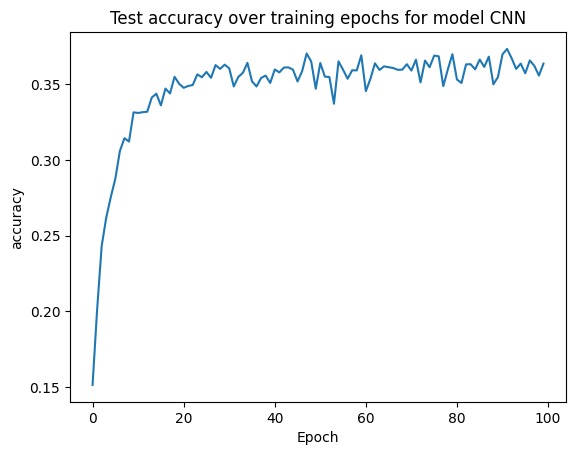

metric:  loss
epoch length:  100
hello world


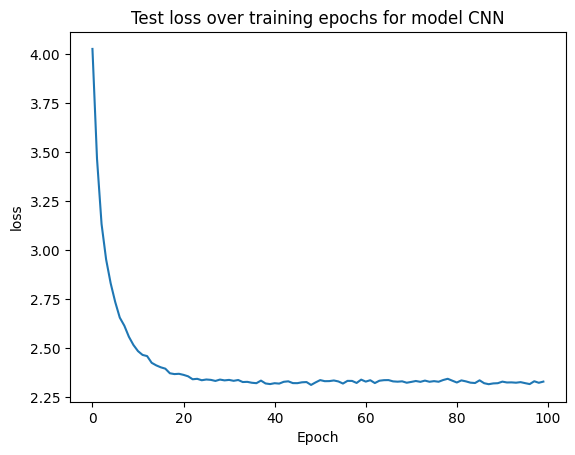

CNN test accuracy:  {'accuracy': 0.3636, 'precision': 0.38165001809579285, 'recall': 0.3636, 'f1': 0.3493110910589}


100%|██████████| 20/20 [00:00<00:00, 27.35it/s]

Test Accuracy CNN per class:  {'apple': 57.0, 'aquarium_fish': 66.0, 'baby': 17.0, 'bear': 20.0, 'beaver': 18.0, 'bed': 34.0, 'bee': 29.0, 'beetle': 39.0, 'bicycle': 39.0, 'bottle': 47.0, 'bowl': 9.0, 'boy': 13.0, 'bridge': 39.0, 'bus': 25.0, 'butterfly': 35.0, 'camel': 47.0, 'can': 13.0, 'castle': 73.0, 'caterpillar': 37.0, 'cattle': 23.0, 'chair': 67.0, 'chimpanzee': 32.0, 'clock': 21.0, 'cloud': 41.0, 'cockroach': 66.0, 'couch': 20.0, 'crab': 15.0, 'crocodile': 36.0, 'cup': 45.0, 'dinosaur': 29.0, 'dolphin': 22.0, 'elephant': 26.0, 'flatfish': 20.0, 'forest': 20.0, 'fox': 56.0, 'girl': 11.0, 'hamster': 37.0, 'house': 22.0, 'kangaroo': 24.0, 'keyboard': 39.0, 'lamp': 23.0, 'lawn_mower': 55.0, 'leopard': 20.0, 'lion': 47.0, 'lizard': 20.0, 'lobster': 15.0, 'man': 14.0, 'maple_tree': 35.0, 'motorcycle': 68.0, 'mountain': 51.0, 'mouse': 4.0, 'mushroom': 29.0, 'oak_tree': 72.0, 'orange': 81.0, 'orchid': 68.0, 'otter': 0.0, 'palm_tree': 51.0, 'pear': 40.0, 'pickup_truck': 46.0, 'pine_tree

In [42]:
conv_net = ConvNet(extra_layers=extra_layers)
criterion = nn.CrossEntropyLoss()
optimizer_cnn = create_optimizer(conv_net, learning_rate, weight_decay)

cnn_epoch_performances, cnn_epoch_losses = train(conv_net, train_data_loader_cnn, test_data_loader_cnn, criterion, optimizer_cnn, epochs)
plot_epoch_performances(cnn_epoch_performances, model_name="CNN")
plot_epoch_performances(cnn_epoch_losses, model_name="CNN", metric="loss")

test_accuracy_cnn = validate(conv_net, test_data_loader_cnn)
print("CNN test accuracy: ", test_accuracy_cnn)

test_accuracy_cnn_per_class = validate_per_class(conv_net, test_data_loader_cnn, classes)
print("Test Accuracy CNN per class: ", test_accuracy_cnn_per_class)


In [44]:
def plot_accuracy_per_class(model_name, accuracy_per_class):
  """
    Plot the top 5 and bottom 5 accuracies

    Args:
        model_name (str): Name of the model.
        accuracy_per_class (dict): Dictionary containing class names and accuracies.

    Returns:
        None
  """
  # Extract class names and accuracies
  sorted_accuracy = sorted(accuracy_per_class.items(), key=lambda x: x[1], reverse=True)

  # Get the bottom 5 and top 5 accuracies
  bottom_5 = sorted_accuracy[-5:]
  top_5 = sorted_accuracy[:5]

  # Combine them for plotting
  combined = top_5 + bottom_5
  classes, accuracies = zip(*combined)  # Unzip into two lists

  # Plotting
  plt.figure(figsize=(10, 5))
  plt.bar(classes, accuracies, color=['red' if acc < 30 else 'green' for acc in accuracies])

  for i in range(len(combined)):
        plt.text(i, accuracies[i], accuracies[i], ha = 'center')

  plt.title(f'Top 5 and Bottom 5 Class Accuracies for {model_name}')
  plt.xlabel('Class')
  plt.ylabel('Accuracy (%)')
  plt.xticks(rotation=45)
  plt.ylim(0, 100)
  plt.grid(axis='y')

  # Show the plot
  plt.show()

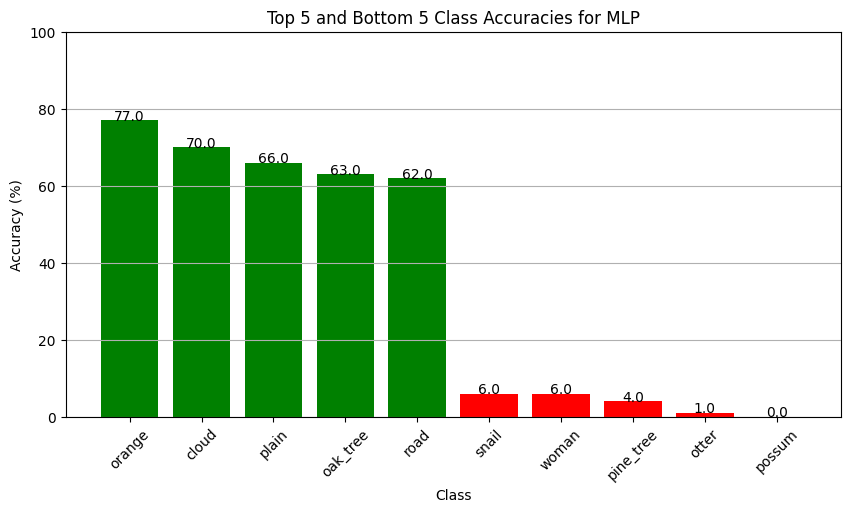

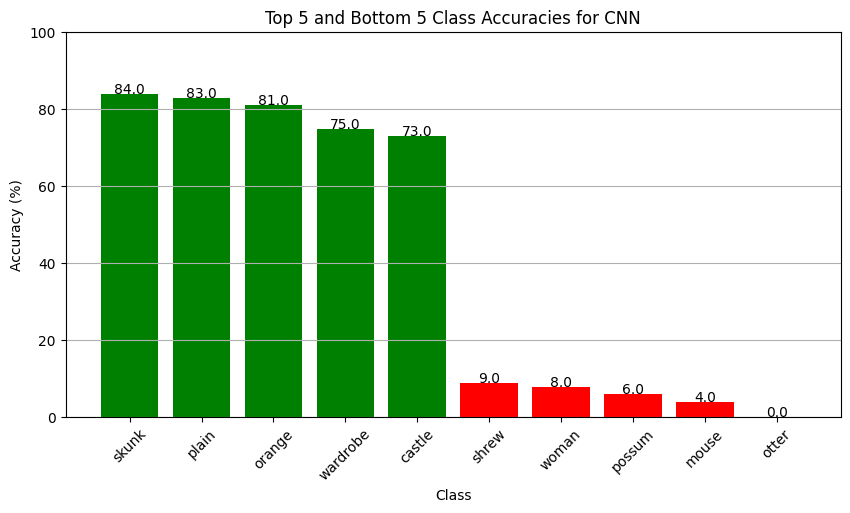

In [45]:
plot_accuracy_per_class("MLP", test_mlp_per_class)
plot_accuracy_per_class("CNN", test_accuracy_cnn_per_class)

<a id="section-8"></a>
### **Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)**

In this section, you will work with a subset of the [STL-10](https://cs.stanford.edu/~acoates/stl10/) dataset, containing higher resolution images and different object classes than CIFAR-100. Before fine-tuning your ConvNet on this dataset, first complete the `visualise_stl10` function to display sample images from the following 5 classes:

1. **Bird**
2. **Deer**
3. **Dog**
4. **Horse**
5. **Monkey**

In [ ]:
def visualise_stl10(class_mapping):
    '''
    Visualizes 5 images from each specified class in the STL-10 dataset.

    Args:
        class_mapping (dict): A dictionary mapping class indices to class names.
    '''

    # YOUR CODE HERE

In [ ]:
# Define the class mapping for bird, deer, dog, horse, and monkey
class_mapping = {1: 'bird', 4: 'deer', 5: 'dog', 6: 'horse', 7: 'monkey'}

# Visualize STL-10 classes
visualise_stl10(class_mapping)

After visualizing the data, implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, you will move on to fine-tuning the ConvNet on this dataset in the next section.

In [ ]:
class STL10_loader(Dataset):
    def __init__(self, root, train=True, transform=None):
        '''
        Initializes the STL10 dataset.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
        '''

        # YOUR CODE HERE

    def __len__(self):
        '''
        Returns the number of samples in the dataset.
        '''

        # YOUR CODE HERE

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''

        # YOUR CODE HERE

<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, you will load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. You can either first load the pre-trained parameters and then modify the output layer, or change the output layer before loading the matched pre-trained parameters. Once modified, you will train the model and document the settings of hyperparameters, accuracy, and learning curve. Additionally, visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, consider using techniques like [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

In [ ]:
# YOUR CODE HERE

<a id="section-10"></a>
### **Section 10: Bonus Challenge (optional)**

Try to achieve the highest possible accuracy on the test dataset (5 classes from STL-10) by adjusting hyperparameters, modifying architectures, or applying techniques like data augmentation. The top-performing teams will earn bonus points that can significantly boost their final lab grade, even allowing it to exceed 10 (up to 11):

- **1st place:** +1.0 to the final grade of the final lab
- **2nd place:** +0.8 to the final grade of the final lab
- **3rd place:** +0.6 to the final grade of the final lab
- **4th place:** +0.4 to the final grade of the final lab
- **5th place:** +0.2 to the final grade of the final lab

**Hint:** You may use techniques like data augmentation, freezing early layers, modifying architecture, or optimizing hyperparameters. Only data from CIFAR-100 and STL-10 can be used, and you cannot add more than 3 additional convolutional layers.

In [ ]:
# YOUR CODE HERE

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name                   | Contribution on Research | Contribution on Programming | Contribution on Writing |
|------------------------|--------------------------|-----------------------------|-------------------------|
| Pradyut Nair           | 25 %                     | 25 %                        | 25 %                    |
| Benjamin Shaffrey      | 25 %                     | 25 %                        | 25 %                    |
| Akshay Sardjoe Missier | 25 %                     | 25 %                        | 25 %                    |
| Christina Isaicu       | 25 %                      | 25 %                         | 25 %                     |

### - End of Notebook -